In [122]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


In [426]:
import pickle
from pandas import read_csv
#paras = pickle.load(open('/data/db/import/save/mouse-export-para-class.pkl', 'rb'))
paras = read_csv('/home/gencpg/gen_cpg/mouse-paralogs-exocon.csv')
paras.loc[paras["Branch point"] == "Mus musculus strain reference (CL57BL6)", "Branch point"] = "Mus musculus"


In [350]:
paras.groupby(['Branch point']).count()[['CpG-ness']]
#paras.groupby(['dSbin']).count()[['CpG-ness']]


CpG-ness
Branch point              
Amniota              12489
Bilateria            64685
Boreoeutheria          634
Chordata             11592
Euarchontoglires       461
Euteleostomi         64909
Eutheria             13350
Glires                 431
Gnathostomata        16348
Mammalia              2262
Muridae                250
Murinae               9066
Muroidea             16971
Mus                  16263
Mus musculus         10146
Myomorpha              306
Opisthokonta         32620
Rodentia               962
Sarcopterygii          211
Tetrapoda            23263
Theria                3264
Vertebrata           56085

In [427]:
fmembers = {}
for p in paras.iloc:
    if p['g1'] not in fmembers:
        fmembers[p['g1']] = set()
    if p['g2'] not in fmembers:
        fmembers[p['g2']] = set()
    fmembers[p['g1']].add(p['g2'])
    fmembers[p['g2']].add(p['g1'])
paras = paras.assign(family_size=[len(fmembers[p['g1']])+1 for p in paras.iloc])

In [428]:
rparas = set()
for l in open('mus-paras.csv', 'r'):
    x,y = l.strip().split(',')
    rparas.add((x,y))
    rparas.add((y,x))
paras = paras.assign(fam_restricted_set=[((s[0], s[1]) in rparas) for s in paras[['g1', 'g2']].iloc])

In [429]:
from scipy.cluster.vq import kmeans
centroids = {}
for b in set(paras['Branch point']):
    centroids[b] = sorted(kmeans(paras[(paras["Branch point"]==b)]["PromPresScore300"], 2)[0])
paras = paras.assign(prom_clust = paras.apply(lambda r: 0 if abs(centroids[r["Branch point"]][0]-r["PromPresScore300"])<abs(centroids[r["Branch point"]][1]-r["PromPresScore300"]) else 1, axis=1))

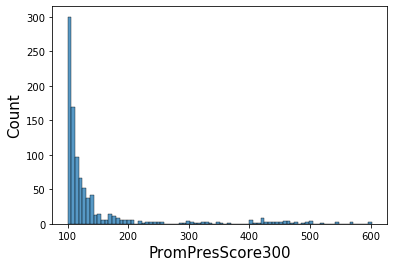

In [220]:
from seaborn import histplot
histplot(x="PromPresScore300", data=paras[(paras["Branch point"].isin(["Opisthokonta", "Bilateria", "Chordata", "Vertebrata", "Gnathostomata", "Euteleostomi", "Sarcopterygii", "Tetrapoda", "Amniota",
                                    "Mammalia"]))&(paras["PromPresScore300"] > 100)])

In [222]:
paras[(paras["Branch point"].isin(["Opisthokonta", "Bilateria", "Chordata", "Vertebrata", "Gnathostomata", "Euteleostomi", "Sarcopterygii", "Tetrapoda", "Amniota",
                                    "Mammalia"]))&(paras["PromPresScore300"] > 200)].to_csv('mouse-prom-ancient-outliers.csv')

In [125]:
from seaborn import histplot
from matplotlib.pyplot import title
import matplotlib.pyplot as plt
diffcols = [c for c in paras.columns if c.endswith('-mean-log-diff')]
mm_neo_para_recent = paras[(paras['retro'] < 0)&(paras['Branch point'].isin(["Glires", "Rodentia", "Myomorpha", "Muroidea", "Muridae", "Murinae", "Mus", "Mus musculus"]))]
mm_neo_para_recent = mm_neo_para_recent.set_index(['g1','g2'])
mm_neo_para_recent = mm_neo_para_recent.assign(mx=mm_neo_para_recent[diffcols].max(axis=1), mn=-mm_neo_para_recent[diffcols].min(axis=1))
mm_neo_para_recent.to_csv('mouse-recent-neo-retros.csv')
mm_neo_para_recent


Unnamed: 0  Branch point  CpG-ness  \
g1                 g2                                                       
ENSMUSG00000063881 ENSMUSG00000095312      605378      Rodentia         0   
                   ENSMUSG00000108605      605382      Rodentia         0   
ENSMUSG00000059729 ENSMUSG00000060170      605548      Rodentia         0   
ENSMUSG00000059864 ENSMUSG00000060170      605550      Rodentia         0   
ENSMUSG00000045421 ENSMUSG00000060170      605556      Rodentia         0   
...                                           ...           ...       ...   
ENSMUSG00000075078 ENSMUSG00000111239      712853  Mus musculus         0   
ENSMUSG00000053205 ENSMUSG00000071748      712895  Mus musculus         0   
ENSMUSG00000027236 ENSMUSG00000043424      712959  Mus musculus         1   
ENSMUSG00000008450 ENSMUSG00000071497      712993  Mus musculus         1   
ENSMUSG00000025508 ENSMUSG00000118552      713018  Mus musculus         0   

                                           dN      dS  Similarity   Length  \
g1                 g2                                                        
ENSMUSG00000063881 ENSMUSG00000095312  0.1445  0.4586     75.0000   3764.0   
                   ENSMUSG00000108605  0.0966  0.4154     54.3750   3611.0   
ENSMUSG00000059729 ENSMUSG00000060170  0.1436  0.5159     76.6990   4671.5   
ENSMUSG00000059864 ENSMUSG00000060170  0.1759  0.5532     72.6688   2700.0   
ENSMUSG00000045421 ENSMUSG00000060170  0.1888  0.6938     70.7395   3997.0   
...                                       ...     ...         ...      ...   
ENSMUSG00000075078 ENSMUSG00000111239  0.0237  0.0581     92.9936   4260.0   
ENSMUSG00000053205 ENSMUSG00000071748  0.0000  0.0000    100.0000  19319.5   
ENSMUSG00000027236 ENSMUSG00000043424  0.0042  0.0000     99.6169  15215.0   
ENSMUSG00000008450 ENSMUSG00000071497  0.0000  0.0000    100.0000   9825.0   
ENSMUSG00000025508 ENSMUSG00000118552  0.0046  0.0083     99.1304   2281.0   

                                        Distance  dSbin  \
g1                 g2                                     
ENSMUSG00000063881 ENSMUSG00000095312  300000000     14   
                   ENSMUSG00000108605     556980     14   
ENSMUSG00000059729 ENSMUSG00000060170  300000000     13   
ENSMUSG00000059864 ENSMUSG00000060170  300000000     12   
ENSMUSG00000045421 ENSMUSG00000060170  300000000     11   
...                                          ...    ...   
ENSMUSG00000075078 ENSMUSG00000111239      42971     20   
ENSMUSG00000053205 ENSMUSG00000071748  300000000     23   
ENSMUSG00000027236 ENSMUSG00000043424  300000000     23   
ENSMUSG00000008450 ENSMUSG00000071497  300000000     23   
ENSMUSG00000025508 ENSMUSG00000118552  300000000     22   

                                                                      pearson_corr  \
g1                 g2                                                                
ENSMUSG00000063881 ENSMUSG00000095312                                          NaN   
                   ENSMUSG00000108605                                          NaN   
ENSMUSG00000059729 ENSMUSG00000060170                                          NaN   
ENSMUSG00000059864 ENSMUSG00000060170                                          NaN   
ENSMUSG00000045421 ENSMUSG00000060170                                          NaN   
...                                                                            ...   
ENSMUSG00000075078 ENSMUSG00000111239                                          NaN   
ENSMUSG00000053205 ENSMUSG00000071748   (0.89134157722686, 3.5341613406728204e-12)   
ENSMUSG00000027236 ENSMUSG00000043424  (0.6929291351804608, 7.850145955822958e-06)   
ENSMUSG00000008450 ENSMUSG00000071497   (0.503234862983329, 0.0028341000372165094)   
ENSMUSG00000025508 ENSMUSG00000118552                                          NaN   

                                       ...  PolyA11000 PolyA21000  \
g1                 g2                  ...                        

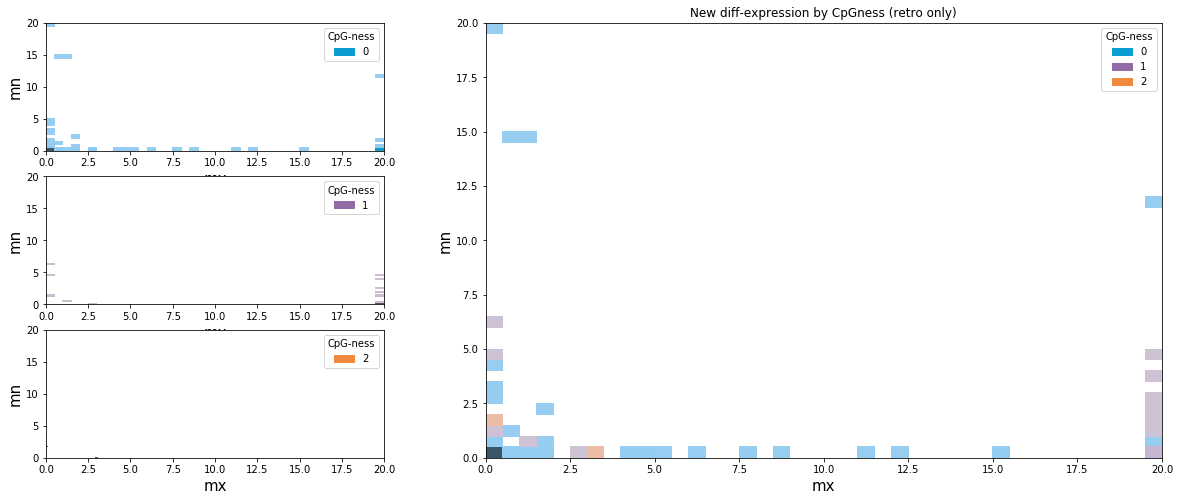

In [126]:
fig, ax = pyplot.subplots(figsize=(20,8), nrows=3, ncols=2, gridspec_kw={'width_ratios':[1,2]})
histplot(ax=ax[0,0], data=mm_neo_para_recent[(mm_neo_para_recent['mx']>=0) & (mm_neo_para_recent['mn']>=0) & (mm_neo_para_recent['CpG-ness']==0)], x='mx', y='mn',hue='CpG-ness', bins=(40,40), palette=['#0B9DCF'])
ax[0,0].set_xlim([0,20])
ax[0,0].set_ylim([0,20])
#ax[0,0].text(12.5, 15, '%d (%0.3f%%)'%(((neo_para_recent['mx']>=10) & (neo_para_recent['mn']>=10) & (neo_para_recent['CpG-ness']==0)).sum(),100*((neo_para_recent['mx']>=10) & (neo_para_recent['mn']>=10) & (neo_para_recent['CpG-ness']==0)).sum()/((neo_para_recent['mx']>=0) & (neo_para_recent['mn']>=0) & (neo_para_recent['CpG-ness']==0)).sum()))
#ax[0,0].text(0.5, 0.5, '%d (%0.3f%%)'%(((neo_para_recent['mx']<=5) & (neo_para_recent['mn']<=5) & (neo_para_recent['CpG-ness']==0)).sum(),100*((neo_para_recent['mx']<=5) & (neo_para_recent['mn']<=5) & (neo_para_recent['CpG-ness']==0)).sum()/((neo_para_recent['mx']>=0) & (neo_para_recent['mn']>=0) & (neo_para_recent['CpG-ness']==0)).sum()))
histplot(ax=ax[1,0], data=mm_neo_para_recent[(mm_neo_para_recent['mx']>=0) & (mm_neo_para_recent['mn']>=0) & (mm_neo_para_recent['CpG-ness']==1)], x='mx', y='mn',hue='CpG-ness', bins=(40,40), palette=['#926AA5'])
ax[1,0].set_xlim([0,20])
ax[1,0].set_ylim([0,20])
#ax[1,0].text(12.5, 15, '%d (%0.3f%%)'%(((neo_para_recent['mx']>=10) & (neo_para_recent['mn']>=10) & (neo_para_recent['CpG-ness']==1)).sum(),100*((neo_para_recent['mx']>=10) & (neo_para_recent['mn']>=10) & (neo_para_recent['CpG-ness']==1)).sum()/((neo_para_recent['mx']>=0) & (neo_para_recent['mn']>=0) & (neo_para_recent['CpG-ness']==1)).sum()))
#ax[1,0].text(0.5, 0.5, '%d (%0.3f%%)'%(((neo_para_recent['mx']<=5) & (neo_para_recent['mn']<=5) & (neo_para_recent['CpG-ness']==1)).sum(),100*((neo_para_recent['mx']<=5) & (neo_para_recent['mn']<=5) & (neo_para_recent['CpG-ness']==1)).sum()/((neo_para_recent['mx']>=0) & (neo_para_recent['mn']>=0) & (neo_para_recent['CpG-ness']==1)).sum()))
histplot(ax=ax[2,0], data=mm_neo_para_recent[(mm_neo_para_recent['mx']>=0) & (mm_neo_para_recent['mn']>=0) & (mm_neo_para_recent['CpG-ness']==2)], x='mx', y='mn',hue='CpG-ness', bins=(40,40), palette=['#EF893D'])
ax[2,0].set_xlim([0,20])
ax[2,0].set_ylim([0,20])
#ax[2,0].text(12.5, 15, '%d (%0.3f%%)'%(((neo_para_recent['mx']>=10) & (neo_para_recent['mn']>=10) & (neo_para_recent['CpG-ness']==2)).sum(),100*((neo_para_recent['mx']>=10) & (neo_para_recent['mn']>=10) & (neo_para_recent['CpG-ness']==2)).sum()/((neo_para_recent['mx']>=0) & (neo_para_recent['mn']>=0) & (neo_para_recent['CpG-ness']==2)).sum()))
#ax[2,0].text(0.5, 0.5, '%d (%0.3f%%)'%(((neo_para_recent['mx']<=5) & (neo_para_recent['mn']<=5) & (neo_para_recent['CpG-ness']==2)).sum(),100*((neo_para_recent['mx']<=5) & (neo_para_recent['mn']<=5) & (neo_para_recent['CpG-ness']==2)).sum()/((neo_para_recent['mx']>=0) & (neo_para_recent['mn']>=0) & (neo_para_recent['CpG-ness']==2)).sum()))
gs = ax[0, 1].get_gridspec()
for a in ax[:, -1]:
  a.remove()
axbig = fig.add_subplot(gs[:, -1])

histplot(ax=axbig, data=mm_neo_para_recent[(mm_neo_para_recent['mx']>=0) & (mm_neo_para_recent['mn']>=0)], x='mx', y='mn',hue='CpG-ness', bins=(40,40), palette={ 0: '#0B9DCF', 1: '#926AA5',2: '#EF893D'})
title('New diff-expression by CpGness (retro only)')
plt.savefig('mouse-diff-expression-new-retro.pdf')

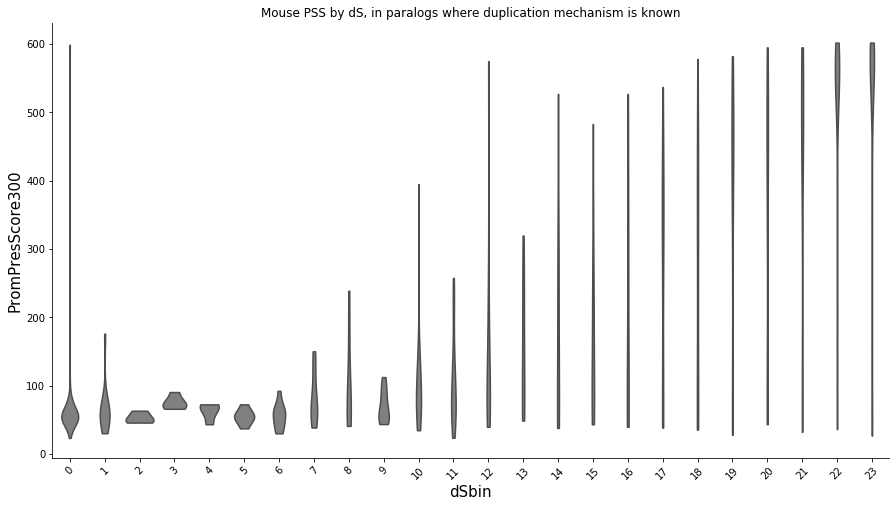

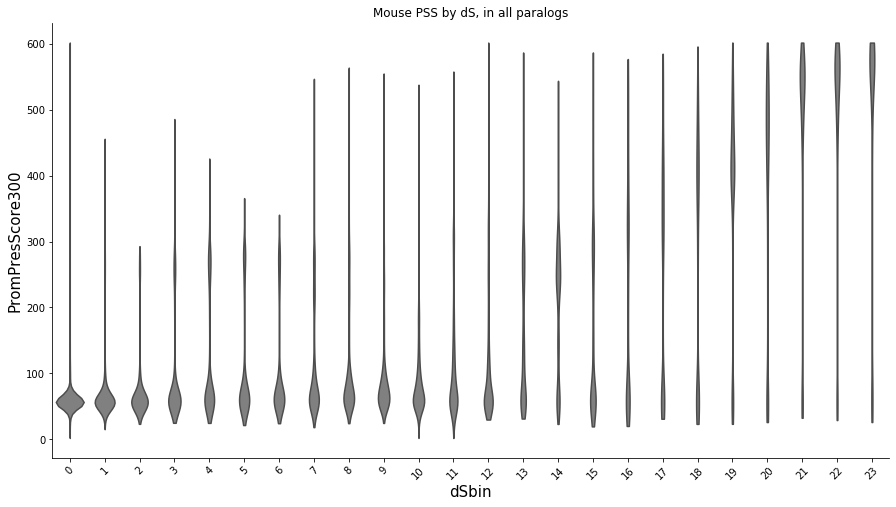

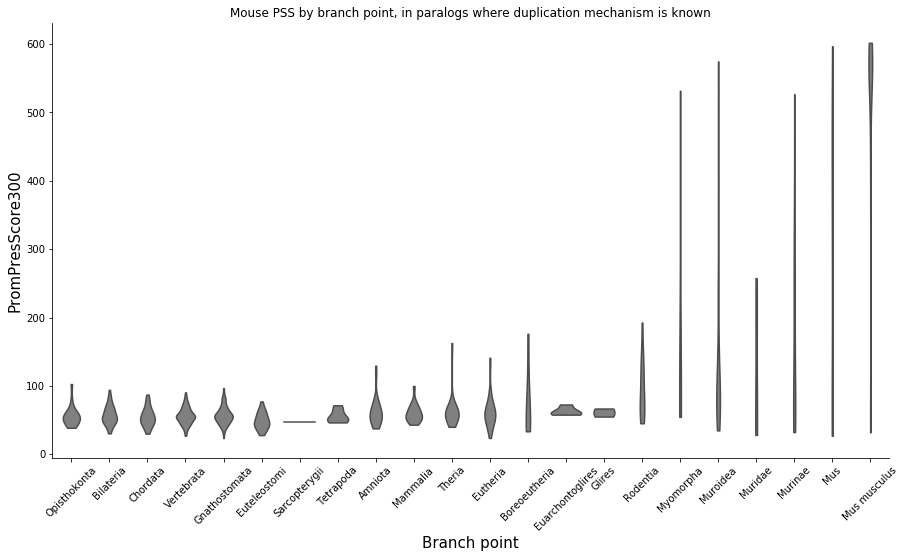

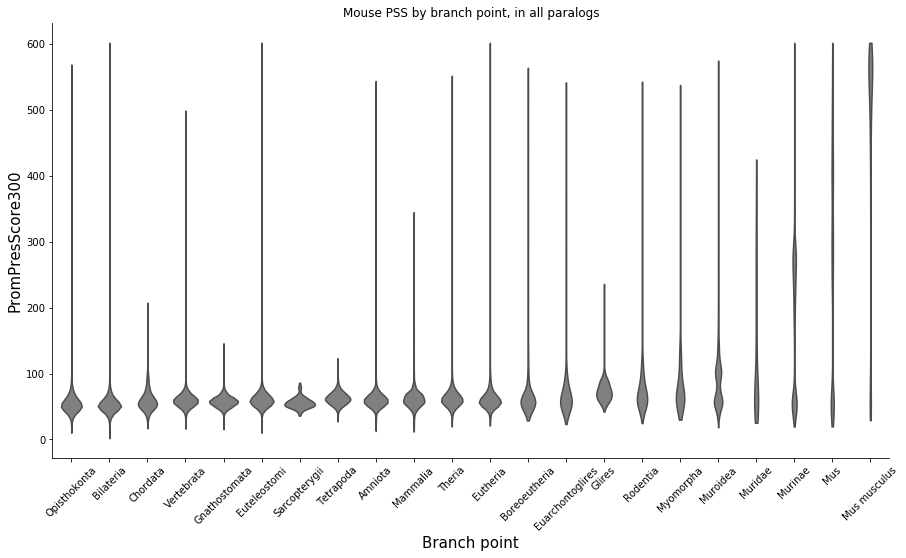

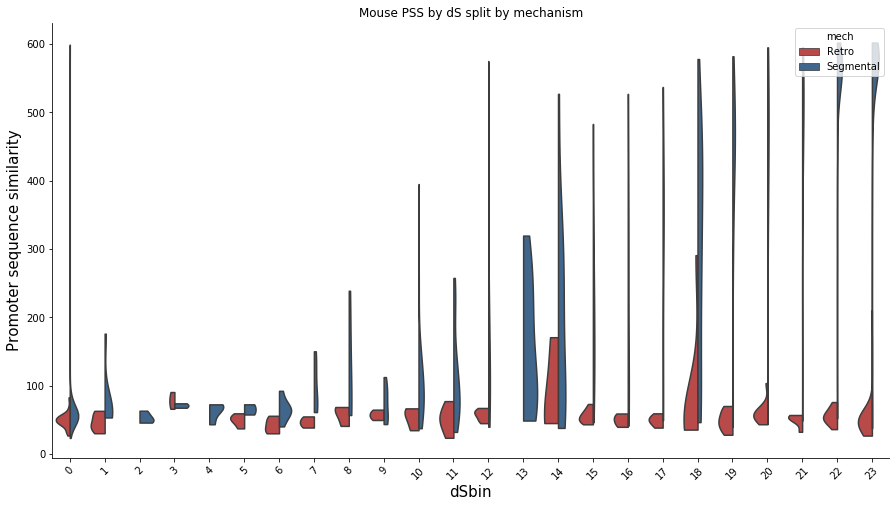

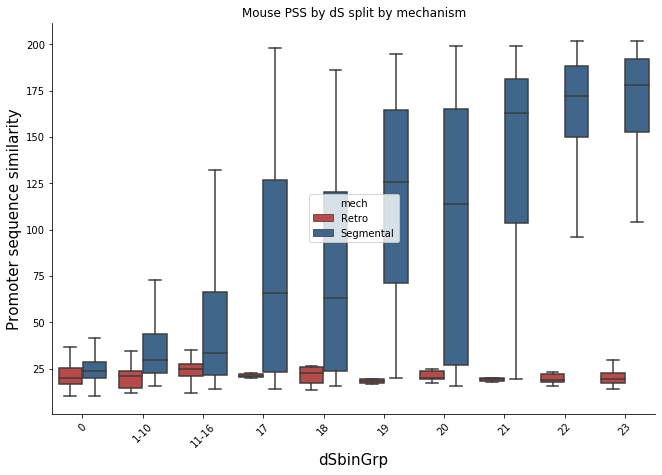

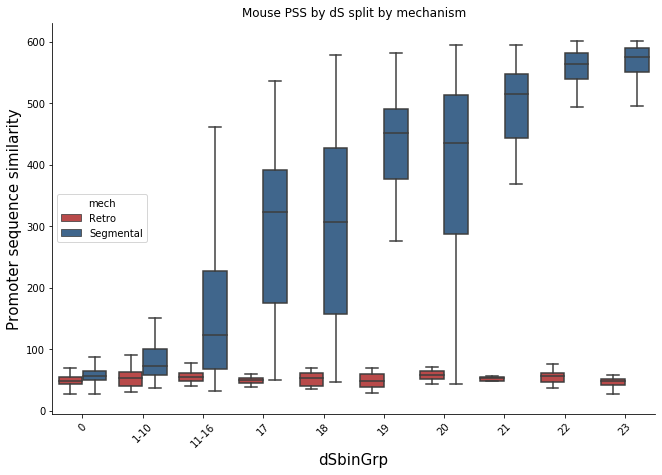

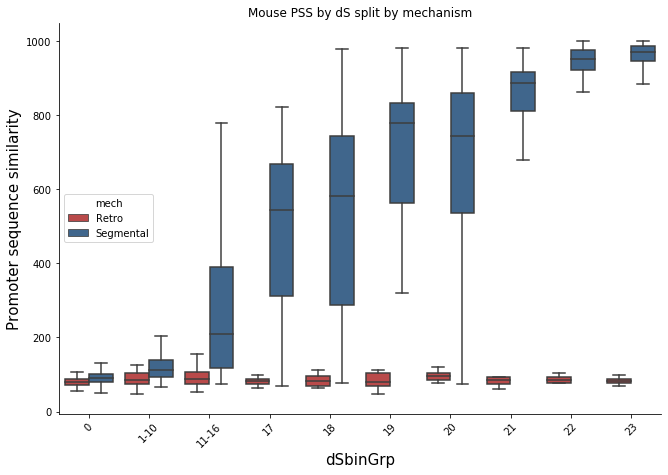

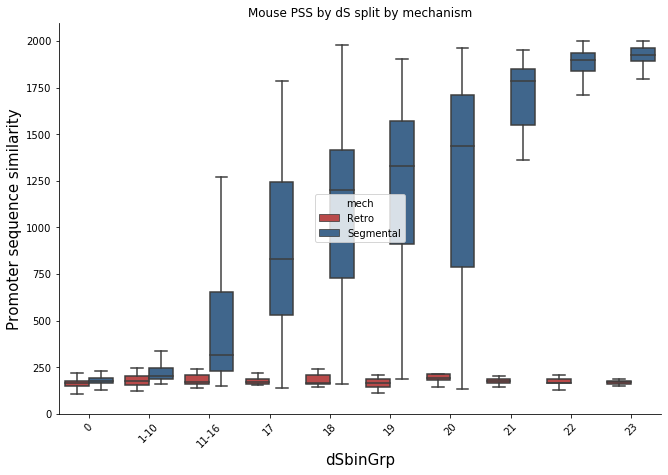

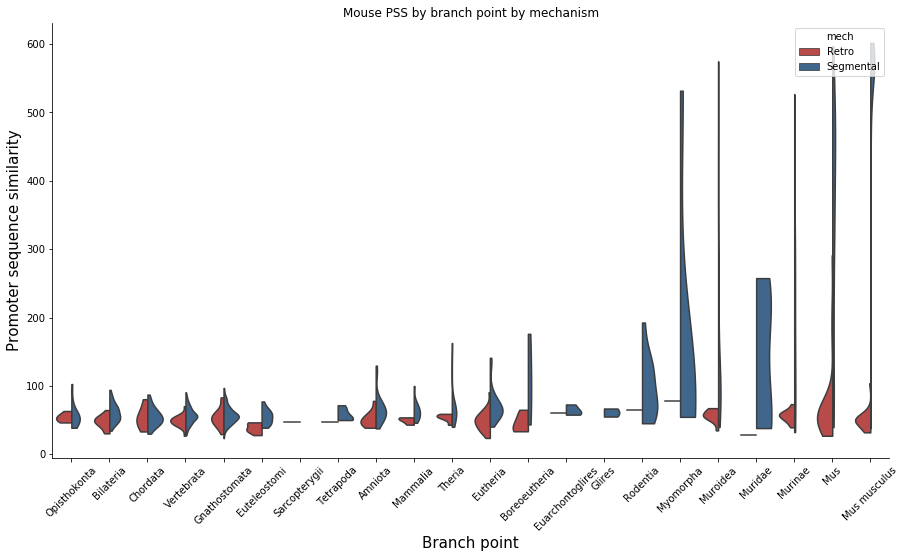

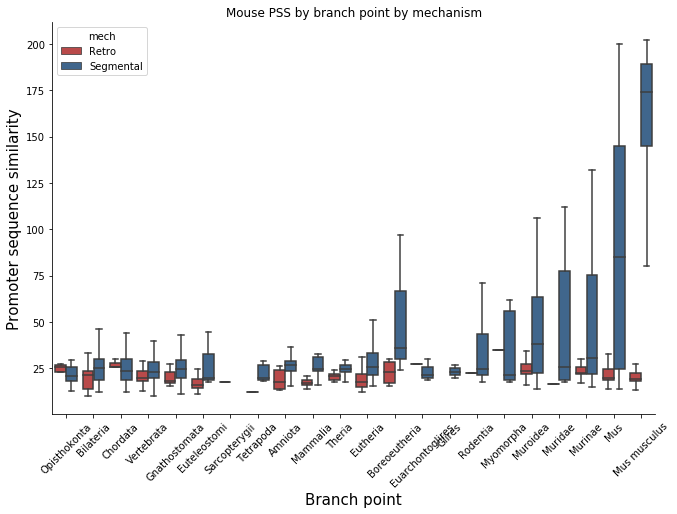

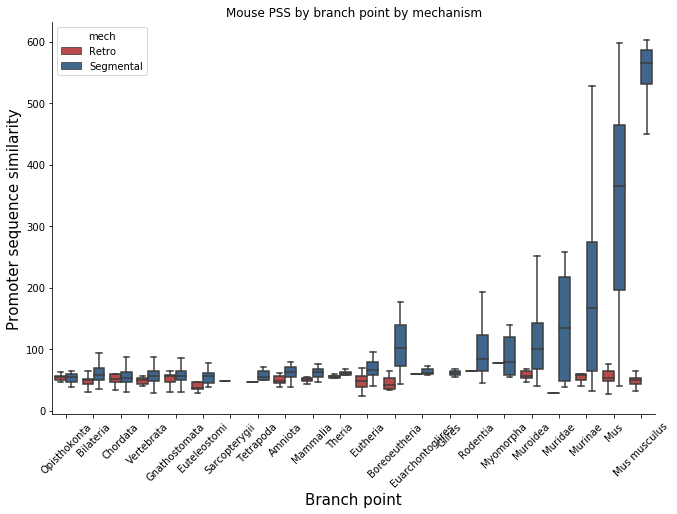

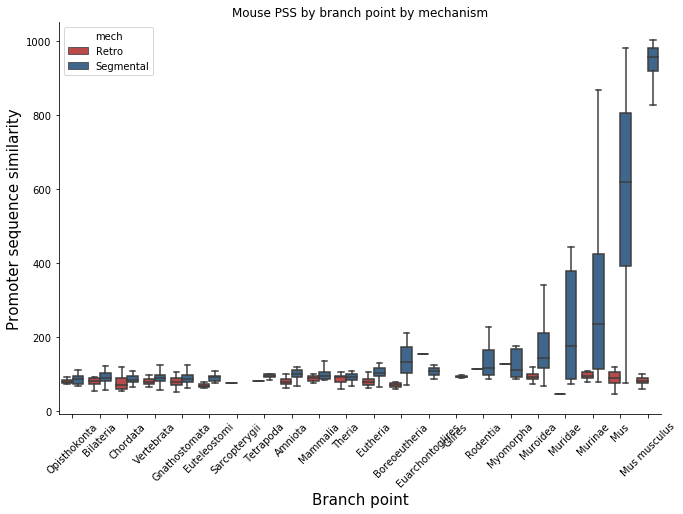

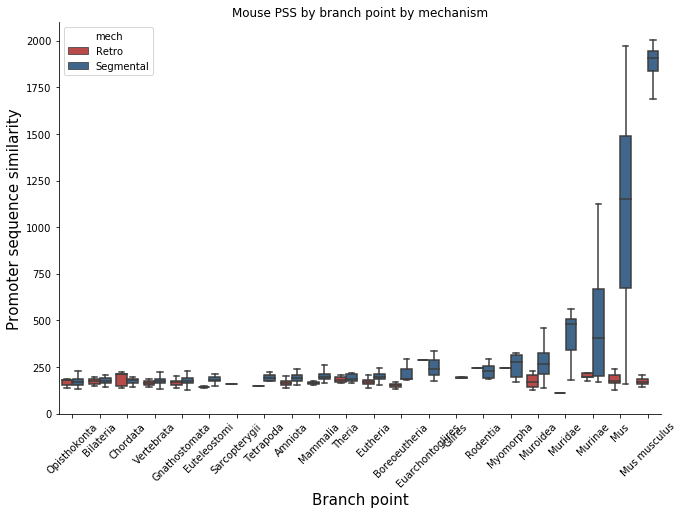

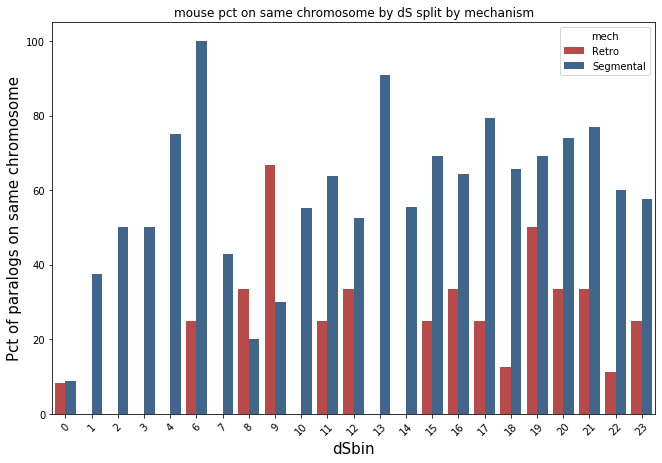

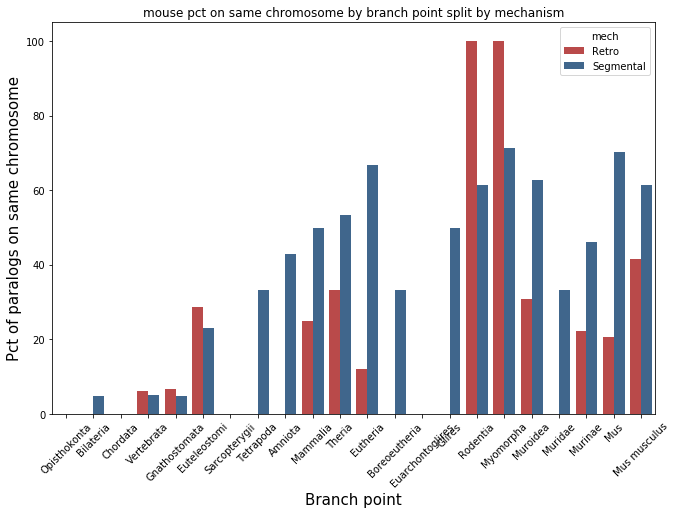

In [430]:
from matplotlib import pyplot
from plots import onesidedviolinplot
from seaborn import despine, violinplot, boxplot, barplot
import numpy as np

branch_order = ["Opisthokonta", "Bilateria", "Chordata", "Vertebrata", "Gnathostomata", "Euteleostomi", "Sarcopterygii", "Tetrapoda", "Amniota",
                                    "Mammalia", "Theria", "Eutheria", "Boreoeutheria", "Euarchontoglires", "Glires", "Rodentia", "Myomorpha", "Muroidea", "Muridae", "Murinae", "Mus", "Mus musculus"]

paramech = paras[((paras['retro'] != 0)|(paras['segmental'] == 1))&((paras['fam_restricted_set'])|(paras['family_size']<=2))] #&(paras['family_size']<=3)]
paramech = paramech.assign(mech = np.minimum(np.abs(paramech['retro'])*1 + paramech['segmental']*2, 2))
paramech = paramech.assign(dSbinGrp = paramech['dSbin'].transform(lambda x: {0: '0', 1: '1-10', 2: '1-10', 3: '1-10', 4: '1-10', 5: '1-10', 6: '1-10', 7: '1-10', 8: '1-10', 9: '1-10', 10: '1-10', 11: '11-16', 12: '11-16', 13: '11-16', 14: '11-16', 15: '11-16', 16: '11-16',
                                                                   17: '17', 18: '18', 19: '19', 20: '20', 21: '21', 22: '22', 23: '23'}[x]))

pyplot.rc('axes', labelsize=15)    # fontsize of the x and y labels


fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
violinplot(ax=ax, x="dSbin", y="PromPresScore300", cut=0, data=paramech, inner=None, palette=['grey'])
pyplot.title('Mouse PSS by dS, in paralogs where duplication mechanism is known')
despine()
pyplot.savefig('prom-seq-similarity-mouse-dup-known-ds.pdf', dpi=600)

fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
violinplot(ax=ax, x="dSbin", y="PromPresScore300", cut=0, data=paras, inner=None, palette=['grey'])
pyplot.title('Mouse PSS by dS, in all paralogs')
despine()
pyplot.savefig('prom-seq-similarity-mouse-all-paras-ds.pdf', dpi=600)

fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
violinplot(ax=ax, x="Branch point", y="PromPresScore300", cut=0, data=paramech, inner=None, order=branch_order, palette=['grey'])
pyplot.title('Mouse PSS by branch point, in paralogs where duplication mechanism is known')
despine()
pyplot.savefig('prom-seq-similarity-mouse-dup-known-bp.pdf', dpi=600)

fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
violinplot(ax=ax, x="Branch point", y="PromPresScore300", cut=0, data=paras, inner=None, order=branch_order, palette=['grey'])
pyplot.title('Mouse PSS by branch point, in all paralogs')
despine()
pyplot.savefig('prom-seq-similarity-mouse-all-paras-pb.pdf', dpi=600)

fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
g=violinplot(ax=ax, x="dSbin", y="PromPresScore300", hue='mech', cut=0, split=True, data=paramech, inner=None, palette={1: '#CB3838', 2: '#336699'})
g.legend_.texts[0].set_text('Retro')
g.legend_.texts[1].set_text('Segmental')
pyplot.ylabel('Promoter sequence similarity')
pyplot.title('Mouse PSS by dS split by mechanism')
#pyplot.legend(['Retro', 'Segmental'], loc='upper left')
despine()
pyplot.savefig('prom-seq-similarity-mouse-dup-known-ds-mech.pdf', dpi=600)

for pre in [100, 300, 500, 1000]:
    fig, ax = pyplot.subplots(figsize=(10.8,7.2))
    pyplot.xticks(rotation=45)
    g=boxplot(ax=ax, x="dSbinGrp", y="PromPresScore%d"%pre, hue='mech', data=paramech, order=['0', '1-10', '11-16', '17', '18', '19', '20', '21', '22', '23'], palette={1: '#CB3838', 2: '#336699'}, fliersize=0.0)
    g.legend_.texts[0].set_text('Retro')
    g.legend_.texts[1].set_text('Segmental')
    pyplot.ylabel('Promoter sequence similarity')
    pyplot.title('Mouse PSS by dS split by mechanism')
    #pyplot.legend(['Retro', 'Segmental'], loc='upper left')
    despine()
    pyplot.savefig('prom-seq-similarity-mouse-dup-known-ds-mech-box-pre%d.pdf'%pre, dpi=600)

fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
g=violinplot(ax=ax, x="Branch point", y="PromPresScore300", hue='mech', cut=0, split=True, data=paramech, inner=None, order=branch_order, palette={1: '#CB3838', 2: '#336699'})
g.legend_.texts[0].set_text('Retro')
g.legend_.texts[1].set_text('Segmental')
pyplot.ylabel('Promoter sequence similarity')
pyplot.title('Mouse PSS by branch point by mechanism')
#fig.get_axes()[0].legend(title= 'Mechanism',loc='upper left',labels=["Retro","Segmental"],edgecolor='red',facecolor='blue',ncol=2)
#pyplot.legend(['Retro', 'Segmental'], loc='upper left')
despine()
pyplot.savefig('prom-seq-similarity-mouse-dup-known-bp-mech.pdf', dpi=600)

for pre in [100, 300, 500, 1000]:
    fig, ax = pyplot.subplots(figsize=(10.8,7.2))
    pyplot.xticks(rotation=45)
    g=boxplot(ax=ax, x="Branch point", y="PromPresScore%d"%pre, hue='mech', data=paramech, order=branch_order, palette={1: '#CB3838', 2: '#336699'}, fliersize=0.0)
    g.legend_.texts[0].set_text('Retro')
    g.legend_.texts[1].set_text('Segmental')
    pyplot.ylabel('Promoter sequence similarity')
    pyplot.title('Mouse PSS by branch point by mechanism')
    #fig.get_axes()[0].legend(title= 'Mechanism',loc='upper left',labels=["Retro","Segmental"],edgecolor='red',facecolor='blue',ncol=2)
    #pyplot.legend(['Retro', 'Segmental'], loc='upper left')
    despine()
    pyplot.savefig('prom-seq-similarity-mouse-dup-known-bp-mech-box-pre%d.pdf'%pre, dpi=600)

fig, ax = pyplot.subplots(figsize=(10.8,7.2))
pyplot.xticks(rotation=45)
g=barplot(ax=ax, x="dSbin", y='pct', hue='mech', data=DataFrame((paramech[paramech['Distance']<300000000].groupby(['dSbin', 'mech']).size()/paramech.groupby(['dSbin', 'mech']).size()*100).dropna()).rename({0: 'pct'},axis=1).reset_index(), palette={1: '#CB3838', 2: '#336699'})
g.legend_.texts[0].set_text('Retro')
g.legend_.texts[1].set_text('Segmental')
pyplot.ylabel('Pct of paralogs on same chromosome')
pyplot.title('mouse pct on same chromosome by dS split by mechanism')
pyplot.savefig('same-chrom-mouse-dup-known-ds-mech-box.pdf', dpi=600)

fig, ax = pyplot.subplots(figsize=(10.8,7.2))
pyplot.xticks(rotation=45)
g=barplot(ax=ax, x="Branch point", y='pct', hue='mech', data=DataFrame((paramech[paramech['Distance']<300000000].groupby(['Branch point', 'mech']).size()/paramech.groupby(['Branch point', 'mech']).size()*100).dropna()).rename({0: 'pct'},axis=1).reset_index(), palette={1: '#CB3838', 2: '#336699'}, order=branch_order)
g.legend_.texts[0].set_text('Retro')
g.legend_.texts[1].set_text('Segmental')
pyplot.ylabel('Pct of paralogs on same chromosome')
pyplot.title('mouse pct on same chromosome by branch point split by mechanism')
pyplot.savefig('same-chrom-mouse-dup-known-bp-mech-box.pdf', dpi=600)



In [393]:
#paramech.groupby(['Branch point', 'CpG-ness']).count().unstack(level=-1)[[('Unnamed: 0', 0), ('Unnamed: 0', 1), ('Unnamed: 0', 2)]]
#paramech.groupby(['dSbin', 'CpG-ness']).count().unstack(level=-1)[[('Unnamed: 0', 0), ('Unnamed: 0', 1), ('Unnamed: 0', 2)]]
#paramech[paramech['retro'] != 0].groupby(['CpG-ness']).count().unstack(level=-1)[[('Unnamed: 0', 0), ('Unnamed: 0', 1), ('Unnamed: 0', 2)]].reset_index()
#paramech[paramech['retro'] != 0].groupby(['CpG-ness']).count().unstack(level=-1)[[('Unnamed: 0', 0), ('Unnamed: 0', 1), ('Unnamed: 0', 2)]].reset_index()
#paramech.groupby(['mech']).count()[['Unnamed: 0']].reset_index()
#paras.assign(mech = np.minimum(np.abs(paras['retro'])*1 + paras['segmental']*2, 2)).groupby(['Branch point','mech']).count().unstack(level=-1)[[('Unnamed: 0', 1), ('Unnamed: 0', 2)]]
paras.assign(mech = np.minimum(np.abs(paras['retro'])*1 + paras['segmental']*2, 2)).groupby(['dSbin','mech']).count().unstack(level=-1)[[('Unnamed: 0', 1), ('Unnamed: 0', 2)]]

Unnamed: 0       
mech           1      2
dSbin                  
0          19487  16790
1            332    278
2            306    353
3            180    452
4             93    569
5             84    650
6             53    880
7             45    816
8             32    859
9             43   1037
10            57    659
11           155    680
12           320    345
13           122    372
14            54    326
15            81    635
16            62    604
17            74    623
18            74    662
19            32    750
20            56    797
21            38   1527
22            18   1414
23            38   1582

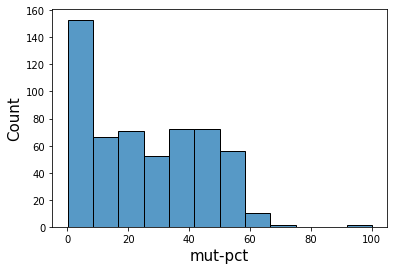

In [239]:
histplot(x="mut-pct", data=paras[(paras["Branch point"].isin(["Opisthokonta", "Bilateria", "Chordata", "Vertebrata", "Gnathostomata", "Euteleostomi", "Sarcopterygii", "Tetrapoda", "Amniota",
                                    "Mammalia"])&(paramech['mut-pct']>0))])

In [ ]:
(paramech[(paramech["Branch point"].isin(["Opisthokonta", "Bilateria", "Chordata", "Vertebrata", "Gnathostomata", "Euteleostomi", "Sarcopterygii", "Tetrapoda", "Amniota",
                                    "Mammalia"])&(paramech['mut-pct']>0))]).to_csv('mouse-outliers-tf-ancient.csv')

paramech[((paramech["mech"]==1)&(paramech['mut-pct']>0))].to_csv('mouse-outliers-tf-retro.csv')

paramech[(paramech["Branch point"].isin(["Glires", "Rodentia", "Myomorpha", "Muroidea", "Muridae", "Murinae", "Mus", "Mus musculus"])
         &(paramech["mech"]==2)&(paramech["mut-pct"]>95))].to_csv('mouse-outliers-tf-recent-segmental.csv')

In [270]:
from scipy.stats import mannwhitneyu
dsSkip = set()
branchSkip = set()
for pre in [100, 300, 500, 1000]:
    for x in sorted(paramech['dSbinGrp'].unique()):
        if sum((paramech['dSbinGrp'] == x)&(paramech['mech'] == 2))>0 and sum((paramech['dSbinGrp'] == x)&(paramech['mech'] == 1))>0:
            print('Group sizes: %d, %d'%(sum((paramech['dSbinGrp'] == x)&(paramech['mech'] == 2)), sum((paramech['dSbinGrp'] == x)&(paramech['mech'] == 1))))
            print("Mann-Whitney (%d-pre) test on dSbin %s segmental vs. retro (mouse), FDR controlled: %s"%(pre, x, mannwhitneyu(paramech[(paramech['dSbinGrp'] == x)&(paramech['mech'] == 2)]['PromPresScore%d'%pre], paramech[(paramech['dSbinGrp'] == x)&(paramech['mech'] == 1)]['PromPresScore%d'%pre], alternative='greater').pvalue*len(paramech['dSbinGrp'].unique())))
    for x in branch_order:
        if sum((paramech['Branch point'] == x)&(paramech['mech'] == 2))>0 and sum((paramech['Branch point'] == x)&(paramech['mech'] == 1))>0:
            print('Group sizes: %d, %d'%(sum((paramech['Branch point'] == x)&(paramech['mech'] == 2)), sum((paramech['Branch point'] == x)&(paramech['mech'] == 1))))
            print("Mann-Whitney (%d-pre) test on Branch point %s segmental vs. retro (mouse), FDR controlled: %s"%(pre, x, mannwhitneyu(paramech[(paramech['Branch point'] == x)&(paramech['mech'] == 2)]['PromPresScore%d'%pre], paramech[(paramech['Branch point'] == x)&(paramech['mech'] == 1)]['PromPresScore%d'%pre], alternative='greater').pvalue*len(branch_order)))

Group sizes: 510, 73
Mann-Whitney (100-pre) test on dSbin 0 segmental vs. retro (mouse), FDR controlled: 1.553232487876094e-05
Group sizes: 77, 28
Mann-Whitney (100-pre) test on dSbin 1-10 segmental vs. retro (mouse), FDR controlled: 9.390045310650416e-05
Group sizes: 140, 24
Mann-Whitney (100-pre) test on dSbin 11-16 segmental vs. retro (mouse), FDR controlled: 0.03363466279419766
Group sizes: 34, 4
Mann-Whitney (100-pre) test on dSbin 17 segmental vs. retro (mouse), FDR controlled: 0.17139900220579848
Group sizes: 35, 8
Mann-Whitney (100-pre) test on dSbin 18 segmental vs. retro (mouse), FDR controlled: 0.0417853121685955
Group sizes: 42, 8
Mann-Whitney (100-pre) test on dSbin 19 segmental vs. retro (mouse), FDR controlled: 8.524023212595419e-05
Group sizes: 65, 12
Mann-Whitney (100-pre) test on dSbin 20 segmental vs. retro (mouse), FDR controlled: 8.092892716764932e-05
Group sizes: 39, 6
Mann-Whitney (100-pre) test on dSbin 21 segmental vs. retro (mouse), FDR controlled: 0.000981006

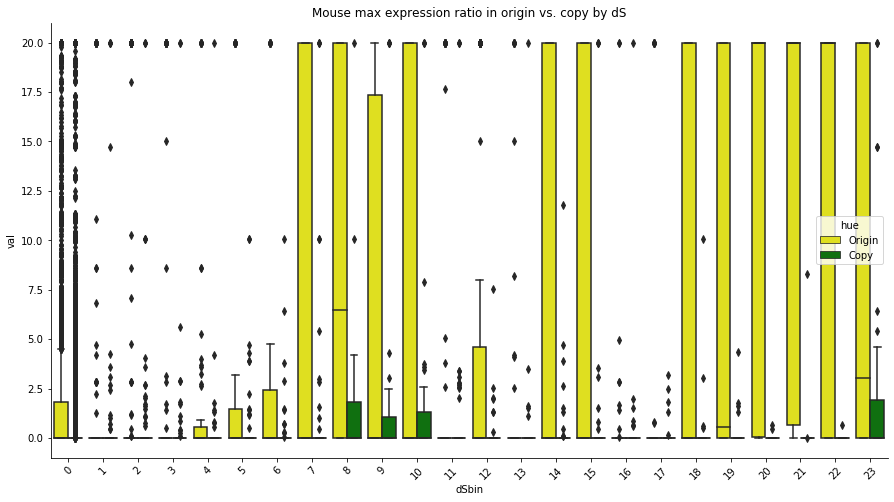

In [13]:
from pandas import concat
exprret=paramech[paramech['retro'] != 0].assign(origin=lambda x: x['mx']*(x['retro'] < 0 )+x['mn']*(x['retro'] > 0), 
copy=lambda x: x['mn']*(x['retro'] < 0 )+x['mx']*(x['retro'] > 0))
exprret=concat([exprret.assign(hue=0, val=exprret['origin']), exprret.assign(hue=1, val=exprret['copy'])])

fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
g=boxplot(ax=ax, x="dSbin", y="val", hue='hue', data=exprret, palette={0: 'yellow', 1: 'green'})
g.legend_.texts[0].set_text('Origin')
g.legend_.texts[1].set_text('Copy')
pyplot.title('Mouse max expression ratio in origin vs. copy by dS')
despine()
pyplot.savefig('tot-expr-mouse-dup-known-ds-retro-box.pdf', dpi=600)


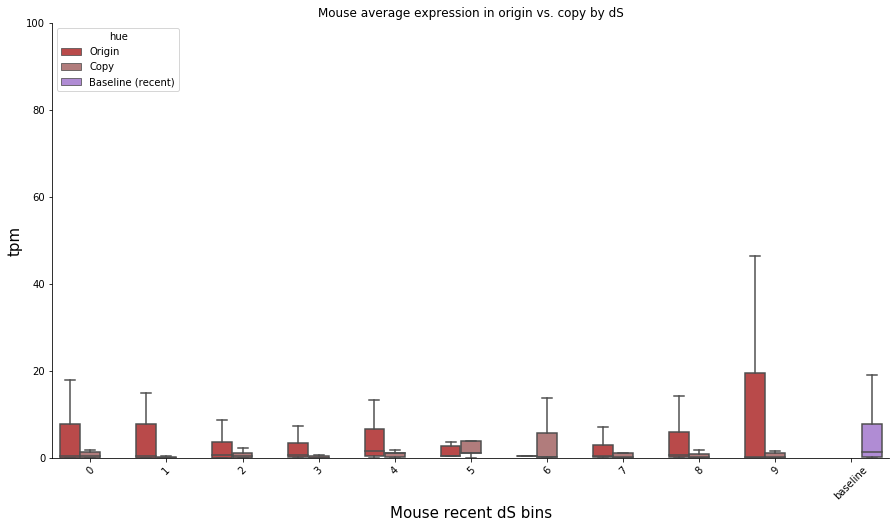

In [434]:
genexpr = pickle.load(open('/data/db/import/save/mouse-genexpr.pkl', 'rb'))
tissues=list(set(genexpr.columns).difference(['cpgness', 'cpgfull']))

tpm = pd.concat([paramech[paramech['retro'] != 0].assign(tpm=lambda x : [genexpr.loc[g1 if retro < 0 else g2][tissues].mean() if (g1 if retro < 0 else g2) in genexpr.index and len(genexpr.loc[g1 if retro < 0 else g2][tissues])>2 and max(genexpr.loc[g1 if retro < 0 else g2][tissues]) > 0.5 else None for g1,g2,retro in x[['g1', 'g2', 'retro']].iloc], hue=0),
                 paramech[paramech['retro'] != 0].assign(tpm=lambda x : [genexpr.loc[g2 if retro < 0 else g1][tissues].mean() if (g2 if retro < 0 else g1) in genexpr.index and len(genexpr.loc[g2 if retro < 0 else g1][tissues])>2 and max(genexpr.loc[g2 if retro < 0 else g1][tissues]) > 0.5 else None for g1,g2,retro in x[['g1', 'g2', 'retro']].iloc], hue=1)])

fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
g=boxplot(ax=ax, x="dSbin", y="tpm", hue='hue', data=
          pd.concat([partition_bins(tpm[(tpm['dS']<1.9366) & (~tpm['dS'].isna())], -tpm[(tpm['dS']<1.9366) & (~tpm['dS'].isna())]['dS'], 10, 'dSbin'),
                     genexpr.loc[genexpr.index.intersection(set([*paramech[paramech['dS']<1.9366]['g1'].values,*paramech[paramech['dS']<1.9366]['g2'].values]))].assign(hue=2).assign(dSbin='baseline')
                     .assign(tpm=lambda x : [genexpr.loc[g][tissues].mean() if len(genexpr.loc[g][tissues])>2 and max(genexpr.loc[g][tissues]) > 0.5 else None for g in x.index])
                    ]),
                     order=[*[x for x in range(10)], 'baseline'], palette={0: '#CB3838', 1: '#BA7373', 2:'#b080e0'}, fliersize=0.0)
ax.set_ylim([0,100])
g.legend_.texts[0].set_text('Origin')
g.legend_.texts[1].set_text('Copy')
g.legend_.texts[2].set_text('Baseline (recent)')
pyplot.xlabel('Mouse recent dS bins')
pyplot.title('Mouse average expression in origin vs. copy by dS')
despine()
pyplot.savefig('tot-expr-mouse-dup-known-ds-retro-box-avg-tpm.pdf', dpi=600)




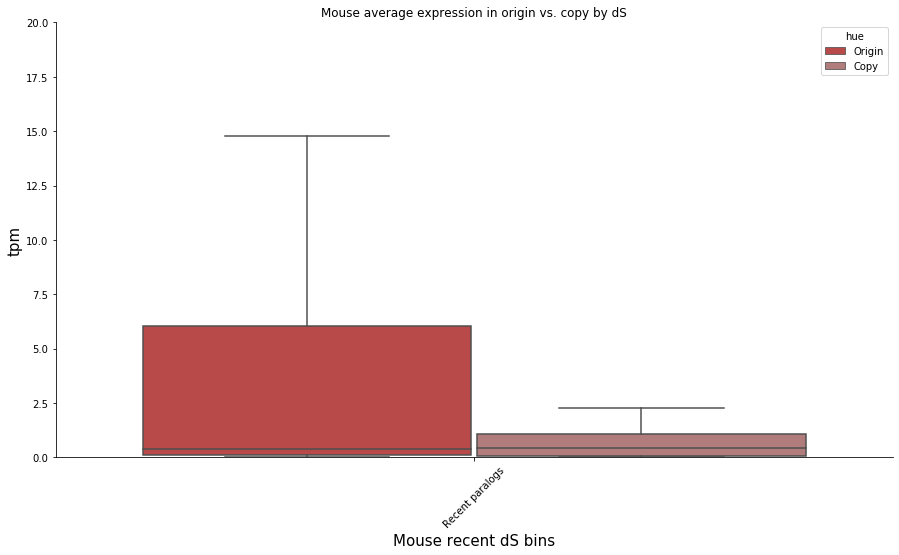

In [444]:
fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
g=boxplot(ax=ax, x="recent", y="tpm", hue='hue', data=
          pd.concat([partition_bins(tpm[(tpm['dS']<1.9366) & (~tpm['dS'].isna())], -tpm[(tpm['dS']<1.9366) & (~tpm['dS'].isna())]['dS'], 10, 'dSbin'),
                     #genexpr.loc[genexpr.index.intersection(set([*paramech[paramech['dS']<1.9366]['g1'].values,*paramech[paramech['dS']<1.9366]['g2'].values]))].assign(hue=2).assign(dSbin='baseline')
                     #.assign(tpm=lambda x : [genexpr.loc[g][tissues].mean() if len(genexpr.loc[g][tissues])>2 and max(genexpr.loc[g][tissues]) > 0.5 else None for g in x.index])
                    ]).assign(recent='Recent paralogs'),
                     palette={0: '#CB3838', 1: '#BA7373', 2:'#b080e0'}, fliersize=0.0)
ax.set_ylim([0,20])
g.legend_.texts[0].set_text('Origin')
g.legend_.texts[1].set_text('Copy')
#g.legend_.texts[2].set_text('Baseline (recent)')
pyplot.xlabel('Mouse recent dS bins')
pyplot.title('Mouse average expression in origin vs. copy by dS')
despine()
pyplot.savefig('tot-expr-mouse-dup-retro-box-avg-tpm.pdf', dpi=600)




In [438]:
tpm_mm_recent=partition_bins(tpm[(tpm['dS']<1.9366) & (~tpm['dS'].isna())], -tpm[(tpm['dS']<1.9366) & (~tpm['dS'].isna())]['dS'], 10, 'dSbin')
for x in sorted(tpm_mm_recent['dSbin'].unique()):
    print("Mann-Whitney test on TPM dSbin %d original vs. copy, FDR controlled: %s"%(x, mannwhitneyu(tpm_mm_recent[(tpm_mm_recent['dSbin'] == x)&(tpm_mm_recent['hue']==0)&(~tpm_mm_recent['tpm'].isna())]['tpm'], tpm_mm_recent[(tpm_mm_recent['dSbin'] == x)&(tpm_mm_recent['hue']==1)&(~tpm_mm_recent['tpm'].isna())]['tpm'], alternative='greater').pvalue*len(tpm_mm_recent['dSbin'].unique())))

print("Mann-Whitney test on TPM all recent original vs. copy: %s"%(mannwhitneyu(tpm_mm_recent[(tpm_mm_recent['hue']==0)&(~tpm_mm_recent['tpm'].isna())]['tpm'], tpm_mm_recent[(tpm_mm_recent['hue']==1)&(~tpm_mm_recent['tpm'].isna())]['tpm'], alternative='greater').pvalue))
print("Mann-Whitney test on TPM all recent original vs. all recent: %s"%(mannwhitneyu(tpm_mm_recent[(tpm_mm_recent['hue']==0)&(~tpm_mm_recent['tpm'].isna())]['tpm'], genexpr.loc[genexpr.index.intersection(set([*paramech[paramech['dS']<1.9366]['g1'].values,*paramech[paramech['dS']<1.9366]['g2'].values]))].assign(tpm=lambda x : [genexpr.loc[g][tissues].mean() if len(genexpr.loc[g][tissues])>2 and max(genexpr.loc[g][tissues]) > 0.5 else None for g in x.index])['tpm'].dropna(), alternative='less').pvalue))
print("Mann-Whitney test on TPM all recent copy vs. all recent: %s"%(mannwhitneyu(tpm_mm_recent[(tpm_mm_recent['hue']==1)&(~tpm_mm_recent['tpm'].isna())]['tpm'], genexpr.loc[genexpr.index.intersection(set([*paramech[paramech['dS']<1.9366]['g1'].values,*paramech[paramech['dS']<1.9366]['g2'].values]))].assign(tpm=lambda x : [genexpr.loc[g][tissues].mean() if len(genexpr.loc[g][tissues])>2 and max(genexpr.loc[g][tissues]) > 0.5 else None for g in x.index])['tpm'].dropna(), alternative='less').pvalue))

Mann-Whitney test on TPM dSbin 0 original vs. copy, FDR controlled: 3.2557400753642978
Mann-Whitney test on TPM dSbin 1 original vs. copy, FDR controlled: 3.707597297326831e-05
Mann-Whitney test on TPM dSbin 2 original vs. copy, FDR controlled: 0.779454596065165
Mann-Whitney test on TPM dSbin 3 original vs. copy, FDR controlled: 2.182664475814753e-06
Mann-Whitney test on TPM dSbin 4 original vs. copy, FDR controlled: 0.0038179036254302116
Mann-Whitney test on TPM dSbin 5 original vs. copy, FDR controlled: 9.090427395970657
Mann-Whitney test on TPM dSbin 6 original vs. copy, FDR controlled: 3.351655116754527
Mann-Whitney test on TPM dSbin 7 original vs. copy, FDR controlled: 2.4287298414493304
Mann-Whitney test on TPM dSbin 8 original vs. copy, FDR controlled: 0.34183398363303913
Mann-Whitney test on TPM dSbin 9 original vs. copy, FDR controlled: 2.13826123412809
Mann-Whitney test on TPM all recent original vs. copy: 1.4076074837988214e-08
Mann-Whitney test on TPM all recent original vs

In [10]:
paramech['mx']

2          0.496003
3         20.000000
6         20.000000
9         20.000000
12        20.000000
            ...    
356546     0.000000
356548     0.000000
356549     0.000000
356559     0.000000
356566     0.000000
Name: mx, Length: 55496, dtype: float64

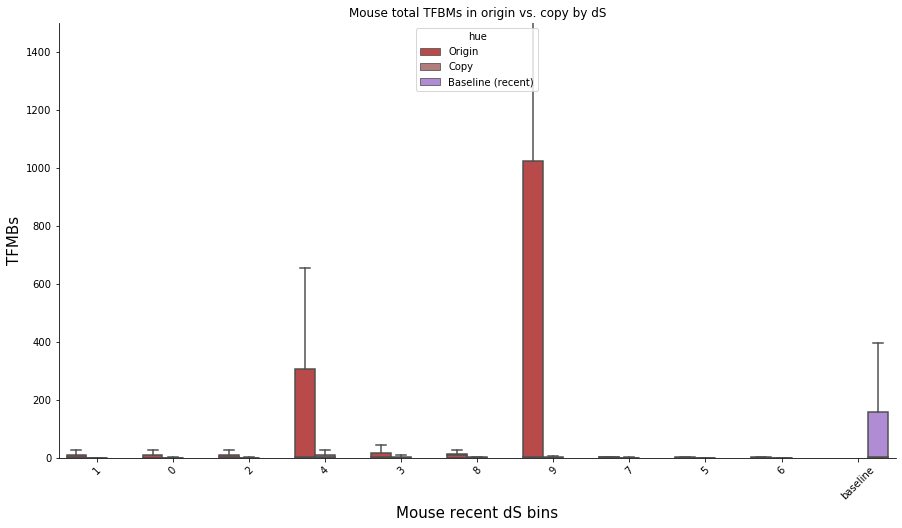

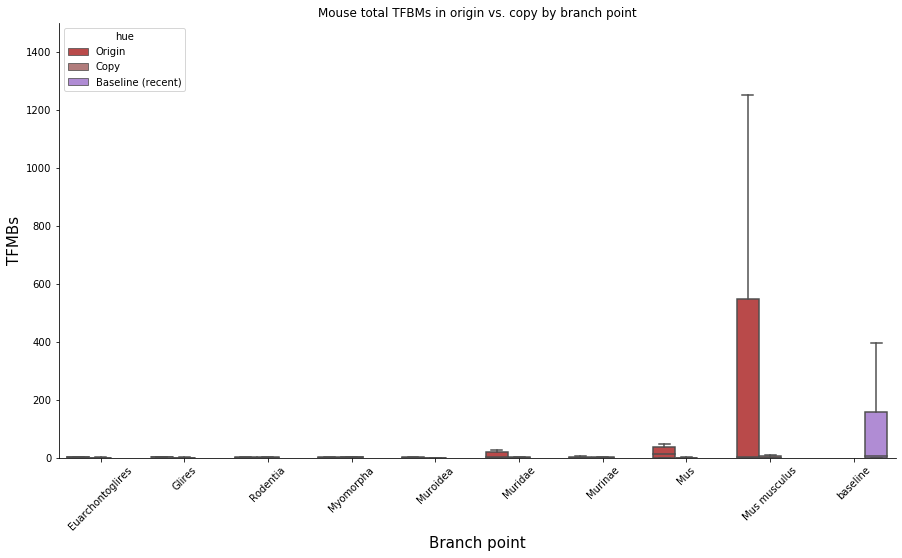

In [406]:
from pandas import concat
from utils import partition_bins
branch_mm_recent = ["Euarchontoglires", "Glires", "Rodentia", "Myomorpha", "Muroidea", "Muridae", "Murinae", "Mus", "Mus musculus"]

tfbm=paramech[paramech['retro'] != 0].assign(origin=lambda x: x['factors-g1']*(x['retro'] < 0 )+x['factors-g2']*(x['retro'] > 0), 
copy=lambda x: x['factors-g2']*(x['retro'] < 0 )+x['factors-g1']*(x['retro'] > 0))
tfbm=concat([tfbm.assign(hue=0, val=tfbm['origin']), tfbm.assign(hue=1, val=tfbm['copy'])])

fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
g=boxplot(ax=ax, x="dSbin", y="val", hue='hue', data=
          pd.concat([
              partition_bins(tfbm[(tfbm['dS']<1.9366) & (~tfbm['dS'].isna())], -tfbm[(tfbm['dS']<1.9366) & (~tfbm['dS'].isna())]['dS'], 10, 'dSbin'),
              paramech[paramech['dS']<1.9366][['g1', 'factors-g1']].drop_duplicates().assign(val=lambda x:x['factors-g1']).assign(hue=2).assign(dSbin='baseline')
          ]), palette={0: '#CB3838', 1: '#BA7373', 2: '#b080e0'}, fliersize=0.0)
ax.set_ylim([0,1500])
g.legend_.texts[0].set_text('Origin')
g.legend_.texts[1].set_text('Copy')
g.legend_.texts[2].set_text('Baseline (recent)')
pyplot.ylabel('TFMBs')
pyplot.xlabel('Mouse recent dS bins')
pyplot.title('Mouse total TFBMs in origin vs. copy by dS')
despine()
pyplot.savefig('tot-tfbm-mouse-dup-known-ds-retro-box.pdf', dpi=600)

fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
g=boxplot(ax=ax, x="Branch point", y="val", hue='hue', order=[*branch_mm_recent, 'baseline'], data=
          pd.concat([
              tfbm,
              paramech[paramech['dS']<1.9366][['g1', 'factors-g1']].drop_duplicates().assign(val=lambda x:x['factors-g1']).assign(hue=2).assign(**{'Branch point':'baseline'})
          ]), palette={0: '#CB3838', 1: '#BA7373', 2: '#b080e0'}, fliersize=0.0)
ax.set_ylim([0,1500])
g.legend_.texts[0].set_text('Origin')
g.legend_.texts[1].set_text('Copy')
g.legend_.texts[2].set_text('Baseline (recent)')
pyplot.ylabel('TFMBs')
pyplot.title('Mouse total TFBMs in origin vs. copy by branch point')
despine()
pyplot.savefig('tot-tfbm-mouse-dup-known-bp-retro-box.pdf', dpi=600)

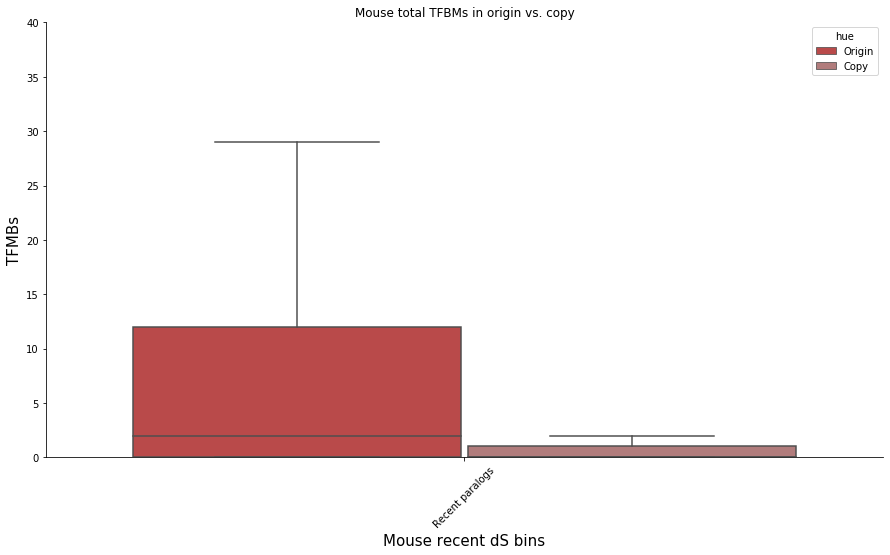

In [446]:
from pandas import concat
from utils import partition_bins

tfbm=paramech[paramech['retro'] != 0].assign(origin=lambda x: x['factors-g1']*(x['retro'] < 0 )+x['factors-g2']*(x['retro'] > 0), 
copy=lambda x: x['factors-g2']*(x['retro'] < 0 )+x['factors-g1']*(x['retro'] > 0))
tfbm=concat([tfbm.assign(hue=0, val=tfbm['origin']), tfbm.assign(hue=1, val=tfbm['copy'])])

fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
g=boxplot(ax=ax, x="recent", y="val", hue='hue', data=
          pd.concat([
              partition_bins(tfbm[(tfbm['dS']<1.9366) & (~tfbm['dS'].isna())], -tfbm[(tfbm['dS']<1.9366) & (~tfbm['dS'].isna())]['dS'], 10, 'dSbin'),
              #paramech[paramech['dS']<1.9366][['g1', 'factors-g1']].drop_duplicates().assign(val=lambda x:x['factors-g1']).assign(hue=2)
          ]).assign(recent='Recent paralogs'), palette={0: '#CB3838', 1: '#BA7373', 2: '#b080e0'}, fliersize=0.0)
ax.set_ylim([0,40])
g.legend_.texts[0].set_text('Origin')
g.legend_.texts[1].set_text('Copy')
#g.legend_.texts[2].set_text('Baseline (recent)')
pyplot.ylabel('TFMBs')
pyplot.xlabel('Mouse recent dS bins')
pyplot.title('Mouse total TFBMs in origin vs. copy')
despine()
pyplot.savefig('tot-tfbm-mouse-dup-retro-box.pdf', dpi=600)

In [442]:
tfbm_mm_recent=partition_bins(tfbm[(tfbm['dS']<1.9366) & (~tfbm['dS'].isna())], -tfbm[(tfbm['dS']<1.9366) & (~tfbm['dS'].isna())]['dS'], 10, 'dSbin')
for x in sorted(tfbm_mm_recent['dSbin'].unique()):
    print("Mann-Whitney test on TFBM dSbin %d original vs. copy, FDR controlled: %s"%(x, mannwhitneyu(tfbm_mm_recent[(tfbm_mm_recent['dSbin'] == x)&(tfbm_mm_recent['hue']==0)]['val'], tfbm_mm_recent[(tfbm_mm_recent['dSbin'] == x)&(tfbm_mm_recent['hue']==1)]['val'], alternative='greater').pvalue*len(tfbm_mm_recent['dSbin'].unique())))
for x in branch_mm_recent:
    if sum((tfbm_mm_recent['Branch point'] == x)&(tfbm_mm_recent['hue']==0)) > 0 and sum((tfbm_mm_recent['Branch point'] == x)&(tfbm_mm_recent['hue']==1)) > 0:
       print("Mann-Whitney test on TFBM Branch point %s original vs. copy, FDR controlled: %s"%(x, mannwhitneyu(tfbm_mm_recent[(tfbm_mm_recent['Branch point'] == x)&(tfbm_mm_recent['hue']==0)]['val'], tfbm_mm_recent[(tfbm_mm_recent['Branch point'] == x)&(tfbm_mm_recent['hue']==1)]['val'], alternative='greater').pvalue*len(branch_mm_recent)))
    
print("Mann-Whitney test on TFBM all recent original vs. copy: %s"%(mannwhitneyu(tfbm_mm_recent[(tfbm_mm_recent['hue']==0)]['val'], tfbm_mm_recent[(tfbm_mm_recent['hue']==1)]['val'], alternative='greater').pvalue))
print("Mann-Whitney test on TFBM all recent original vs. all recent genes: %s"%(mannwhitneyu(tfbm_mm_recent[(tfbm_mm_recent['hue']==0)]['val'], paramech[paramech['dS']<1.9366][['g1', 'factors-g1']].drop_duplicates().assign(val=lambda x:x['factors-g1'])['val'], alternative='less').pvalue))
print("Mann-Whitney test on TFBM all recent copy vs. all recent genes: %s"%(mannwhitneyu(tfbm_mm_recent[(tfbm_mm_recent['hue']==1)]['val'], paramech[paramech['dS']<1.9366][['g1', 'factors-g1']].drop_duplicates().assign(val=lambda x:x['factors-g1'])['val'], alternative='less').pvalue))


Mann-Whitney test on TFBM dSbin 0 original vs. copy, FDR controlled: 1.3521202737063308e-19
Mann-Whitney test on TFBM dSbin 1 original vs. copy, FDR controlled: 2.791132323525373e-17
Mann-Whitney test on TFBM dSbin 2 original vs. copy, FDR controlled: 7.066837583024296e-15
Mann-Whitney test on TFBM dSbin 3 original vs. copy, FDR controlled: 2.4910299805787557e-09
Mann-Whitney test on TFBM dSbin 4 original vs. copy, FDR controlled: 0.002980613593062397
Mann-Whitney test on TFBM dSbin 5 original vs. copy, FDR controlled: 9.188829427887154e-22
Mann-Whitney test on TFBM dSbin 6 original vs. copy, FDR controlled: 1.9412612780683383e-20
Mann-Whitney test on TFBM dSbin 7 original vs. copy, FDR controlled: 5.868471271823649e-14
Mann-Whitney test on TFBM dSbin 8 original vs. copy, FDR controlled: 5.299010964234335e-16
Mann-Whitney test on TFBM dSbin 9 original vs. copy, FDR controlled: 4.906871996064371e-07
Mann-Whitney test on TFBM Branch point Euarchontoglires original vs. copy, FDR controlle

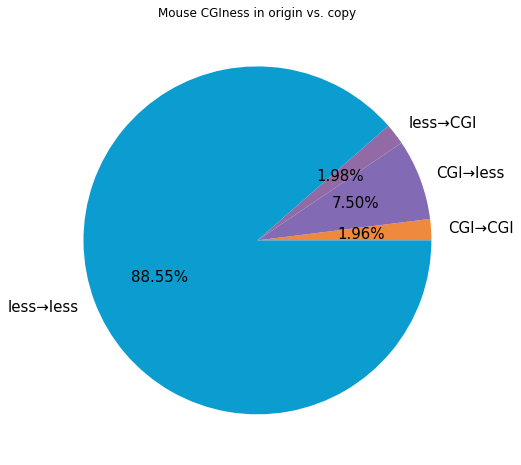

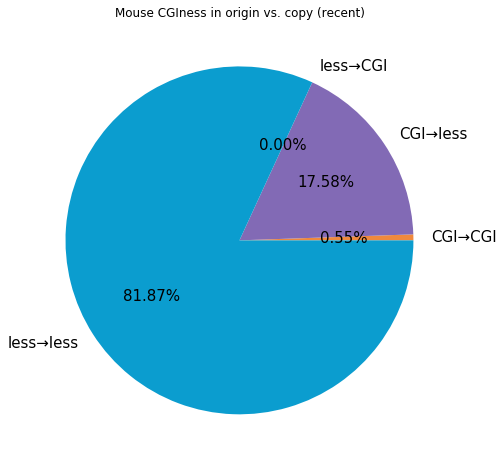

In [294]:
from pandas import concat
cgi=paramech[paramech['retro'] != 0].assign(origin=lambda x: x['g1_cpgness']*(x['retro'] < 0 )+x['g2_cpgness']*(x['retro'] > 0), 
copy=lambda x: x['g2_cpgness']*(x['retro'] < 0 )+x['g1_cpgness']*(x['retro'] > 0))

fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
g=pyplot.pie([sum((cgi['origin']==True)&(cgi['copy']==True)), sum((cgi['origin']==True)&(cgi['copy']==False)), sum((cgi['origin']==False)&(cgi['copy']==True)), sum((cgi['origin']==False)&(cgi['copy']==False))], labels=['CGI→CGI', 'CGI→less', 'less→CGI', 'less→less'], colors=['#ef893d','#826ab5', '#926aa5','#0b9dcf'], autopct='%0.2f%%', textprops={'fontsize': 15})
pyplot.title('Mouse CGIness in origin vs. copy')
despine()
pyplot.savefig('cginess-mouse-dup-retro-pie.pdf', dpi=600)

fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
g=pyplot.pie([sum((cgi['dSbin']>=19)&(cgi['origin']==True)&(cgi['copy']==True)), sum((cgi['dSbin']>=19)&(cgi['origin']==True)&(cgi['copy']==False)), sum((cgi['dSbin']>=19)&(cgi['origin']==False)&(cgi['copy']==True)), sum((cgi['dSbin']>=19)&(cgi['origin']==False)&(cgi['copy']==False))], labels=['CGI→CGI', 'CGI→less', 'less→CGI', 'less→less'], colors=['#ef893d','#826ab5', '#926aa5','#0b9dcf'], autopct='%0.2f%%', textprops={'fontsize': 15})
pyplot.title('Mouse CGIness in origin vs. copy (recent)')
despine()
pyplot.savefig('cginess-mouse-dup-retro-pie-recent.pdf', dpi=600)


In [233]:
from scipy.stats import fisher_exact
mm_genes=pickle.load(open('/data/db/import/save/mouse-exp_genes.pkl', 'rb'))
print('CGI:less-sourced paralogs, fisher-exact (all paralogs): log-odds %f, p-value %f'%fisher_exact([[sum(mm_genes['cpgfull'] == 0), sum(cgi['origin']==False)], [sum(mm_genes['cpgfull'] == 1), sum(cgi['origin']==True)]], alternative='less'))
print('CGI:less-sourced paralogs, fisher-exact (recent paralogs): log-odds %f, p-value %f'%fisher_exact([[sum(mm_genes['cpgfull'] == 0), sum((cgi['dSbin']>=19)&(cgi['origin']==False))], [sum(mm_genes['cpgfull'] == 1), sum((cgi['dSbin']>=19)&(cgi['origin']==True))]], alternative='less'))
print('CGI:less-copied paralogs, fisher-exact (all paralogs): log-odds %f, p-value %f'%fisher_exact([[sum(mm_genes['cpgfull'] == 0), sum(cgi['copy']==False)], [sum(mm_genes['cpgfull'] == 1), sum(cgi['copy']==True)]], alternative='less'))
print('CGI:less-copied paralogs, fisher-exact (recent paralogs): log-odds %f, p-value %f'%fisher_exact([[sum(mm_genes['cpgfull'] == 0), sum((cgi['dSbin']>=19)&(cgi['copy']==False))], [sum(mm_genes['cpgfull'] == 1), sum((cgi['dSbin']>=19)&(cgi['copy']==True))]], alternative='less'))


CGI:less-sourced paralogs, fisher-exact (all paralogs): log-odds 0.221308, p-value 0.000000
CGI:less-sourced paralogs, fisher-exact (recent paralogs): log-odds 0.468780, p-value 0.000018
CGI:less-copied paralogs, fisher-exact (all paralogs): log-odds 0.086990, p-value 0.000000
CGI:less-copied paralogs, fisher-exact (recent paralogs): log-odds 0.011694, p-value 0.000000


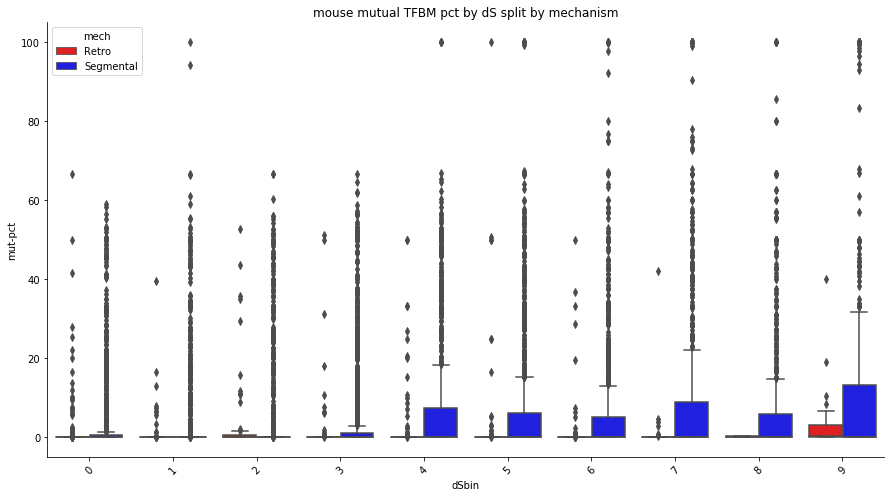

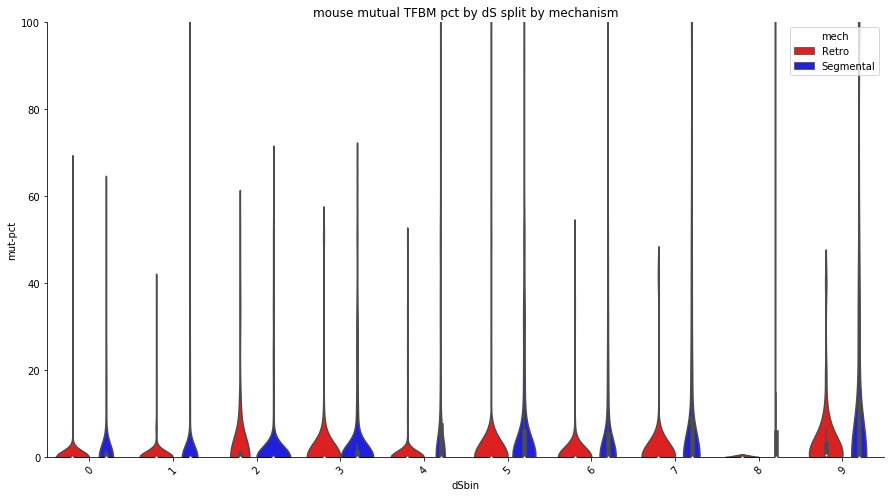

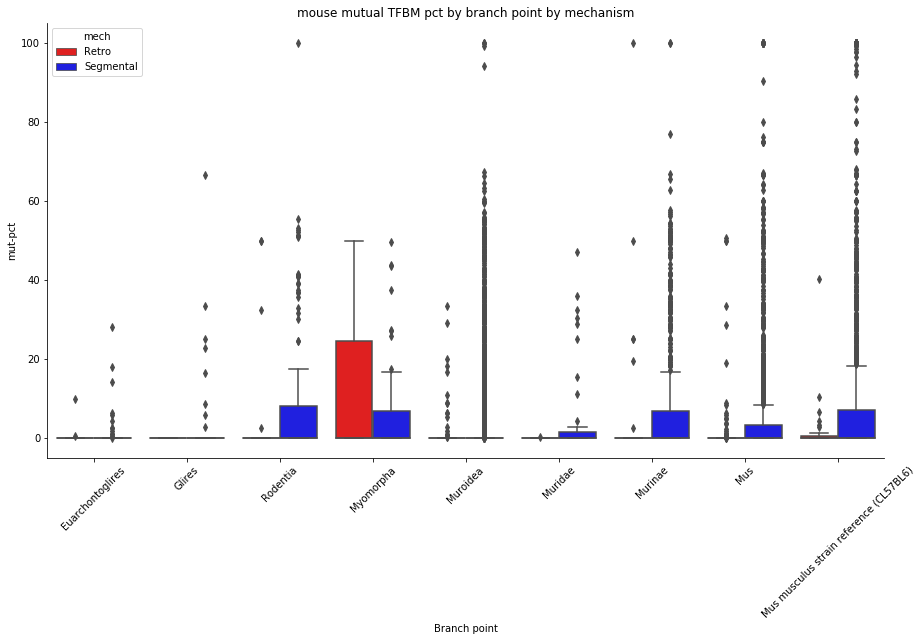

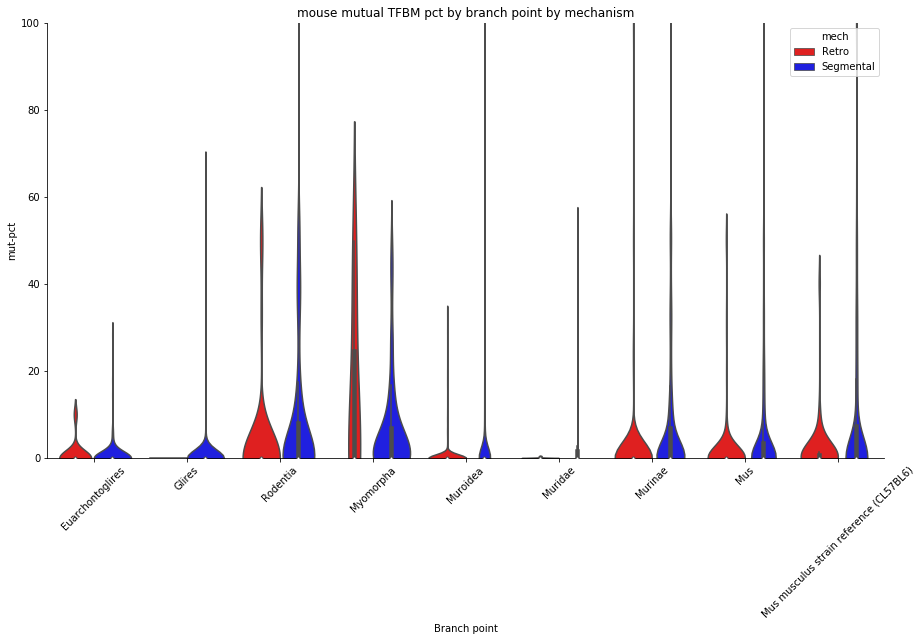

In [206]:
branch_mm_recent = ["Euarchontoglires", "Glires", "Rodentia", "Myomorpha", "Muroidea", "Muridae", "Murinae", "Mus", "Mus musculus"]
from utils import partition_bins

fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
g=boxplot(ax=ax, x="dSbin", y="mut-pct", hue='mech', data43534, palette={1: 'red', 2: 'blue'})
g.legend_.texts[0].set_text('Retro')
g.legend_.texts[1].set_text('Segmental')
pyplot.title('mouse mutual TFBM pct by dS split by mechanism')
#pyplot.legend(['Retro', 'Segmental'], loc='upper left')
despine()
pyplot.savefig('tfbm-mut-pct-mouse-dup-known-ds-mech-box.pdf', dpi=600)

fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
ax.set_ylim([0, 100])
g=violinplot(ax=ax, x="dSbin", y="mut-pct", hue='mech', data=partition_bins(paramech[(paramech['dS']<1.9366) & (~paramech['dS'].isna())], -paramech[(paramech['dS']<1.9366) & (~paramech['dS'].isna())]['dS'], 10, 'dSbin'), palette={1: 'red', 2: 'blue'})
g.legend_.texts[0].set_text('Retro')
g.legend_.texts[1].set_text('Segmental')
pyplot.title('mouse mutual TFBM pct by dS split by mechanism')
#pyplot.legend(['Retro', 'Segmental'], loc='upper left')
despine()
pyplot.savefig('tfbm-mut-pct-mouse-dup-known-ds-mech-violin.pdf', dpi=600)

fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
g=boxplot(ax=ax, x="Branch point", y="mut-pct", hue='mech', data=paramech[paramech['Branch point'].isin(branch_mm_recent)], order=branch_mm_recent, palette={1: 'red', 2: 'blue'})
g.legend_.texts[0].set_text('Retro')
g.legend_.texts[1].set_text('Segmental')
pyplot.title('mouse mutual TFBM pct by branch point by mechanism')
#fig.get_axes()[0].legend(title= 'Mechanism',loc='upper left',labels=["Retro","Segmental"],edgecolor='red',facecolor='blue',ncol=2)
#pyplot.legend(['Retro', 'Segmental'], loc='upper left')
despine()
pyplot.savefig('tfbm-mut-pct-mouse-dup-known-bp-mech-box.pdf', dpi=600)

fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
ax.set_ylim([0, 100])
g=violinplot(ax=ax, x="Branch point", y="mut-pct", hue='mech', data=paramech[paramech['Branch point'].isin(branch_mm_recent)], order=branch_mm_recent, palette={1: 'red', 2: 'blue'})
g.legend_.texts[0].set_text('Retro')
g.legend_.texts[1].set_text('Segmental')
pyplot.title('mouse mutual TFBM pct by branch point by mechanism')
#fig.get_axes()[0].legend(title= 'Mechanism',loc='upper left',labels=["Retro","Segmental"],edgecolor='red',facecolor='blue',ncol=2)
#pyplot.legend(['Retro', 'Segmental'], loc='upper left')
despine()
pyplot.savefig('tfbm-mut-pct-mouse-dup-known-bp-mech-violin.pdf', dpi=600)


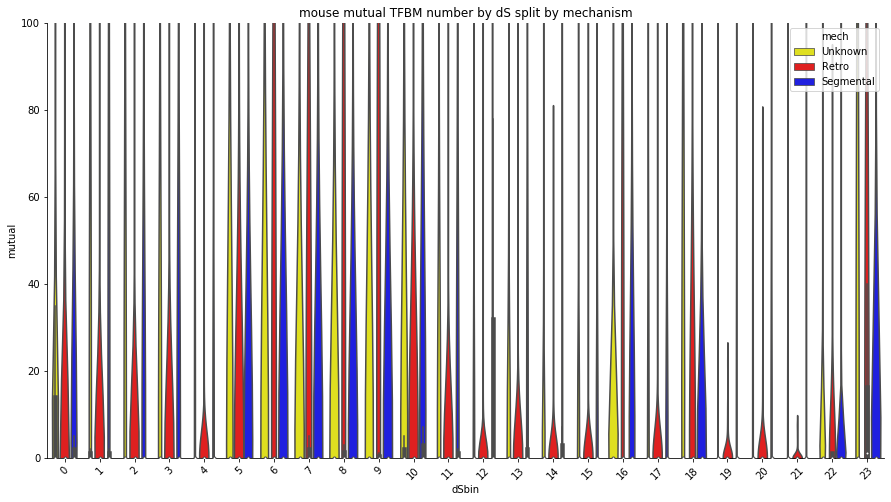

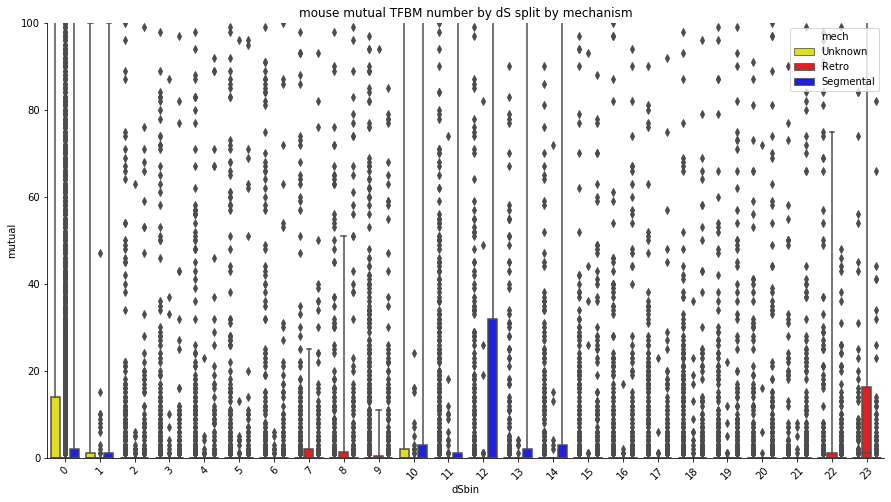

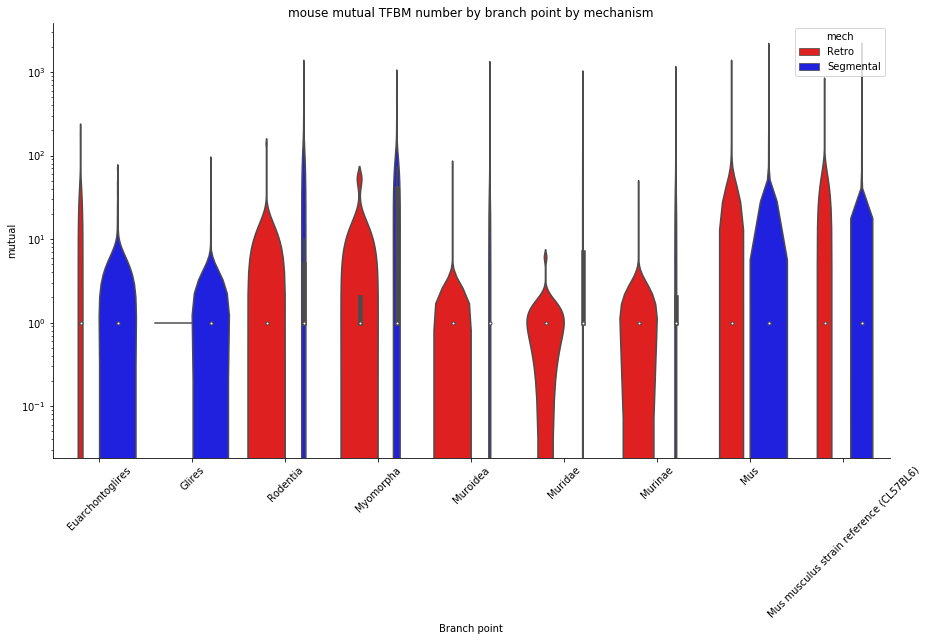

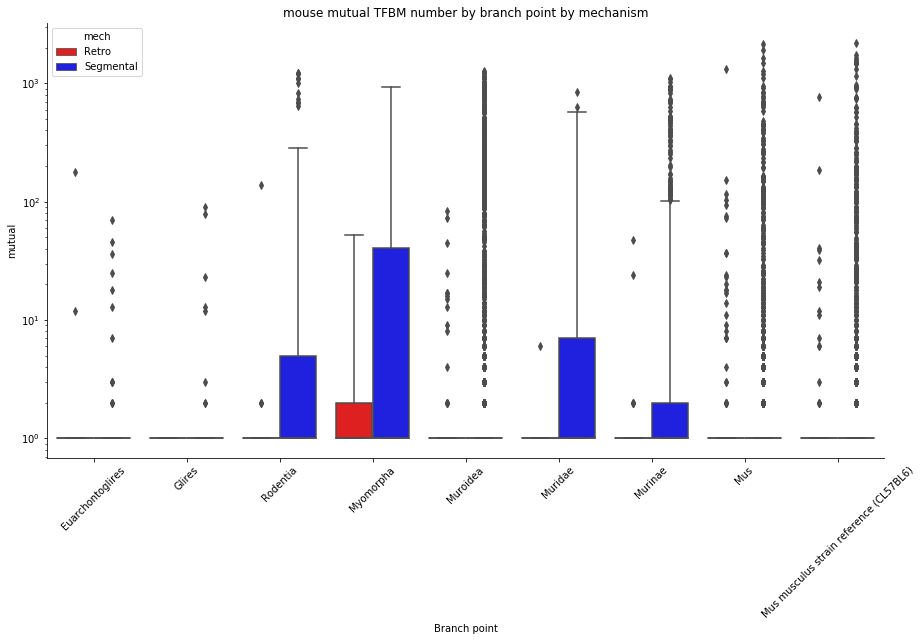

In [207]:
fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
ax.set_ylim([0, 100])
#ax.set_yscale('log')
g=violinplot(ax=ax, x="dSbin", y="mutual", hue='mech', data=paras.assign(mech = np.minimum(np.abs(paras['retro'])*1 + paras['segmental']*2, 2)), palette={0: 'yellow', 1: 'red', 2: 'blue'}, whis=100.0)
g.legend_.texts[0].set_text('Unknown')
g.legend_.texts[1].set_text('Retro')
g.legend_.texts[2].set_text('Segmental')
pyplot.title('mouse mutual TFBM number by dS split by mechanism')
#pyplot.legend(['Retro', 'Segmental'], loc='upper left')
despine()
pyplot.savefig('tfbm-mut-abs-mouse-dup-known-ds-mech-violin.pdf', dpi=600)

fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
ax.set_ylim([0, 100])
#ax.set_yscale('log')
g=boxplot(ax=ax, x="dSbin", y="mutual", hue='mech', data=paras.assign(mech = np.minimum(np.abs(paras['retro'])*1 + paras['segmental']*2, 2)), palette={0: 'yellow', 1: 'red', 2: 'blue'}, whis=100.0)
g.legend_.texts[0].set_text('Unknown')
g.legend_.texts[1].set_text('Retro')
g.legend_.texts[2].set_text('Segmental')
pyplot.title('mouse mutual TFBM number by dS split by mechanism')
#pyplot.legend(['Retro', 'Segmental'], loc='upper left')
despine()
pyplot.savefig('tfbm-mut-abs-mouse-dup-known-ds-mech-box.pdf', dpi=600)


fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
#ax.set_ylim([0, 100])
ax.set_yscale('log')
g=violinplot(ax=ax, x="Branch point", y="mutual", hue='mech', data=paramech[paramech['Branch point'].isin(branch_mm_recent)].assign(mutual=lambda x : x['mutual']+1), order=branch_mm_recent43534, palette={1: 'red', 2: 'blue'}, whis=100.0)
g.legend_.texts[0].set_text('Retro')
g.legend_.texts[1].set_text('Segmental')
pyplot.title('mouse mutual TFBM number by branch point by mechanism')
#fig.get_axes()[0].legend(title= 'Mechanism',loc='upper left',labels=["Retro","Segmental"],edgecolor='red',facecolor='blue',ncol=2)
#pyplot.legend(['Retro', 'Segmental'], loc='upper left')
despine()
pyplot.savefig('tfbm-mut-abs-mouse-dup-known-bp-mech-violin.pdf', dpi=600)

fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
#ax.set_ylim([0, 750])
ax.set_yscale('log')
g=boxplot(ax=ax, x="Branch point", y="mutual", hue='mech', data=paramech[paramech['Branch point'].isin(branch_mm_recent)].assign(mutual=lambda x : x['mutual']+1), order=branch_mm_recent, palette={1: 'red', 2: 'blue'}, whis=100.0)
g.legend_.texts[0].set_text('Retro')
g.legend_.texts[1].set_text('Segmental')
pyplot.title('mouse mutual TFBM number by branch point by mechanism')
#fig.get_axes()[0].legend(title= 'Mechanism',loc='upper left',labels=["Retro","Segmental"],edgecolor='red',facecolor='blue',ncol=2)
#pyplot.legend(['Retro', 'Segmental'], loc='upper left')
despine()
pyplot.savefig('tfbm-mut-abs-mouse-dup-known-bp-mech-box.pdf', dpi=600)

In [120]:
paramech[paramech['mutual'] == 0]

Unnamed: 0                             Branch point  CpG-ness      dN  \
120            241                             Opisthokonta         0  0.1568   
639           1278                             Opisthokonta         0  0.9668   
653           1306                             Opisthokonta         0  0.9248   
742           1484                             Opisthokonta         0  1.0638   
758           1517                             Opisthokonta         1  0.7449   
...            ...                                      ...       ...     ...   
356544      713088  Mus musculus strain reference (CL57BL6)         0  0.0227   
356546      713093  Mus musculus strain reference (CL57BL6)         0  0.0122   
356548      713097  Mus musculus strain reference (CL57BL6)         0  0.0177   
356549      713099  Mus musculus strain reference (CL57BL6)         0  0.0191   
356559      713119  Mus musculus strain reference (CL57BL6)         0  0.0833   

             dS  Similarity    Length   Distance                  g1  \
120     40.9557     73.5608  145722.0  300000000  ENSMUSG00000020532   
639     14.3375     25.2941    5090.5  300000000  ENSMUSG00000031330   
653     65.4586     16.1593   12835.5  300000000  ENSMUSG00000001569   
742     11.2964     12.2951   10643.0  300000000  ENSMUSG00000051437   
758     57.8305     30.7047    9132.0  300000000  ENSMUSG00000008604   
...         ...         ...       ...        ...                 ...   
356544   0.0089     94.5338    2706.0      46282  ENSMUSG00000096527   
356546   0.0126     96.4169    2692.0      34436  ENSMUSG00000079091   
356548   0.0095     94.2857    2705.5      64771  ENSMUSG00000095557   
356549   0.0139     93.9683    2705.5      22758  ENSMUSG00000041505   
356559   0.1369     86.2069    2764.5  300000000  ENSMUSG00000079093   

                        g2  ...  PolyAK2              trans1  \
120     ENSMUSG00000042010  ...        0  ENSMUST00000020843   
639     ENSMUSG00000035649  ...        1  ENSMUST00000033692   
653     ENSMUSG00000079247  ...        0  ENSMUST00000001611   
742     ENSMUSG00000055720  ...        0  ENSMUST00000059121   
758     ENSMUSG00000051437  ...        1  ENSMUST00000008748   
...                    ...  ...      ...                 ...   
356544  ENSMUSG00000096664  ...        1  ENSMUST00000198912   
356546  ENSMUSG00000096527  ...        0  ENSMUST00000110596   
356548  ENSMUSG00000096527  ...        0  ENSMUST00000179214   
356549  ENSMUSG00000096527  ...        0  ENSMUST00000200228   
356559  ENSMUSG00000096798  ...        1  ENSMUST00000110598   

                    trans2  conexons  exonsg1  exonsg2  retro  segmental  \
120     ENSMUST00000031583  0.811321       54       52      0       True   
639     ENSMUST00000147272  0.000000        1        3      1      False   
653     ENSMUST00000099947  0.000000       11        1     -1      False   
742     ENSMUST00000216925  0.000000        1       11      1      False   
758     ENSMUST00000059121  0.000000       11        1     -1      False   
...                    ...       ...      ...      ...    ...        ...   
356544  ENSMUST00000199142  1.000000        5        5      0       True   
356546  ENSMUST00000198912  1.000000        5        5      0       True   
356548  ENSMUST00000198912  1.000000        5        5      0       True   
356549  ENSMUST00000198912  1.000000        5        5      0       True   
356559  ENSMUST00000174320  1.000000        5        5      0       True   

        prom_clust  mech  
120              0     2  
639              1     1  
653              1     1  
742              0     1  
758              0     1  
...            ...   ...  
356544           1     2  
356546           1     2  
356548           1     2  
356549           1     2  
356559           1     2  

[42334 rows x 178 columns]

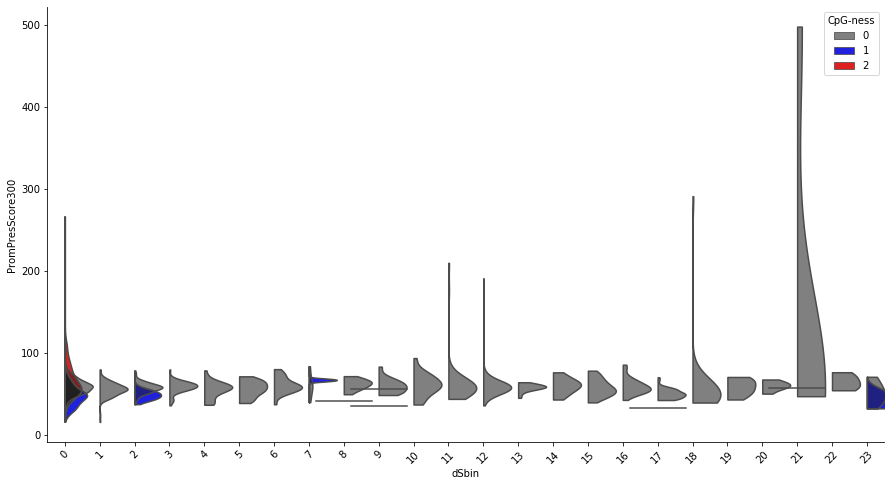

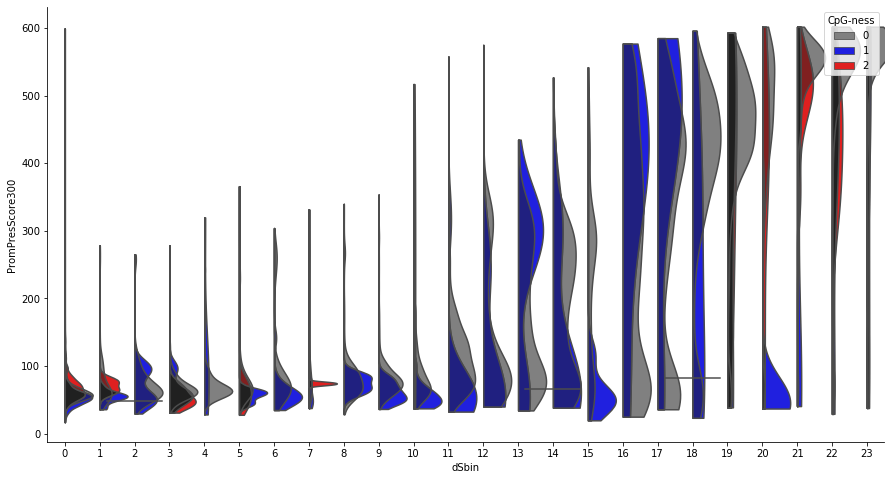

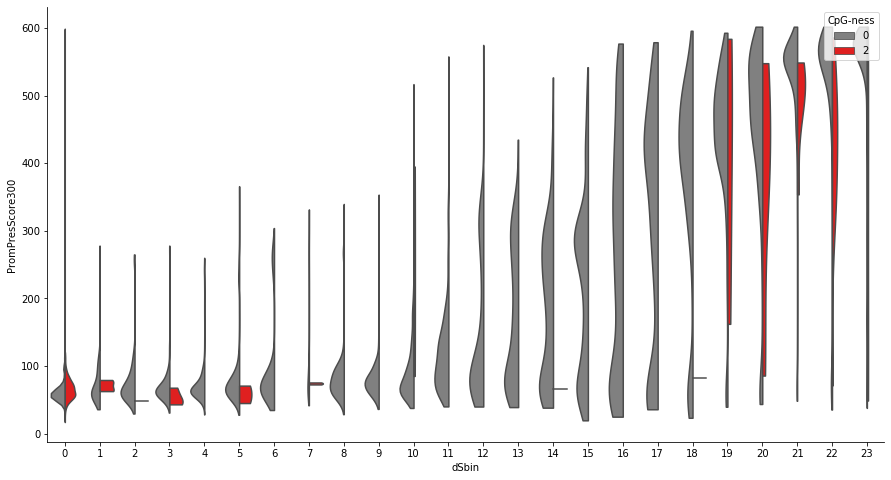

In [129]:
from matplotlib import pyplot
from plots import onesidedviolinplot
from seaborn import despine, violinplot

branch_order = ["Opisthokonta", "Bilateria", "Chordata", "Vertebrata", "Gnathostomata", "Euteleostomi", "Sarcopterygii", "Tetrapoda", "Amniota",
                "Mammalia", "Theria", "Eutheria", "Boreoeutheria", "Euarchontoglires", "Glires", "Rodentia", "Myomorpha", "Muroidea", "Muridae", "Murinae", "Mus", "Mus musculus"]

fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
onesidedviolinplot(ax=ax, x="dSbin", y="PromPresScore300", hue="CpG-ness", cut=0, data=paras[paras['retro'] == 1], inner=None, palette=['grey', 'blue', 'red'])
despine()
fig, ax = pyplot.subplots(figsize=(15,8))
onesidedviolinplot(ax=ax, x="dSbin", y="PromPresScore300", hue="CpG-ness", cut=0, data=paras[paras['segmental'] == 1], inner=None, palette=['grey', 'blue', 'red'])
despine()
fig, ax = pyplot.subplots(figsize=(15,8))
violinplot(ax=ax, split=True, x="dSbin", y="PromPresScore300", hue="CpG-ness", cut=0, data=paras[(paras['segmental'] == 1)&(paras['CpG-ness']%2 == 0)], inner=None, palette=['grey', 'red'])
despine()

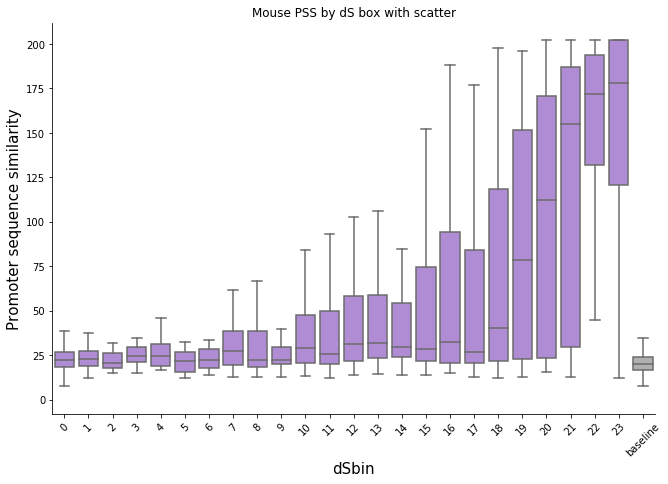

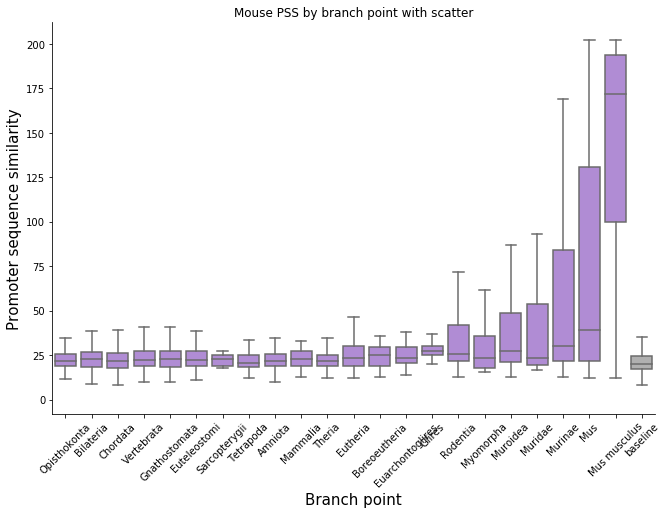

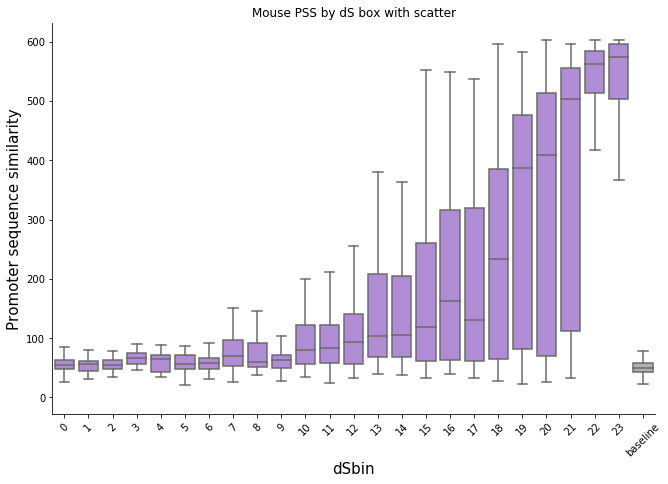

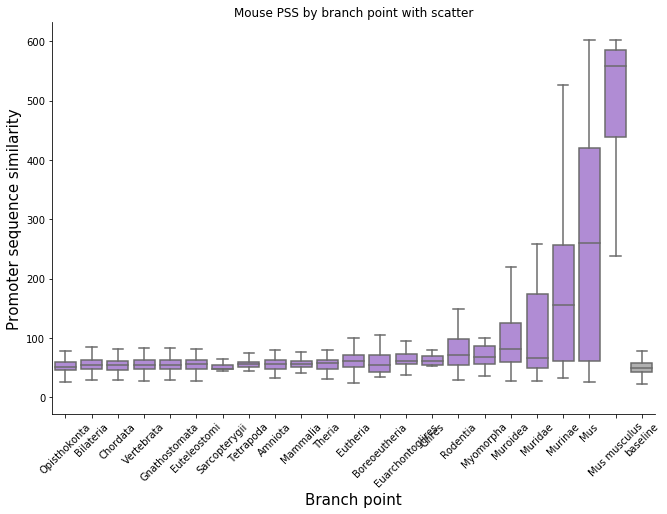

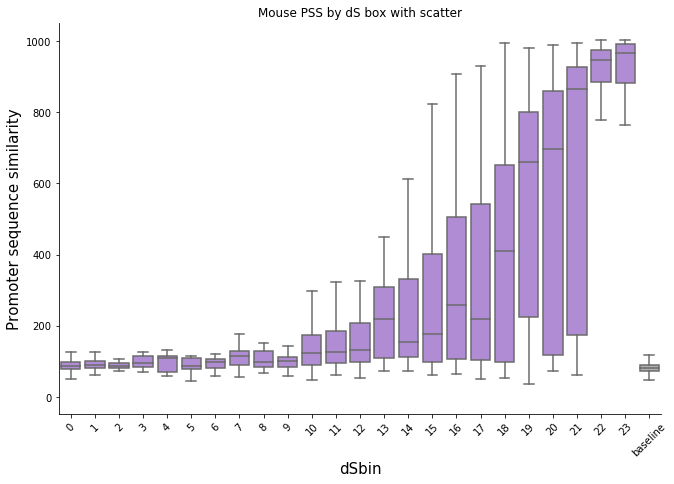

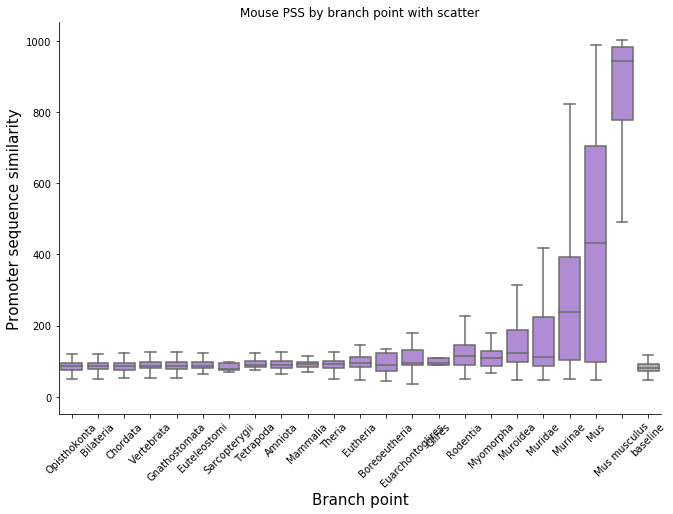

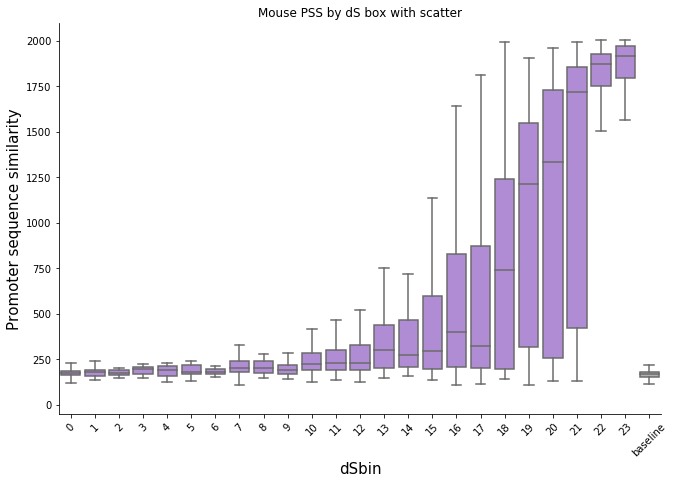

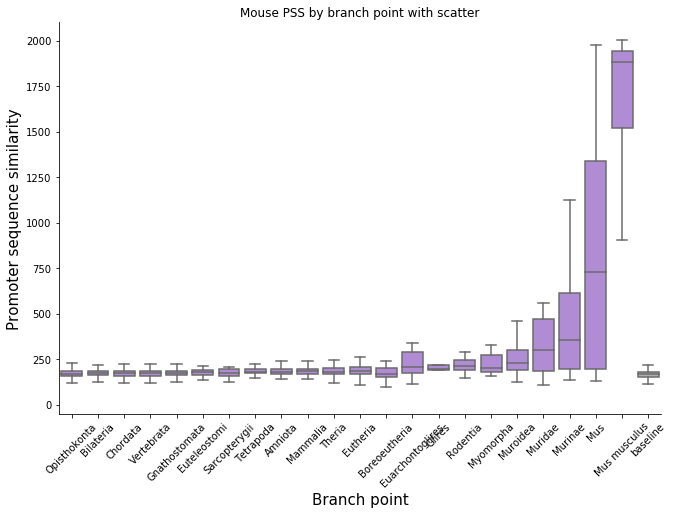

In [407]:
from seaborn import boxplot
import pandas as pd
pyplot.rc('axes', labelsize=15)    # fontsize of the x and y labels

for pre in [100, 300, 500, 1000]:
    fig, ax = pyplot.subplots(figsize=(10.8,7.2))
    pyplot.xticks(rotation=45)
    mm_baseline = pd.DataFrame.from_records([r[2:] for r in pickle.load(open('/data/db/import/save/mouse-promoter-baseline-sim-%d.pkl'%pre, 'rb'))], columns=["PromPresScore%d"%pre, "PromPresTssMinus%d"%pre, "PromPresShift%d"%pre])
    g=boxplot(ax=ax, x="dSbin", y="PromPresScore%d"%pre, data=pd.concat([paras[((paras['fam_restricted_set'])|(paras['family_size']<=2))].assign(typ=0), mm_baseline.assign(dSbin='baseline').assign(typ=1)]), palette={'#b0b0b0', '#b080e0'}, hue='typ', order=[*sorted(paras['dSbin'].unique()), 'baseline'], fliersize=0.0, dodge=False)
    ax.legend([],[], frameon=False)
    pyplot.ylabel('Promoter sequence similarity')
    pyplot.title('Mouse PSS by dS box with scatter')
    #pyplot.legend(['Retro', 'Segmental'], loc='upper left')
    despine()
    pyplot.savefig('prom-seq-similarity-mouse-scatter-dup-all-ds-%d.pdf'%pre, dpi=600)
    
    fig, ax = pyplot.subplots(figsize=(10.8,7.2))
    pyplot.xticks(rotation=45)
    g=boxplot(ax=ax, x="Branch point", y="PromPresScore%d"%pre, data=pd.concat([paras[((paras['fam_restricted_set'])|(paras['family_size']<=2))].assign(typ=0), mm_baseline.assign(**{'Branch point':'baseline'}).assign(typ=1)]), palette={'#b0b0b0', '#b080e0'}, hue='typ', order=[*branch_order, 'baseline'], fliersize=0.0, dodge=False)
    ax.legend([],[], frameon=False)
    pyplot.ylabel('Promoter sequence similarity')
    pyplot.title('Mouse PSS by branch point with scatter')
    #fig.get_axes()[0].legend(title= 'Mechanism',loc='upper left',labels=["Retro","Segmental"],edgecolor='red',facecolor='blue',ncol=2)
    #pyplot.legend(['Retro', 'Segmental'], loc='upper left')
    despine()
    pyplot.savefig('prom-seq-similarity-mouse-scatter-dup-all-bp-%d.pdf'%pre, dpi=600)

In [431]:
len(set(paras[((paras['fam_restricted_set'])|(paras['family_size']<=2))]['g1']).union(paras[((paras['fam_restricted_set'])|(paras['family_size']<=2))]['g2']))


6436

In [409]:
for pre in [100, 300, 500, 1000]:
    mm_baseline = pd.DataFrame.from_records([r[2:] for r in pickle.load(open('/data/db/import/save/mouse-promoter-baseline-sim-%d.pkl'%pre, 'rb'))], columns=["PromPresScore%d"%pre, "PromPresTssMinus%d"%pre, "PromPresShift%d"%pre])
    for x in sorted(paras['dSbin'].unique()):
        print("Mann-Whitney (pre-%d) test on dSbin %d vs. baseline, FDR controlled: %s"%(pre, x, mannwhitneyu(paras[((paras['fam_restricted_set'])|(paras['family_size']<=2))&(paras['dSbin'] == x)]['PromPresScore%d'%pre], mm_baseline['PromPresScore%d'%pre], alternative='greater').pvalue*len(paras['dSbin'].unique())))
    for x in branch_order:
        print("Mann-Whitney (pre-%d) test on Branch point %s vs. baseline, FDR controlled: %s"%(pre, x, mannwhitneyu(paras[((paras['fam_restricted_set'])|(paras['family_size']<=2))&(paras['Branch point'] == x)]['PromPresScore%d'%pre], mm_baseline['PromPresScore%d'%pre], alternative='greater').pvalue*len(branch_order)))
    

Mann-Whitney (pre-100) test on dSbin 0 vs. baseline, FDR controlled: 8.106504761706249e-59
Mann-Whitney (pre-100) test on dSbin 1 vs. baseline, FDR controlled: 0.6230341231814281
Mann-Whitney (pre-100) test on dSbin 2 vs. baseline, FDR controlled: 7.558769040304213
Mann-Whitney (pre-100) test on dSbin 3 vs. baseline, FDR controlled: 0.029080991416647328
Mann-Whitney (pre-100) test on dSbin 4 vs. baseline, FDR controlled: 0.5589577944839405
Mann-Whitney (pre-100) test on dSbin 5 vs. baseline, FDR controlled: 6.199240227811272
Mann-Whitney (pre-100) test on dSbin 6 vs. baseline, FDR controlled: 0.4645510080755021
Mann-Whitney (pre-100) test on dSbin 7 vs. baseline, FDR controlled: 0.00030213190363173094
Mann-Whitney (pre-100) test on dSbin 8 vs. baseline, FDR controlled: 0.09036652258289726
Mann-Whitney (pre-100) test on dSbin 9 vs. baseline, FDR controlled: 0.0013743247493912534
Mann-Whitney (pre-100) test on dSbin 10 vs. baseline, FDR controlled: 1.3999536110070373e-15
Mann-Whitney (pr

In /home/gencpg/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/gencpg/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/gencpg/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/gencpg/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/gencpg/.local/lib/python3.6/site-packages/matplotlib/mpl-data/s

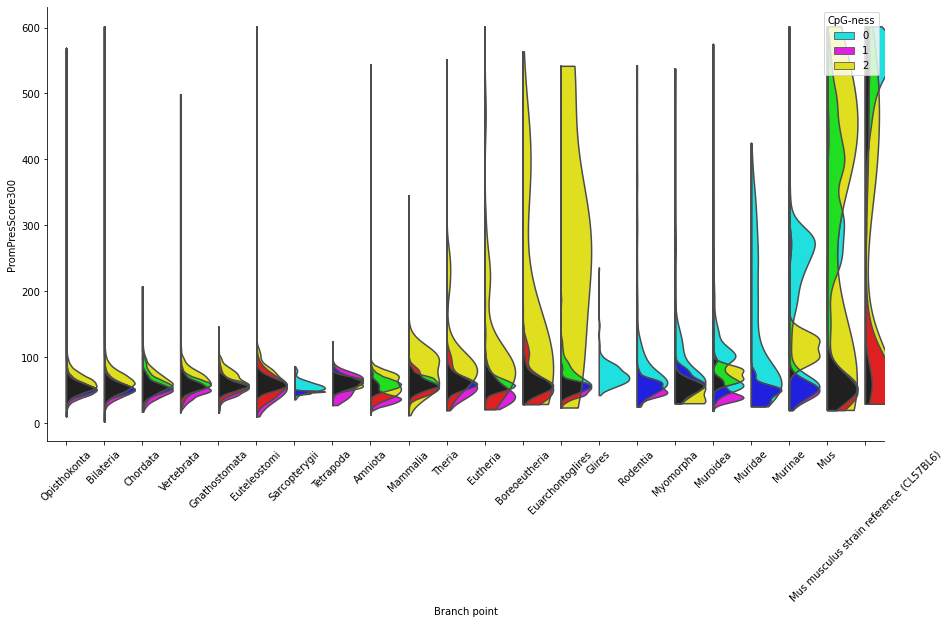

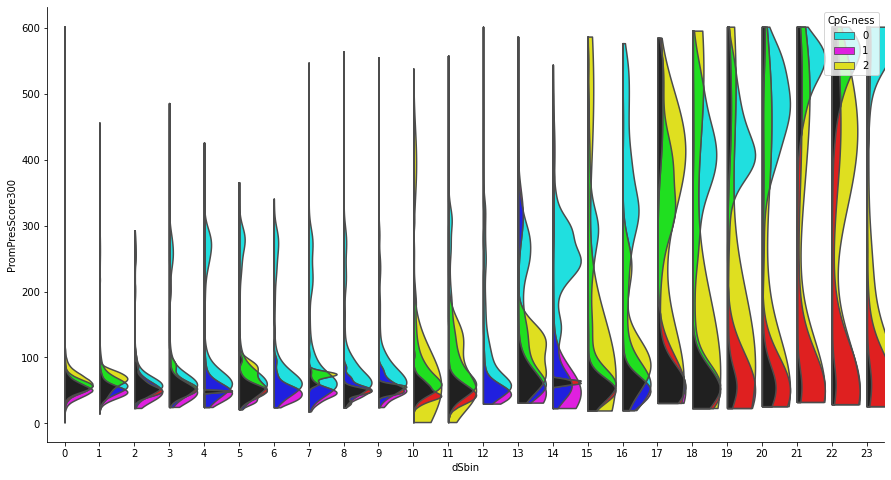

In [3]:
from matplotlib import pyplot
from plots import onesidedviolinplot
from seaborn import despine

branch_order = ["Opisthokonta", "Bilateria", "Chordata", "Vertebrata", "Gnathostomata", "Euteleostomi", "Sarcopterygii", "Tetrapoda", "Amniota",
                "Mammalia", "Theria", "Eutheria", "Boreoeutheria", "Euarchontoglires", "Glires", "Rodentia", "Myomorpha", "Muroidea", "Muridae", "Murinae", "Mus", "Mus musculus"]

fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
onesidedviolinplot(ax=ax, x="Branch point", y="PromPresScore300", hue="CpG-ness", cut=0, data=paras, order=branch_order, inner=None, palette=['cyan', 'magenta', 'yellow'], scale="count")
despine()
fig, ax = pyplot.subplots(figsize=(15,8))
onesidedviolinplot(ax=ax, x="dSbin", y="PromPresScore300", hue="CpG-ness", cut=0, data=paras, inner=None, palette=['cyan', 'magenta', 'yellow'], scale="count")
despine()

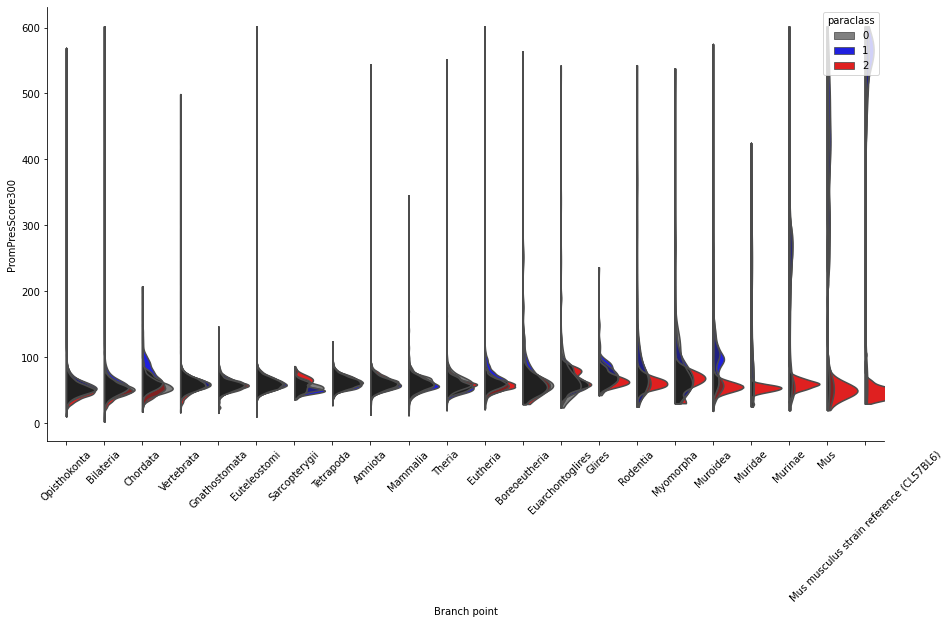

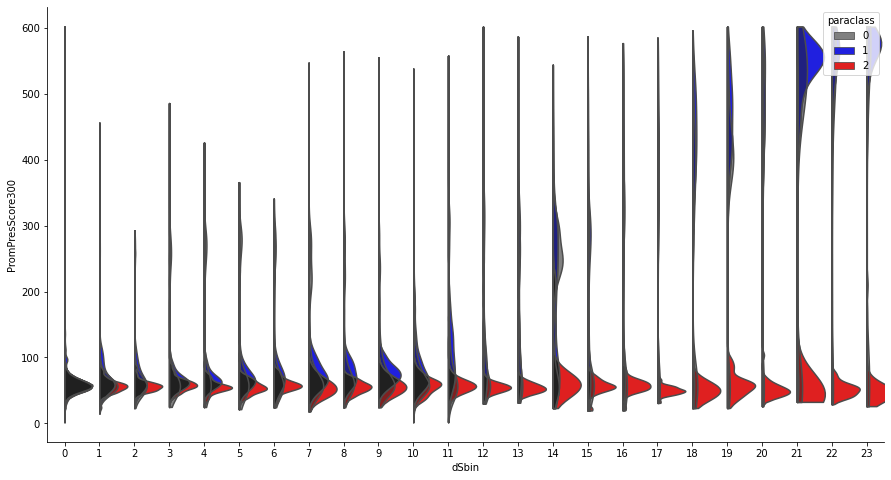

In [38]:
from matplotlib import pyplot
from plots import onesidedviolinplot
from seaborn import despine

branch_order = ["Opisthokonta", "Bilateria", "Chordata", "Vertebrata", "Gnathostomata", "Euteleostomi", "Sarcopterygii", "Tetrapoda", "Amniota",
                "Mammalia", "Theria", "Eutheria", "Boreoeutheria", "Euarchontoglires", "Glires", "Rodentia", "Myomorpha", "Muroidea", "Muridae", "Murinae", "Mus", "Mus musculus"]

fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
onesidedviolinplot(ax=ax, x="Branch point", y="PromPresScore300", hue="paraclass", cut=0, data=paras, order=branch_order, inner=None, palette=['grey', 'blue', 'red'])
despine()
fig, ax = pyplot.subplots(figsize=(15,8))
onesidedviolinplot(ax=ax, x="dSbin", y="PromPresScore300", hue="paraclass", cut=0, data=paras, inner=None, palette=['grey', 'blue', 'red'])
despine()

<AxesSubplot:xlabel='dSbin', ylabel='PromPresScore300'>

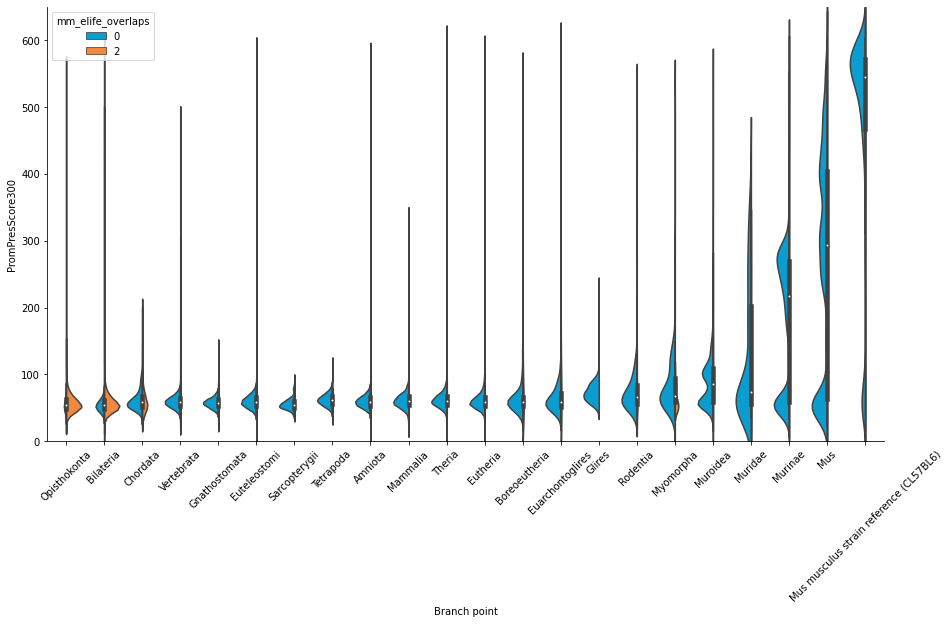

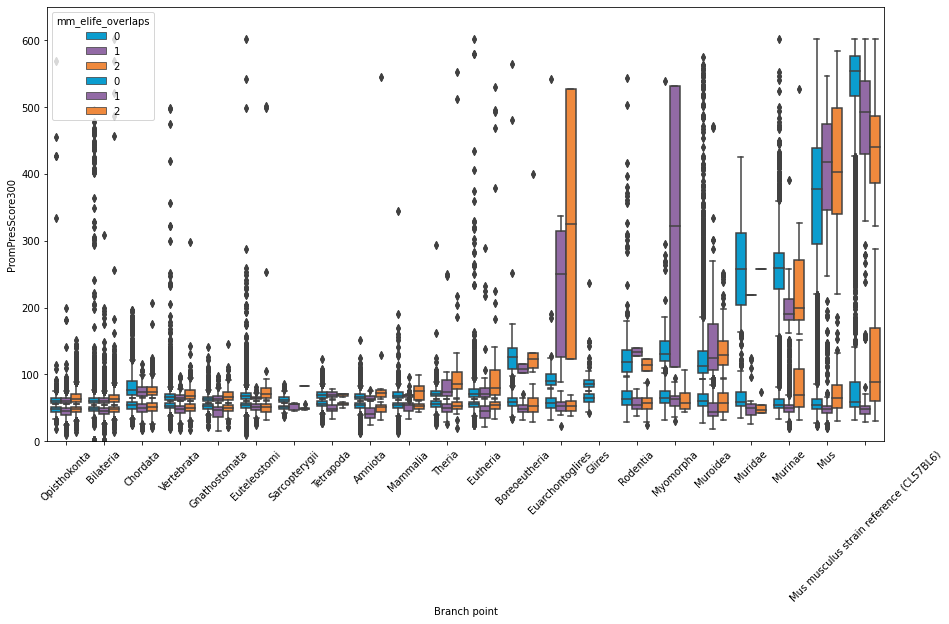

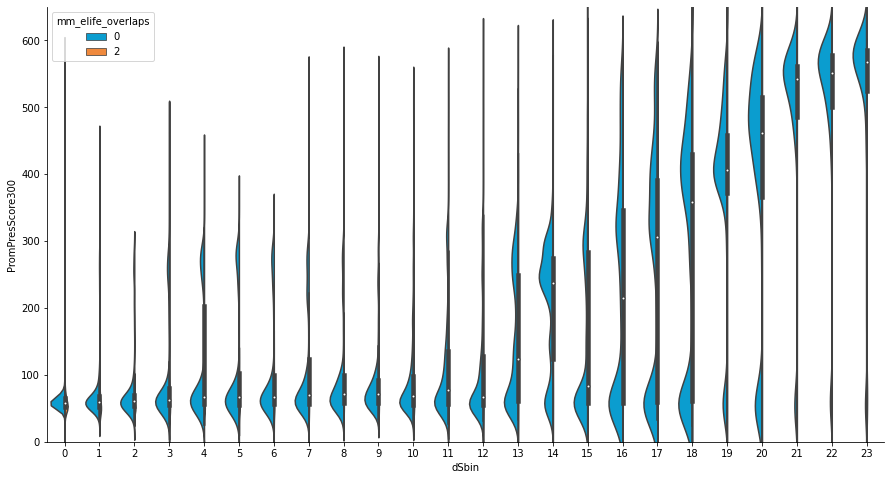

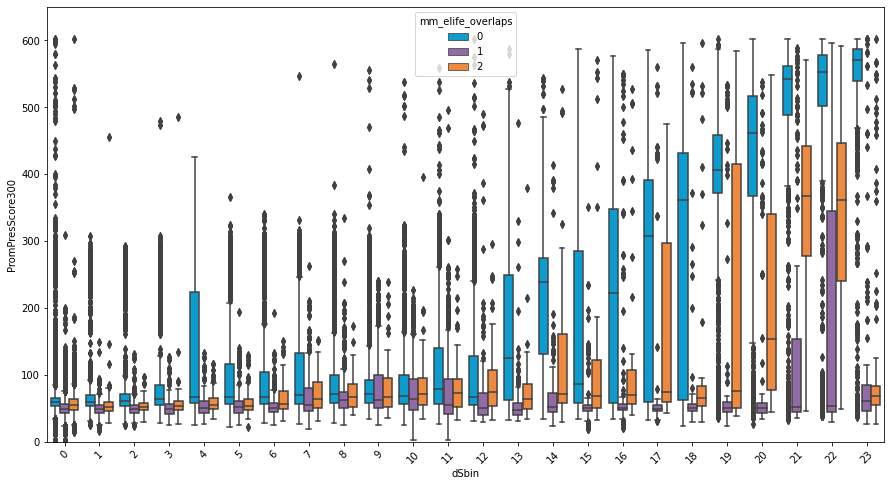

In [4]:
from matplotlib import pyplot
from seaborn import despine, violinplot, boxplot

branch_order = ["Opisthokonta", "Bilateria", "Chordata", "Vertebrata", "Gnathostomata", "Euteleostomi", "Sarcopterygii", "Tetrapoda", "Amniota",
                "Mammalia", "Theria", "Eutheria", "Boreoeutheria", "Euarchontoglires", "Glires", "Rodentia", "Myomorpha", "Muroidea", "Muridae", "Murinae", "Mus", "Mus musculus"]

fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
ax.set_ylim(0, 650)
violinplot(ax=ax, x="Branch point", y="PromPresScore300", hue="mm_elife_overlaps", data=paras[paras["mm_elife_overlaps"] != 1], order=branch_order, saturation=1.0, palette=['#0B9DCF', '#EF893D'], split=True, scale="count")
despine()
fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
ax.set_ylim(0, 650)
boxplot(ax=ax, x="Branch point", y="PromPresScore300", hue="mm_elife_overlaps", data=paras[(paras["prom_clust"]==0)], order=branch_order, saturation=1.0, palette=['#0B9DCF', '#926AA5', '#EF893D'])
boxplot(ax=ax, x="Branch point", y="PromPresScore300", hue="mm_elife_overlaps", data=paras[(paras["prom_clust"]==1)], order=branch_order, saturation=1.0, palette=['#0B9DCF', '#926AA5', '#EF893D'])
fig, ax = pyplot.subplots(figsize=(15,8))
ax.set_ylim(0, 650)
violinplot(ax=ax, x="dSbin", y="PromPresScore300", hue="mm_elife_overlaps", data=paras[paras["mm_elife_overlaps"] != 1], saturation=1.0, palette=['#0B9DCF', '#EF893D'], split=True, scale="count")
despine()
fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
ax.set_ylim(0, 650)
boxplot(ax=ax, x="dSbin", y="PromPresScore300", hue="mm_elife_overlaps", data=paras, saturation=1.0, palette=['#0B9DCF', '#926AA5', '#EF893D'])


<AxesSubplot:xlabel='dSbin', ylabel='PromPresScore300'>

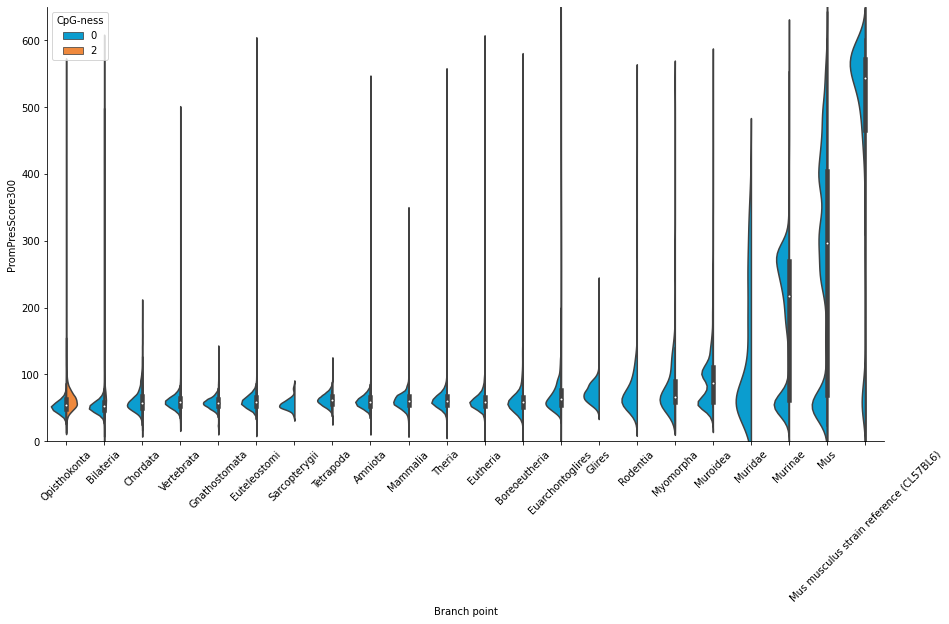

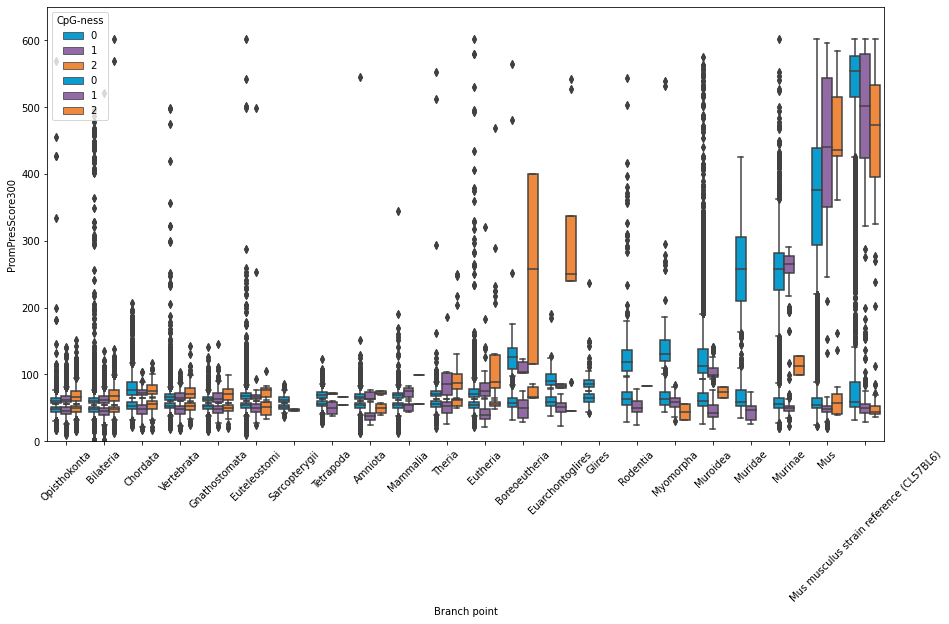

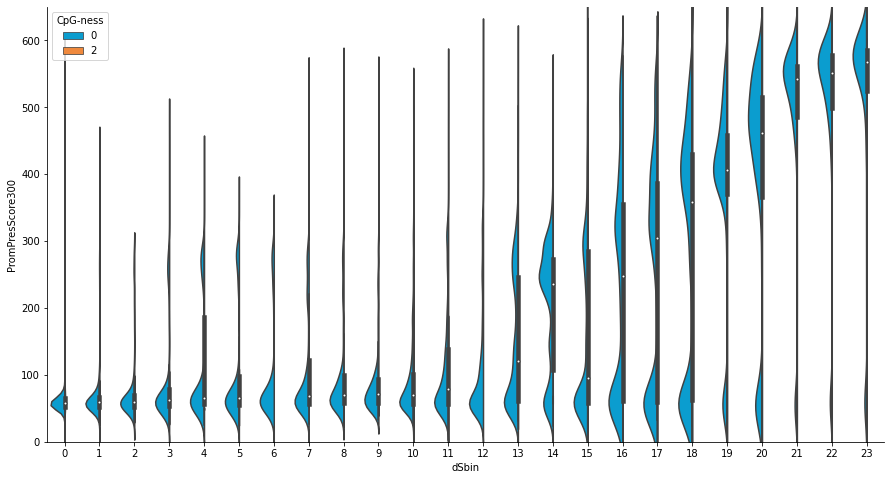

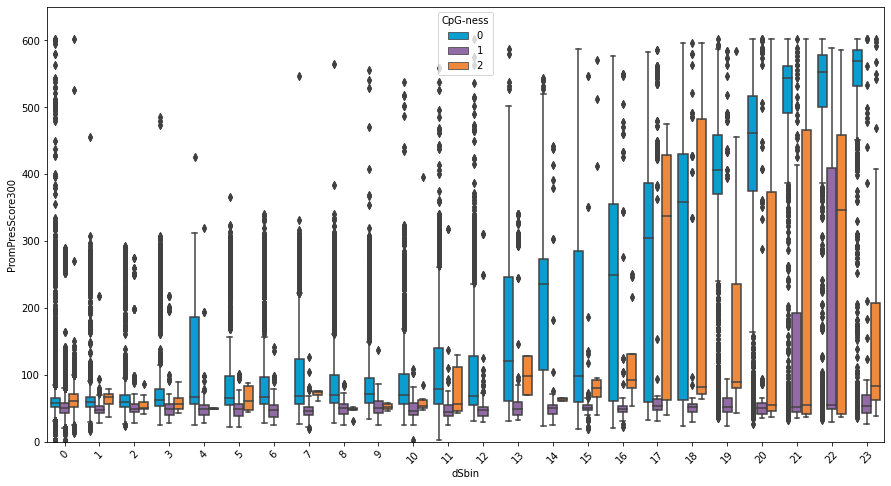

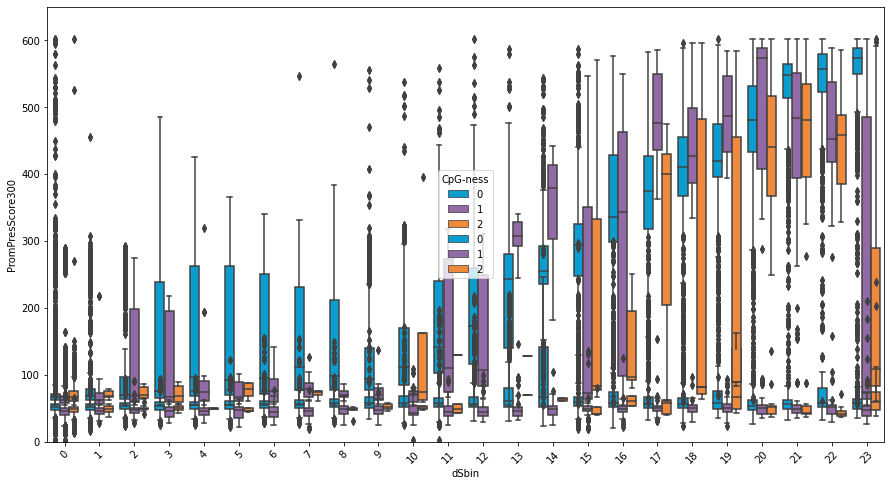

In [5]:
from matplotlib import pyplot
from seaborn import despine, violinplot, boxplot

branch_order = ["Opisthokonta", "Bilateria", "Chordata", "Vertebrata", "Gnathostomata", "Euteleostomi", "Sarcopterygii", "Tetrapoda", "Amniota",
                "Mammalia", "Theria", "Eutheria", "Boreoeutheria", "Euarchontoglires", "Glires", "Rodentia", "Myomorpha", "Muroidea", "Muridae", "Murinae", "Mus", "Mus musculus"]

fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
ax.set_ylim(0, 650)
violinplot(ax=ax, x="Branch point", y="PromPresScore300", hue="CpG-ness", data=paras[paras["CpG-ness"] != 1], order=branch_order, saturation=1.0, palette=['#0B9DCF', '#EF893D'], split=True, scale="count")
despine()
fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
ax.set_ylim(0, 650)
boxplot(ax=ax, x="Branch point", y="PromPresScore300", hue="CpG-ness", data=paras[(paras["prom_clust"]==0)], order=branch_order, saturation=1.0, palette=['#0B9DCF', '#926AA5', '#EF893D'])
boxplot(ax=ax, x="Branch point", y="PromPresScore300", hue="CpG-ness", data=paras[(paras["prom_clust"]==1)], order=branch_order, saturation=1.0, palette=['#0B9DCF', '#926AA5', '#EF893D'])
fig, ax = pyplot.subplots(figsize=(15,8))
ax.set_ylim(0, 650)
violinplot(ax=ax, x="dSbin", y="PromPresScore300", hue="CpG-ness", data=paras[paras["CpG-ness"] != 1], saturation=1.0, palette=['#0B9DCF', '#EF893D'], split=True, scale="count")
despine()
fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
ax.set_ylim(0, 650)
boxplot(ax=ax, x="dSbin", y="PromPresScore300", hue="CpG-ness", data=paras, saturation=1.0, palette=['#0B9DCF', '#926AA5', '#EF893D'])
fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
ax.set_ylim(0, 650)
boxplot(ax=ax, x="dSbin", y="PromPresScore300", hue="CpG-ness", data=paras[(paras["prom_clust"] == 0)], saturation=1.0, palette=['#0B9DCF', '#926AA5', '#EF893D'])
boxplot(ax=ax, x="dSbin", y="PromPresScore300", hue="CpG-ness", data=paras[(paras["prom_clust"] == 1)], saturation=1.0, palette=['#0B9DCF', '#926AA5', '#EF893D'])


In [21]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
smf.ols(formula="PromPresScore300 ~ dSbin + mm_elife_overlaps", data=paras, subset=(paras["prom_clust"] == 1)).fit().summary()
#paras[(paras["prom_clust"] == 1)]

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       PromPresScore300   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                 9.399e+05
Date:                Wed, 05 May 2021   Prob (F-statistic):               0.00
Time:                        13:55:32   Log-Likelihood:            -1.6881e+06
No. Observations:              317146   AIC:                         3.376e+06
Df Residuals:                  317143   BIC:                         3.376e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            67.0021      0.111    603.561      0.000      66.785      67.220
dSbin                18.6894      0.014   1338.240      0.000      18.662      18.717
mm_elife_overlaps    -3.8933      0.123    -31.543      0.000      -4.135      -3.651
==============================================================================
Omnibus:                    86145.933   Durbin-Watson:                   0.235
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1553669.340
Skew:                          -0.847   Prob(JB):                         0.00
Kurtosis:                      13.710   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We are leaving only the top (well-preserved promoter sequence) cluster of paralogs. The bottom cluster of paralogs does not have promoter sequence preserved above base-level (that is what you'd get for matching a random pair of promoter sequences)

In it, we model the preservation score as a linear regression of dS and CGI-ness:
`Score ~ dS + CGI-ness`

we then get a positive coefficient for `-dSbin` (that is, negative coefficient for dS) and a negative coefficient for CGI-ness, which goes to show that within that cluster the CGI-full genes have less promoter sequence preservation than the CGI-less genes.

The regression being used is the least squares linear regression.

<AxesSubplot:xlabel='Branch point', ylabel='PromPresTssMinus300'>

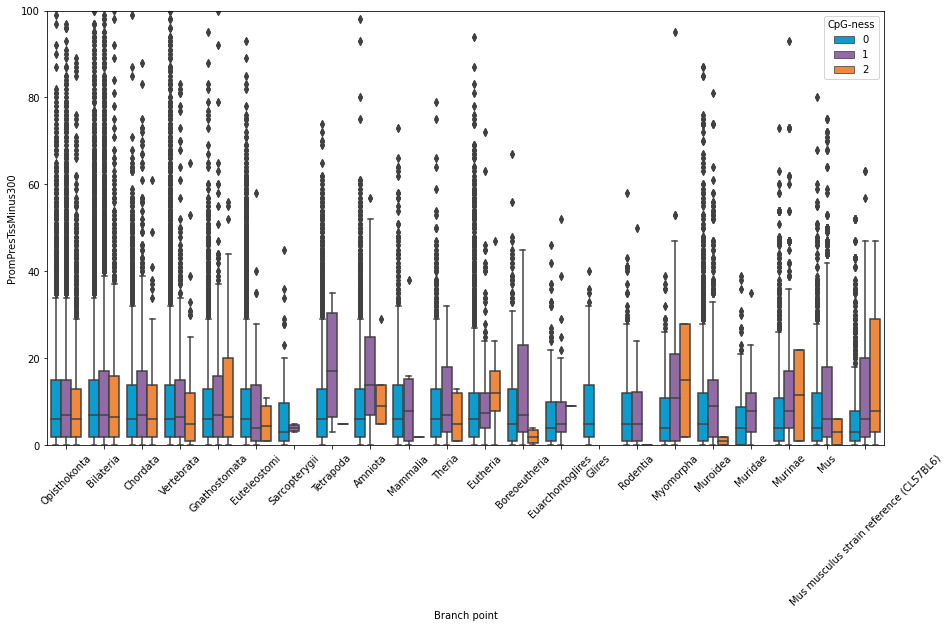

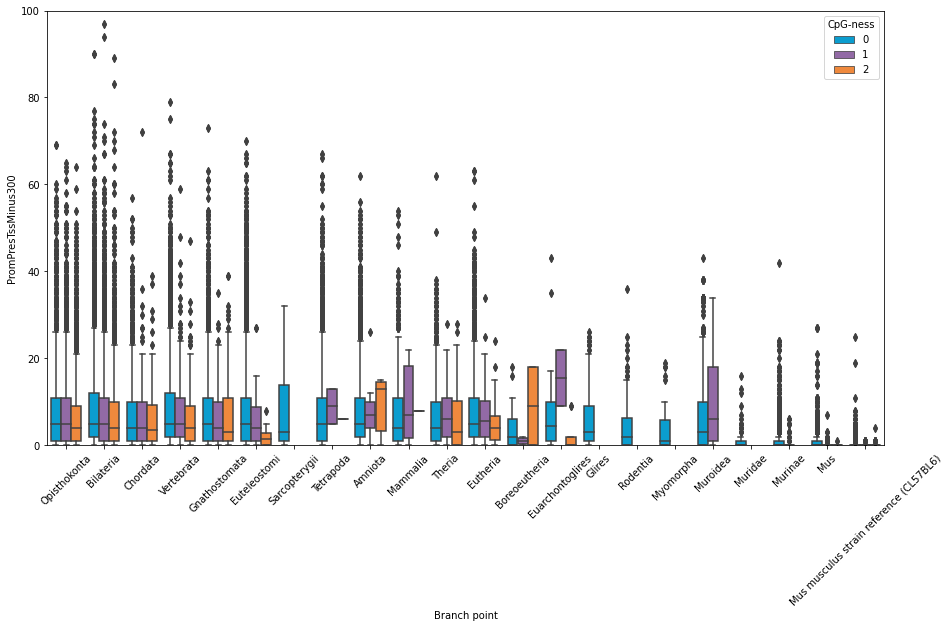

In [203]:
fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
ax.set_ylim(0, 100)
boxplot(ax=ax, x="Branch point", y="PromPresTssMinus300", hue="CpG-ness", data=paras[(paras["prom_clust"] == 0)], order=branch_order, saturation=1.0, palette=['#0B9DCF', '#926AA5', '#EF893D'])
fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
ax.set_ylim(0, 100)
boxplot(ax=ax, x="Branch point", y="PromPresTssMinus300", hue="CpG-ness", data=paras[(paras["prom_clust"] == 1)], order=branch_order, saturation=1.0, palette=['#0B9DCF', '#926AA5', '#EF893D'])


<AxesSubplot:xlabel='Branch point', ylabel='PromPresShift300'>

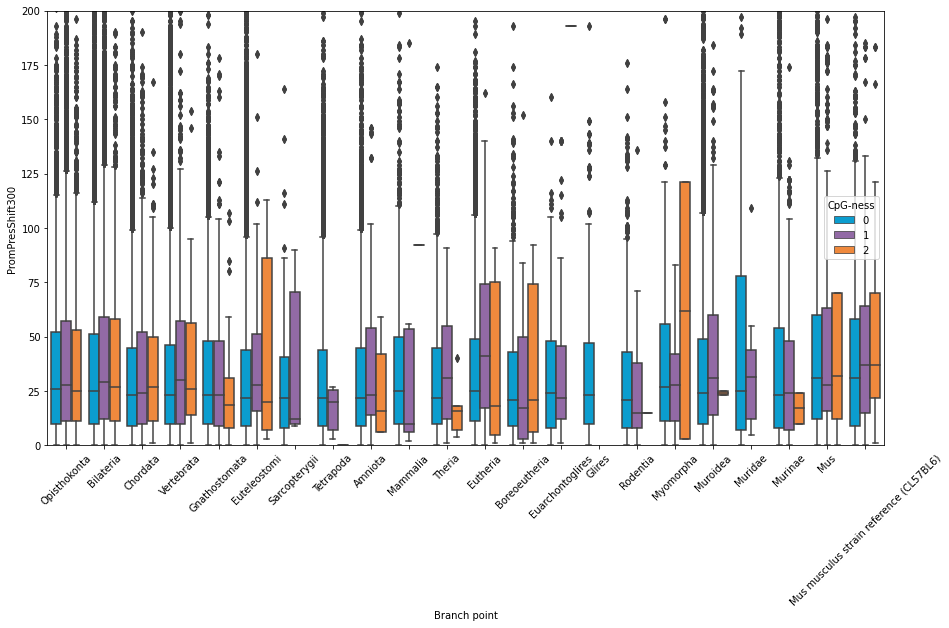

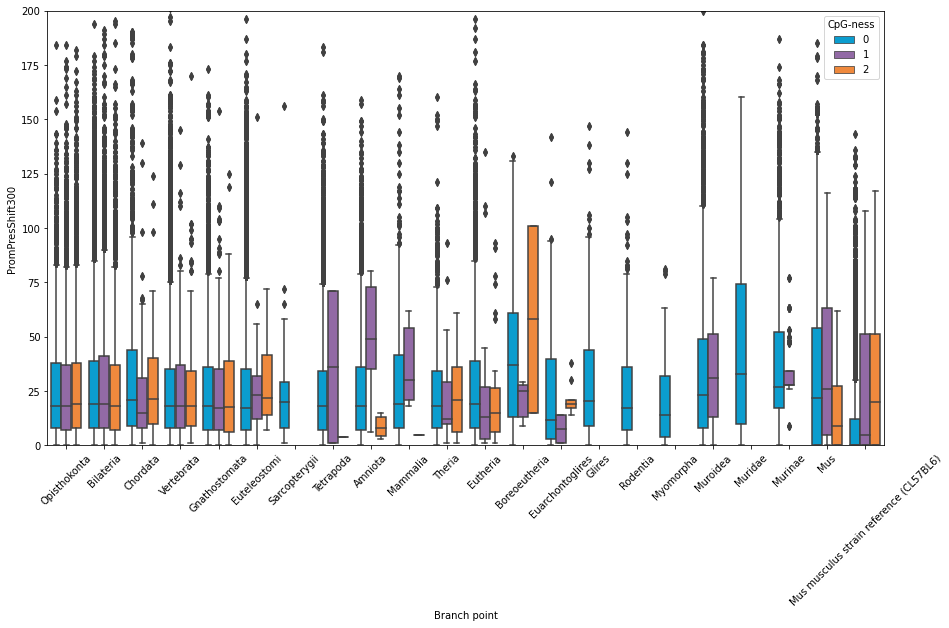

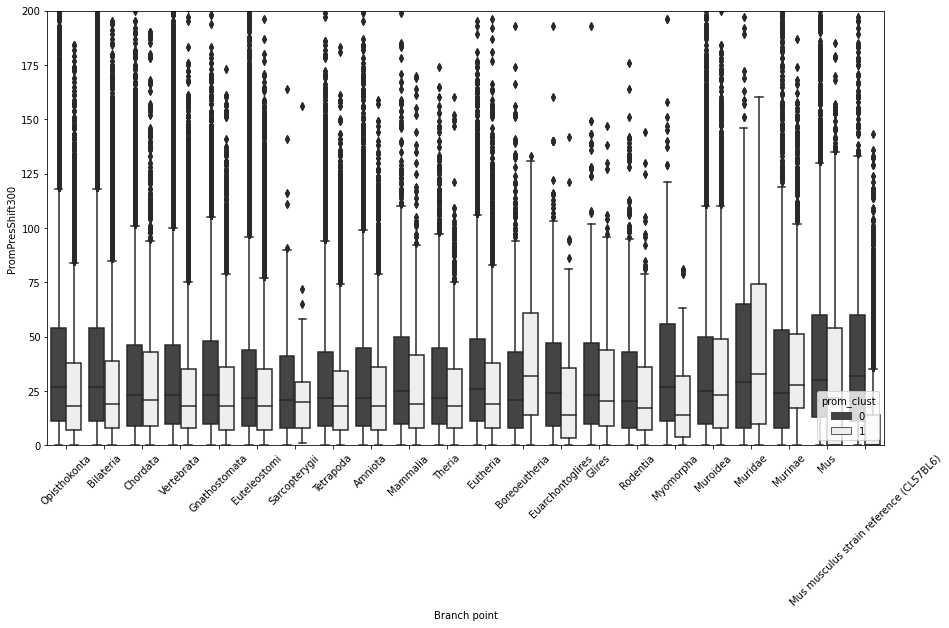

In [204]:
fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
ax.set_ylim(0, 200)
boxplot(ax=ax, x="Branch point", y="PromPresShift300", hue="CpG-ness", data=paras[(paras["prom_clust"] == 0)], order=branch_order, saturation=1.0, palette=['#0B9DCF', '#926AA5', '#EF893D'])
fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
ax.set_ylim(0, 200)
boxplot(ax=ax, x="Branch point", y="PromPresShift300", hue="CpG-ness", data=paras[(paras["prom_clust"] == 1)], order=branch_order, saturation=1.0, palette=['#0B9DCF', '#926AA5', '#EF893D'])
fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
ax.set_ylim(0, 200)
boxplot(ax=ax, x="Branch point", y="PromPresShift300", hue="prom_clust", data=paras, order=branch_order, palette=['#444444', '#eeeeee'], saturation=1.0)


In [410]:
import pickle
from pandas import read_csv
#paras = pickle.load(open('/data/db/import/save/human-export-para-class.pkl', 'rb'))
#paras = pickle.load(open('/data/db/import/save/paralogs-export-exocon.pkl', 'rb'))
paras = read_csv('/data/db/import/save/human-paralogs-exocon-utr.csv')

/tmp/ipykernel_144181/2609305958.py:5: DtypeWarning: Columns (21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,320) have mixed types. Specify dtype option on import or set low_memory=False.
  paras = read_csv('/data/db/import/save/human-paralogs-exocon-utr.csv')


In [395]:
#paras.groupby(['Branch point', 'CpG-ness']).count().unstack(level=-1)
#paras.groupby(['dSbin', 'CpG-ness']).count().unstack(level=-1)[[('Unnamed: 0', 0), ('Unnamed: 0', 1), ('Unnamed: 0', 2)]]
#paras.groupby(['Branch point']).count()[['CpG-ness']]
len(paras[paras['g1']<paras['g2']])
#paras.groupby(['dSbin']).count()[['CpG-ness']]

116225

In [411]:
from scipy.cluster.vq import kmeans
centroids = {}
for b in set(paras['Branch point']):
    centroids[b] = sorted(kmeans(paras[(paras["Branch point"]==b)]["PromPresScore300"], 2)[0])
paras = paras.assign(prom_clust = paras.apply(lambda r: 0 if abs(centroids[r["Branch point"]][0]-r["PromPresScore300"])<abs(centroids[r["Branch point"]][1]-r["PromPresScore300"]) else 1, axis=1))

In [412]:
fmembers = {}
for p in paras.iloc:
    if p['g1'] not in fmembers:
        fmembers[p['g1']] = set()
    if p['g2'] not in fmembers:
        fmembers[p['g2']] = set()
    fmembers[p['g1']].add(p['g2'])
    fmembers[p['g2']].add(p['g1'])
paras = paras.assign(family_size=[len(fmembers[p['g1']])+1 for p in paras.iloc])

In [413]:
rparas = set()
for l in open('hum-paras.csv', 'r'):
    x,y = l.strip().split(',')
    rparas.add((x,y))
    rparas.add((y,x))
paras = paras.assign(fam_restricted_set=[((s[0], s[1]) in rparas) for s in paras[['g1', 'g2']].iloc])

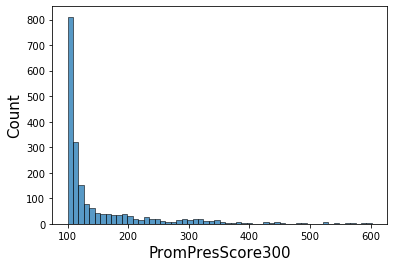

In [227]:
from seaborn import histplot
histplot(x="PromPresScore300", data=paras[(paras["Branch point"].isin(["Opisthokonta", "Bilateria", "Chordata", "Vertebrata", "Gnathostomata", "Euteleostomi", "Sarcopterygii", "Tetrapoda", "Amniota",
                                    "Mammalia"]))&(paras["PromPresScore300"] > 100)])

In [228]:
paras[(paras["Branch point"].isin(["Opisthokonta", "Bilateria", "Chordata", "Vertebrata", "Gnathostomata", "Euteleostomi", "Sarcopterygii", "Tetrapoda", "Amniota",
                                    "Mammalia"]))&(paras["PromPresScore300"] > 200)].to_csv('human-prom-ancient-outliers.csv')

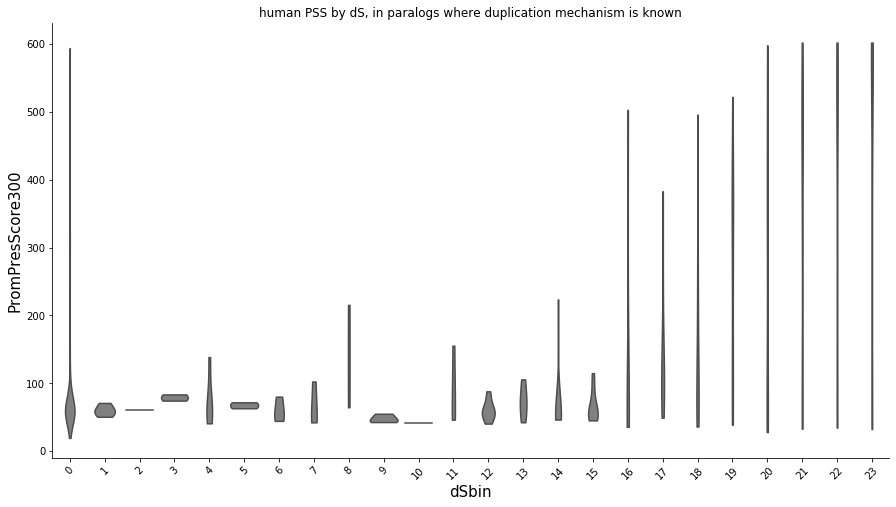

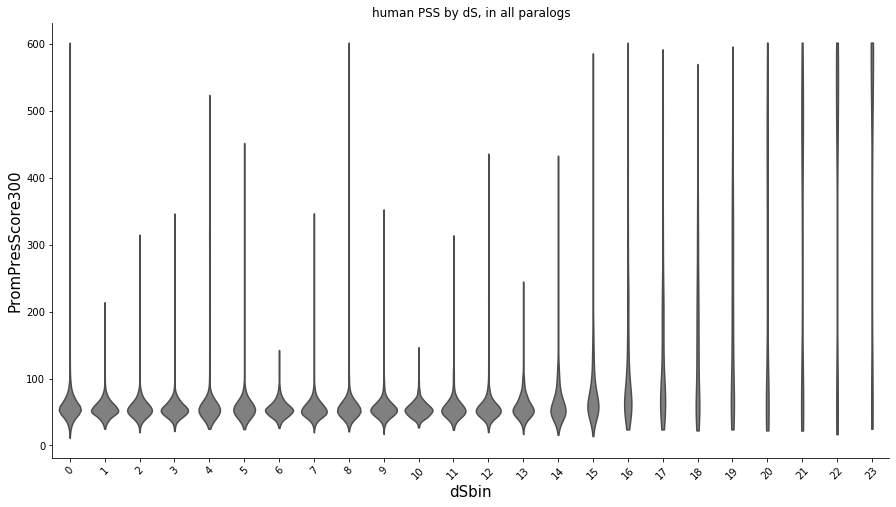

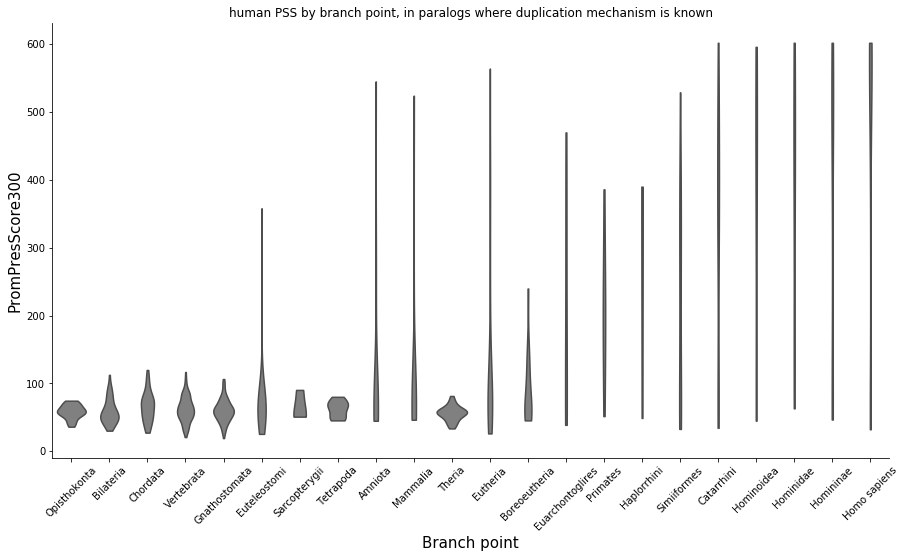

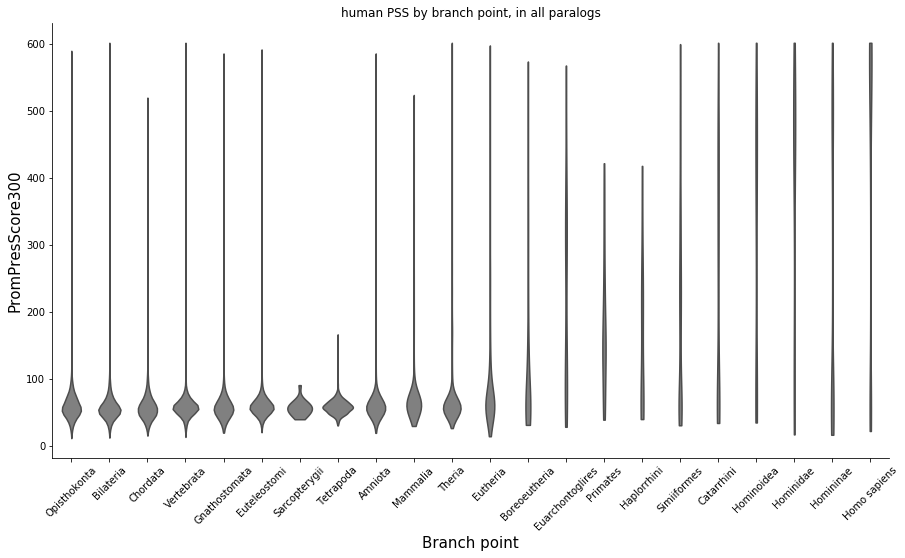

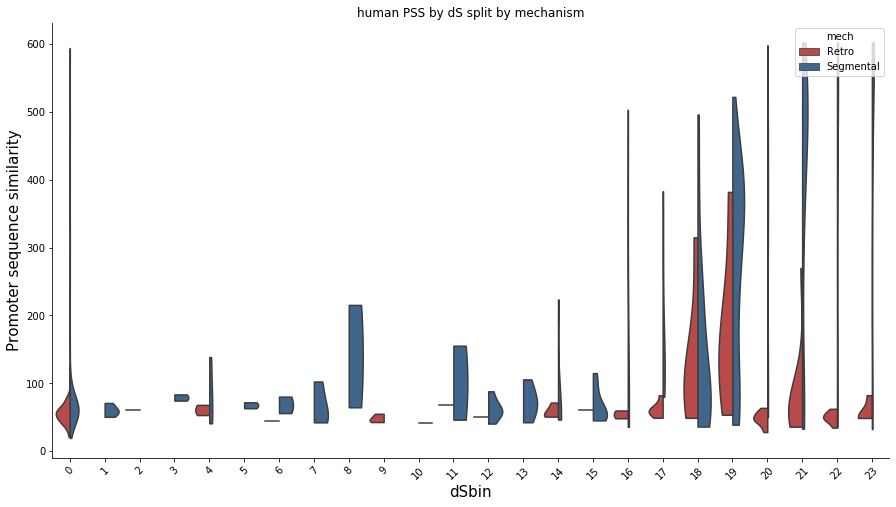

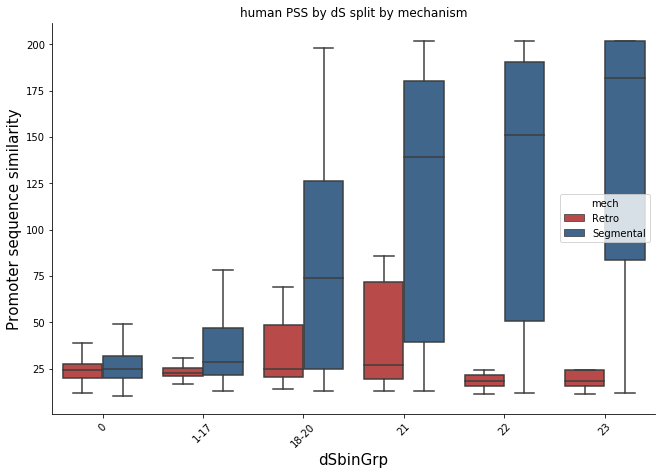

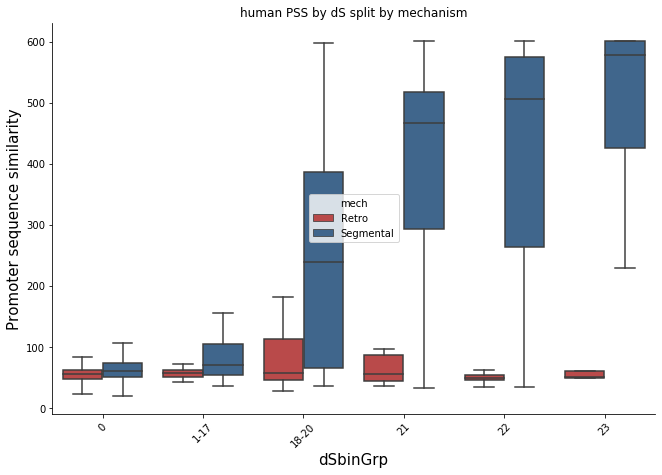

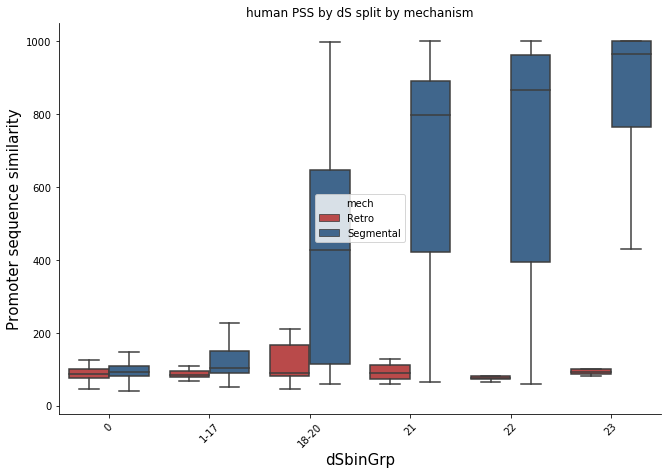

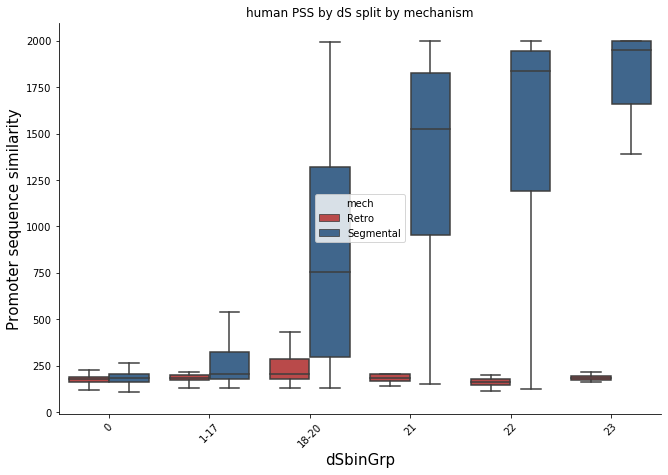

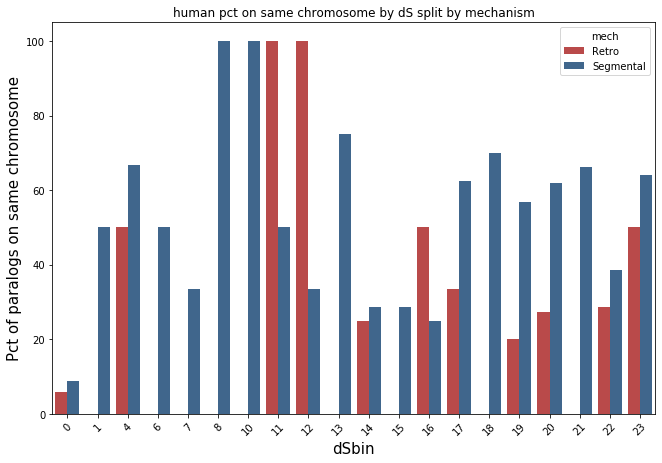

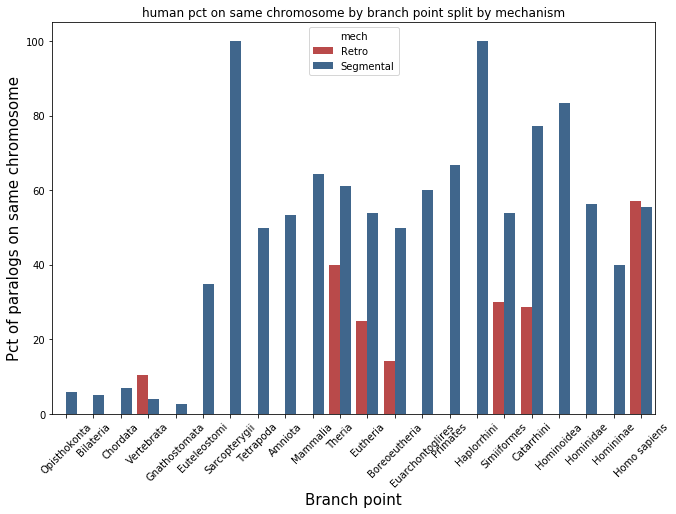

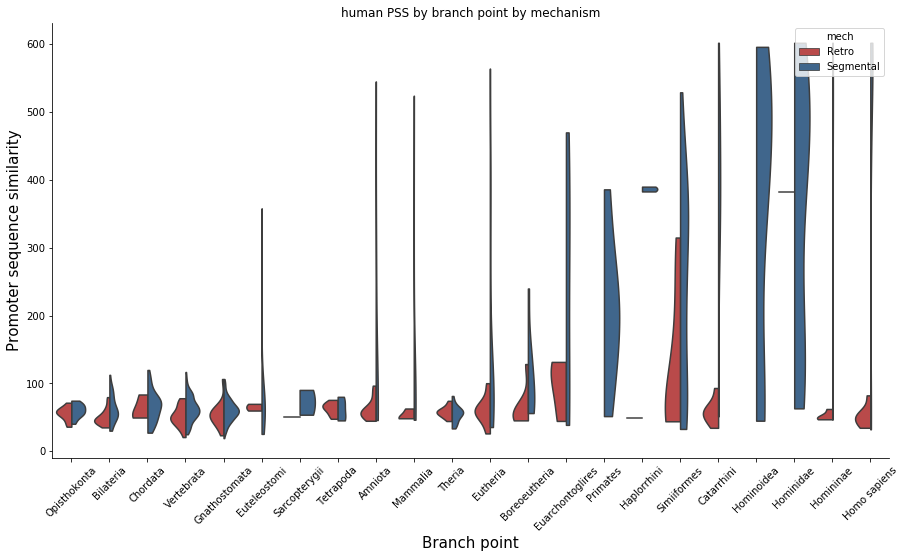

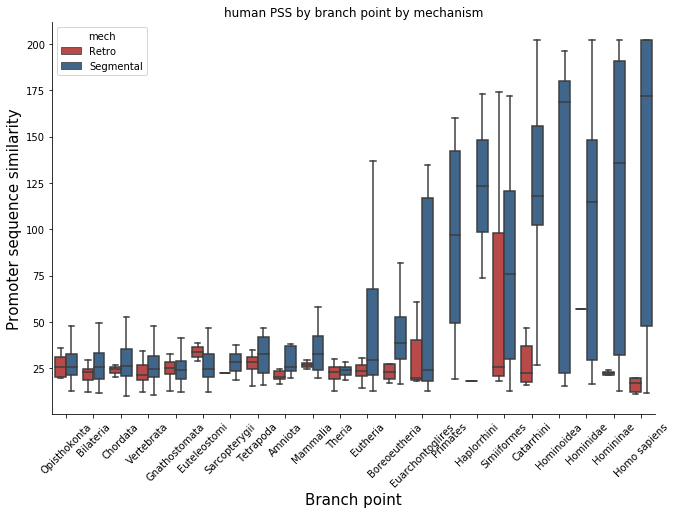

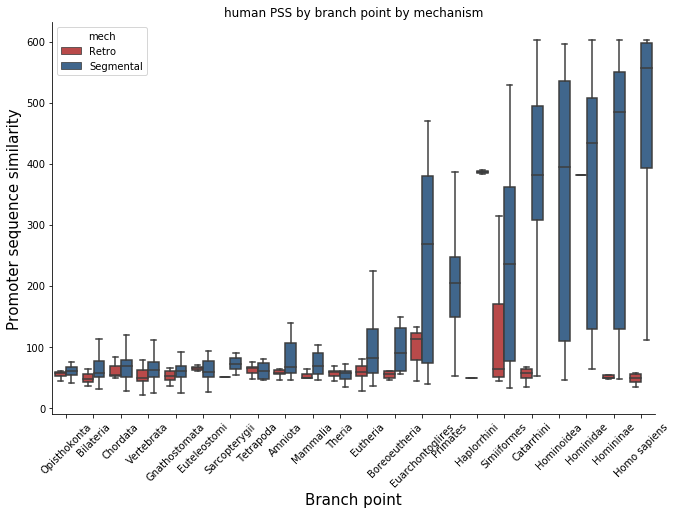

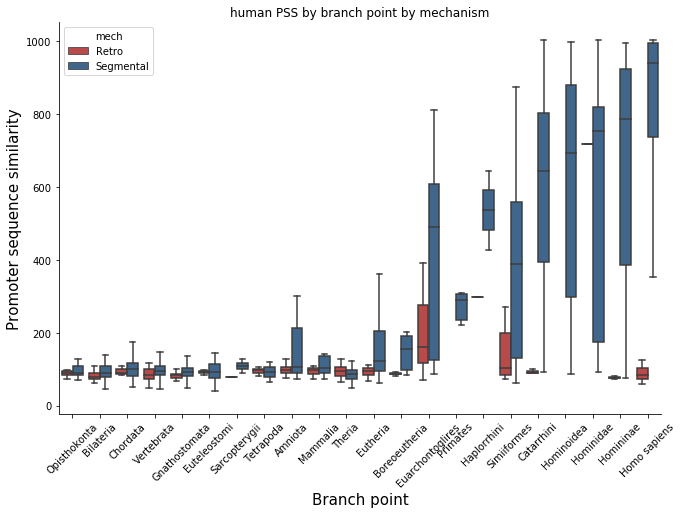

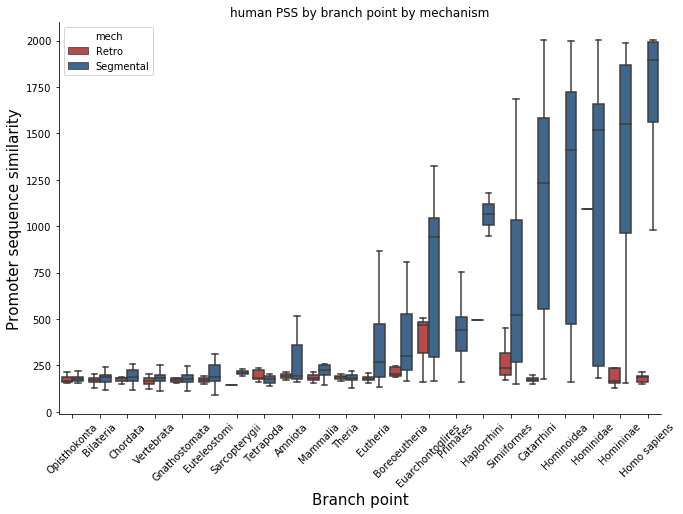

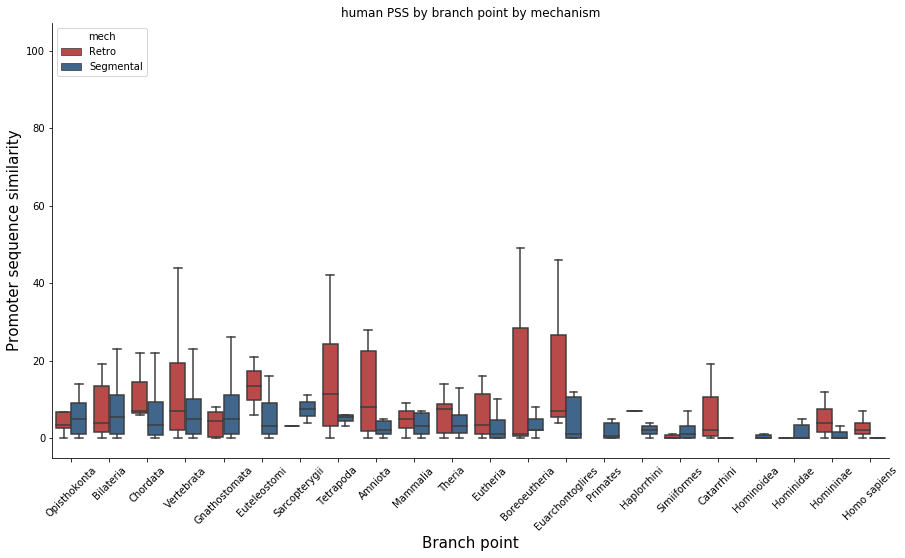

In [414]:
from matplotlib import pyplot
from plots import onesidedviolinplot
from seaborn import despine, violinplot, boxplot, barplot
import numpy as np

branch_order = ["Opisthokonta", "Bilateria", "Chordata", "Vertebrata", "Gnathostomata", "Euteleostomi", "Sarcopterygii", "Tetrapoda", "Amniota",
                "Mammalia", "Theria", "Eutheria", "Boreoeutheria", "Euarchontoglires", "Primates", "Haplorrhini", "Simiiformes", "Catarrhini",
                "Hominoidea", "Hominidae", "Homininae", "Homo sapiens"]
branch_hs_recent = ["Euarchontoglires", "Primates", "Haplorrhini", "Simiiformes", "Catarrhini",
                "Hominoidea", "Hominidae", "Homininae", "Homo sapiens"]
paramech = paras[((paras['retro'] != 0)|(paras['segmental'] == 1))&((paras['fam_restricted_set'])|(paras['family_size']<=2))] #&(paras['family_size']<=3)]
paramech = paramech.assign(mech = np.minimum(np.abs(paramech['retro'])*1 + paramech['segmental']*2, 2))
paramech = paramech.assign(dSbinGrp = paramech['dSbin'].transform(lambda x: {0: '0', 1: '1-17', 2: '1-17', 3: '1-17', 4: '1-17', 5: '1-17', 6: '1-17', 7: '1-17', 8: '1-17', 9: '1-17', 10: '1-17', 11: '1-17', 12: '1-17', 13: '1-17', 14: '1-17', 15: '1-17', 16: '1-17',
                                                                   17: '1-17', 18: '18-20', 19: '18-20', 20: '18-20', 21: '21', 22: '22', 23: '23'}[x]))

pyplot.rc('axes', labelsize=15)    # fontsize of the x and y labels

fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
violinplot(ax=ax, x="dSbin", y="PromPresScore300", cut=0, data=paramech, inner=None, palette=['grey'])
pyplot.title('human PSS by dS, in paralogs where duplication mechanism is known')
despine()
pyplot.savefig('prom-seq-similarity-human-dup-known-ds.pdf', dpi=600)

fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
violinplot(ax=ax, x="dSbin", y="PromPresScore300", cut=0, data=paras, inner=None, palette=['grey'])
pyplot.title('human PSS by dS, in all paralogs')
despine()
pyplot.savefig('prom-seq-similarity-human-all-paras-ds.pdf', dpi=600)

fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
violinplot(ax=ax, x="Branch point", y="PromPresScore300", cut=0, data=paramech, inner=None, order=branch_order, palette=['grey'])
pyplot.title('human PSS by branch point, in paralogs where duplication mechanism is known')
despine()
pyplot.savefig('prom-seq-similarity-human-dup-known-bp.pdf', dpi=600)

fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
violinplot(ax=ax, x="Branch point", y="PromPresScore300", cut=0, data=paras, inner=None, order=branch_order, palette=['grey'])
pyplot.title('human PSS by branch point, in all paralogs')
despine()
pyplot.savefig('prom-seq-similarity-human-all-paras-pb.pdf', dpi=600)

fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
g=violinplot(ax=ax, x="dSbin", y="PromPresScore300", hue='mech', cut=0, split=True, data=paramech, inner=None, palette={1: '#CB3838', 2: '#336699'})
g.legend_.texts[0].set_text('Retro')
g.legend_.texts[1].set_text('Segmental')
pyplot.ylabel('Promoter sequence similarity')
pyplot.title('human PSS by dS split by mechanism')
#pyplot.legend(['Retro', 'Segmental'], loc='upper left')
despine()
pyplot.savefig('prom-seq-similarity-human-dup-known-ds-mech.pdf', dpi=600)

for pre in [100, 300, 500, 1000]:
    fig, ax = pyplot.subplots(figsize=(10.8,7.2))
    pyplot.xticks(rotation=45)
    g=boxplot(ax=ax, x="dSbinGrp", y="PromPresScore%d"%pre, hue='mech', data=paramech, order = ['0','1-17','18-20','21','22','23'], palette={1: '#CB3838', 2: '#336699'}, fliersize=0.0)
    g.legend_.texts[0].set_text('Retro')
    g.legend_.texts[1].set_text('Segmental')
    pyplot.ylabel('Promoter sequence similarity')
    pyplot.title('human PSS by dS split by mechanism')
    #pyplot.legend(['Retro', 'Segmental'], loc='upper left')
    despine()
    pyplot.savefig('prom-seq-similarity-human-dup-known-ds-mech-box-pre%d.pdf'%pre, dpi=600)

fig, ax = pyplot.subplots(figsize=(10.8,7.2))
pyplot.xticks(rotation=45)
g=barplot(ax=ax, x="dSbin", y='pct', hue='mech', data=DataFrame((paramech[paramech['Distance']<300000000].groupby(['dSbin', 'mech']).size()/paramech.groupby(['dSbin', 'mech']).size()*100).dropna()).rename({0: 'pct'},axis=1).reset_index(), palette={1: '#CB3838', 2: '#336699'})
g.legend_.texts[0].set_text('Retro')
g.legend_.texts[1].set_text('Segmental')
pyplot.ylabel('Pct of paralogs on same chromosome')
pyplot.title('human pct on same chromosome by dS split by mechanism')
pyplot.savefig('same-chrom-human-dup-known-ds-mech-box.pdf', dpi=600)

fig, ax = pyplot.subplots(figsize=(10.8,7.2))
pyplot.xticks(rotation=45)
g=barplot(ax=ax, x="Branch point", y='pct', hue='mech', data=DataFrame((paramech[paramech['Distance']<300000000].groupby(['Branch point', 'mech']).size()/paramech.groupby(['Branch point', 'mech']).size()*100).dropna()).rename({0: 'pct'},axis=1).reset_index(), palette={1: '#CB3838', 2: '#336699'}, order=branch_order)
g.legend_.texts[0].set_text('Retro')
g.legend_.texts[1].set_text('Segmental')
pyplot.ylabel('Pct of paralogs on same chromosome')
pyplot.title('human pct on same chromosome by branch point split by mechanism')
pyplot.savefig('same-chrom-human-dup-known-bp-mech-box.pdf', dpi=600)


fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
g=violinplot(ax=ax, x="Branch point", y="PromPresScore300", hue='mech', cut=0, split=True, data=paramech, inner=None, order=branch_order, palette={1: '#CB3838', 2: '#336699'})
g.legend_.texts[0].set_text('Retro')
g.legend_.texts[1].set_text('Segmental')
pyplot.ylabel('Promoter sequence similarity')
pyplot.title('human PSS by branch point by mechanism')
#fig.get_axes()[0].legend(title= 'Mechanism',loc='upper left',labels=["Retro","Segmental"],edgecolor='red',facecolor='blue',ncol=2)
#pyplot.legend(['Retro', 'Segmental'], loc='upper left')
despine()
pyplot.savefig('prom-seq-similarity-human-dup-known-bp-mech.pdf', dpi=600)

for pre in [100, 300, 500, 1000]:
    fig, ax = pyplot.subplots(figsize=(10.8,7.2))
    pyplot.xticks(rotation=45)
    g=boxplot(ax=ax, x="Branch point", y="PromPresScore%d"%pre, hue='mech', data=paramech, order=branch_order, palette={1: '#CB3838', 2: '#336699'}, fliersize=0.0)
    g.legend_.texts[0].set_text('Retro')
    g.legend_.texts[1].set_text('Segmental')
    pyplot.ylabel('Promoter sequence similarity')
    pyplot.title('human PSS by branch point by mechanism')
    #fig.get_axes()[0].legend(title= 'Mechanism',loc='upper left',labels=["Retro","Segmental"],edgecolor='red',facecolor='blue',ncol=2)
    #pyplot.legend(['Retro', 'Segmental'], loc='upper left')
    despine()
    pyplot.savefig('prom-seq-similarity-human-dup-known-bp-mech-box-pre%d.pdf'%pre, dpi=600)

fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
g=boxplot(ax=ax, x="Branch point", y="PromPresTssMinus300", hue='mech', data=paramech, order=branch_order, palette={1: '#CB3838', 2: '#336699'}, fliersize=0.0)
g.legend_.texts[0].set_text('Retro')
g.legend_.texts[1].set_text('Segmental')
pyplot.ylabel('Promoter sequence similarity')
pyplot.title('human PSS by branch point by mechanism')
#fig.get_axes()[0].legend(title= 'Mechanism',loc='upper left',labels=["Retro","Segmental"],edgecolor='red',facecolor='blue',ncol=2)
#pyplot.legend(['Retro', 'Segmental'], loc='upper left')
despine()
pyplot.savefig('prom-seq-similarity-offset-human-dup-known-bp-mech-box.pdf', dpi=600)

In [401]:
#paramech.groupby(['Branch point', 'CpG-ness']).count().unstack(level=-1)[[('Unnamed: 0', 0), ('Unnamed: 0', 1), ('Unnamed: 0', 2)]]
#paramech.groupby(['dSbin', 'CpG-ness']).count().unstack(level=-1)[[('Unnamed: 0', 0), ('Unnamed: 0', 1), ('Unnamed: 0', 2)]]
#paramech[paramech['retro'] != 0].groupby(['CpG-ness']).count().unstack(level=-1)[[('Unnamed: 0', 0), ('Unnamed: 0', 1), ('Unnamed: 0', 2)]].reset_index()
#paramech.groupby(['mech']).count()[['Unnamed: 0']].reset_index()
#paras.groupby(['segmental', 'retro']).count().unstack(level=-1)
#paras.assign(mech = np.minimum(np.abs(paras['retro'])*1 + paras['segmental']*2, 2)).groupby(['Branch point','mech']).count().unstack(level=-1)[[('Unnamed: 0', 1), ('Unnamed: 0', 2)]]
paras.assign(mech = np.minimum(np.abs(paras['retro'])*1 + paras['segmental']*2, 2)).groupby(['dSbin','mech']).count().unstack(level=-1)[[('Unnamed: 0', 1), ('Unnamed: 0', 2)]]

Unnamed: 0      
mech           1     2
dSbin                 
0           5196  3955
1              6    58
2              7    45
3              7    46
4             13    54
5              5    46
6              8    49
7             14    56
8              5    62
9              4    58
10             2    61
11             6    73
12             5    67
13             5    87
14            15    74
15            22   129
16            11   150
17            11   188
18            15   160
19            27   138
20            23   152
21            15   159
22             8   236
23             7   238

In [258]:
(paramech[(paramech["Branch point"].isin(["Opisthokonta", "Bilateria", "Chordata", "Vertebrata", "Gnathostomata", "Euteleostomi", "Sarcopterygii", "Tetrapoda", "Amniota",
                                    "Mammalia"])&(paramech['mut-pct']>0))]).to_csv('human-outliers-tf-ancient.csv')

paramech[((paramech["mech"]==1)&(paramech['mut-pct']>0))].to_csv('human-outliers-tf-retro.csv')

paramech[(paramech["Branch point"].isin(["Euarchontoglires", "Primates", "Haplorrhini", "Simiiformes", "Catarrhini", "Hominoidea", "Hominidae", "Homininae", "Homo sapiens"])
         &(paramech["mech"]==2)&(paramech["mut-pct"]>95))].to_csv('human-outliers-tf-recent-segmental.csv')

In [276]:
#for x in sorted(paramech['dSbin'].unique()):
#    print("Mann-Whitney test on dSbin %d segmental vs. retro (human), FDR controlled: %s"%(x, mannwhitneyu(paramech[(paramech['dSbin'] == x)&(paramech['mech'] == 2)]['PromPresScore300'], paramech[(paramech['dSbin'] == x)&(paramech['mech'] == 1)]['PromPresScore300'], alternative='greater').pvalue*len(paramech['dSbin'].unique())))
#for x in branch_order:
#    if len(paramech[(paramech['Branch point'] == x)&(paramech['mech'] == 2)]) > 0 and len(paramech[(paramech['Branch point'] == x)&(paramech['mech'] == 1)]) > 0:
#        print("Mann-Whitney test on Branch point %s segmental vs. retro (human), FDR controlled: %s"%(x, mannwhitneyu(paramech[(paramech['Branch point'] == x)&(paramech['mech'] == 2)]['PromPresScore300'], paramech[(paramech['Branch point'] == x)&(paramech['mech'] == 1)]['PromPresScore300'], alternative='greater').pvalue*len(branch_order)))
#    else:
#        print("Not enough paralogs in %s"%x)
    
from scipy.stats import mannwhitneyu
dsSkip = set()
branchSkip = set()
for pre in [100, 300, 500, 1000]:
    for x in sorted(paramech['dSbinGrp'].unique()):
        if sum((paramech['dSbinGrp'] == x)&(paramech['mech'] == 2))>0 and sum((paramech['dSbinGrp'] == x)&(paramech['mech'] == 1))>0:
            print('Group sizes: %d, %d'%(sum((paramech['dSbinGrp'] == x)&(paramech['mech'] == 2)), sum((paramech['dSbinGrp'] == x)&(paramech['mech'] == 1))))
            print("Mann-Whitney (%d-pre) test on dSbin %s segmental vs. retro (human), FDR controlled: %s"%(pre, x, mannwhitneyu(paramech[(paramech['dSbinGrp'] == x)&(paramech['mech'] == 2)]['PromPresScore%d'%pre], paramech[(paramech['dSbinGrp'] == x)&(paramech['mech'] == 1)]['PromPresScore%d'%pre], alternative='greater').pvalue*len(paramech['dSbinGrp'].unique())))
    for x in branch_order:
        if sum((paramech['Branch point'] == x)&(paramech['mech'] == 2))>0 and sum((paramech['Branch point'] == x)&(paramech['mech'] == 1))>0:
            print('Group sizes: %d, %d'%(sum((paramech['Branch point'] == x)&(paramech['mech'] == 2)), sum((paramech['Branch point'] == x)&(paramech['mech'] == 1))))
            print("Mann-Whitney (%d-pre) test on Branch point %s segmental vs. retro (human), FDR controlled: %s"%(pre, x, mannwhitneyu(paramech[(paramech['Branch point'] == x)&(paramech['mech'] == 2)]['PromPresScore%d'%pre], paramech[(paramech['Branch point'] == x)&(paramech['mech'] == 1)]['PromPresScore%d'%pre], alternative='greater').pvalue*len(branch_order)))
        

Group sizes: 565, 86
Mann-Whitney (100-pre) test on dSbin 0 segmental vs. retro (human), FDR controlled: 0.17306485508620803
Group sizes: 69, 23
Mann-Whitney (100-pre) test on dSbin 1-17 segmental vs. retro (human), FDR controlled: 0.007126198185655502
Group sizes: 107, 21
Mann-Whitney (100-pre) test on dSbin 18-20 segmental vs. retro (human), FDR controlled: 0.024542990670228172
Group sizes: 74, 10
Mann-Whitney (100-pre) test on dSbin 21 segmental vs. retro (human), FDR controlled: 0.007455316070156998
Group sizes: 88, 7
Mann-Whitney (100-pre) test on dSbin 22 segmental vs. retro (human), FDR controlled: 0.0004459634743678523
Group sizes: 128, 4
Mann-Whitney (100-pre) test on dSbin 23 segmental vs. retro (human), FDR controlled: 0.015267751998762149
Group sizes: 17, 8
Mann-Whitney (100-pre) test on Branch point Opisthokonta segmental vs. retro (human), FDR controlled: 10.74990083905416
Group sizes: 40, 19
Mann-Whitney (100-pre) test on Branch point Bilateria segmental vs. retro (human

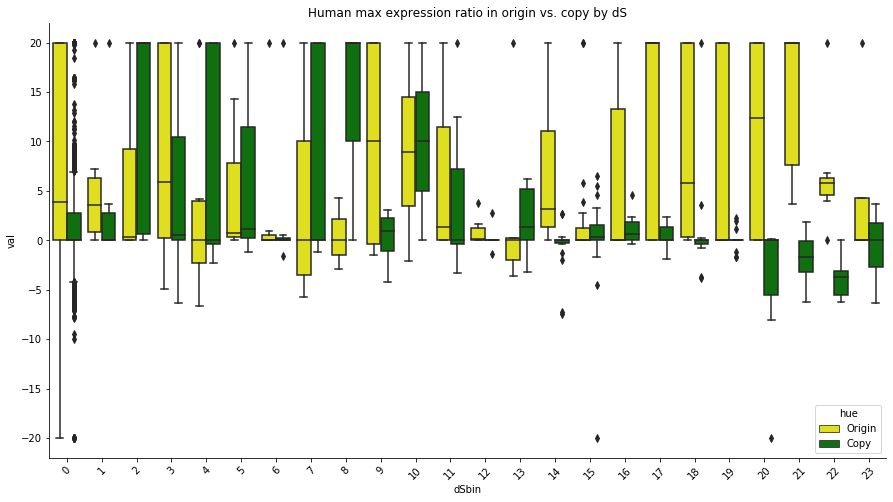

In [57]:
from pandas import concat
exprret=paramech[paramech['retro'] != 0].assign(origin=lambda x: x['mx']*(x['retro'] < 0 )+x['mn']*(x['retro'] > 0), 
copy=lambda x: x['mn']*(x['retro'] < 0 )+x['mx']*(x['retro'] > 0))
exprret=concat([exprret.assign(hue=0, val=exprret['origin']), exprret.assign(hue=1, val=exprret['copy'])])
fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
g=boxplot(ax=ax, x="dSbin", y="val", hue='hue', data=exprret, palette={0: 'yellow', 1: 'green'})
g.legend_.texts[0].set_text('Origin')
g.legend_.texts[1].set_text('Copy')
pyplot.title('Human max expression ratio in origin vs. copy by dS')
despine()
pyplot.savefig('tot-expr-human-dup-known-ds-retro-box.pdf', dpi=600)


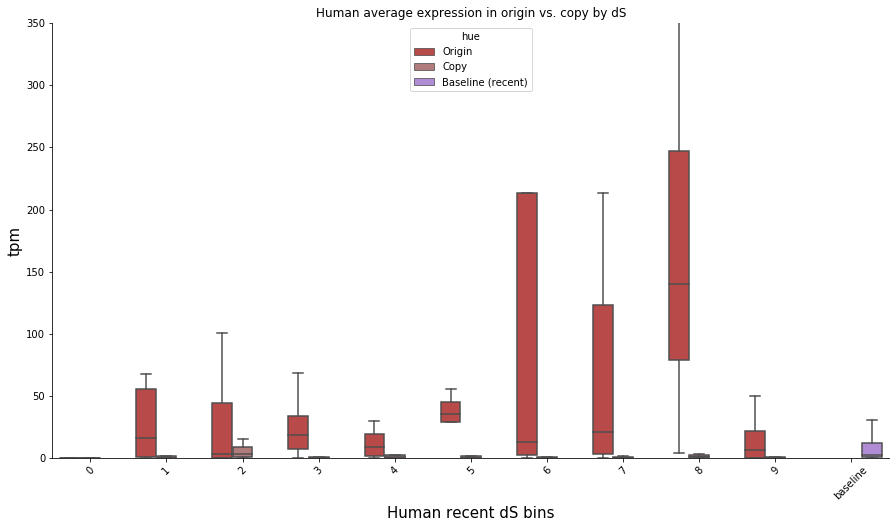

In [450]:
genexpr = pickle.load(open('/data/db/import/save/paralogs-genexpr.pkl', 'rb'))
tissues=list(set(genexpr.columns).difference(['cpgness', 'cpgfull', 'Cells_EBV-transformed_lymphocytes', 'Cells_Cultured_fibroblasts']))

tpm = pd.concat([paramech[paramech['retro'] != 0].assign(tpm=lambda x : [genexpr.loc[g1 if retro < 0 else g2][tissues].mean() if (g1 if retro < 0 else g2) in genexpr.index and len(genexpr.loc[g1 if retro < 0 else g2][tissues])>2 and max(genexpr.loc[g1 if retro < 0 else g2][tissues]) > 0.5 else None for g1,g2,retro in x[['g1', 'g2', 'retro']].iloc], hue=0),
                 paramech[paramech['retro'] != 0].assign(tpm=lambda x : [genexpr.loc[g2 if retro < 0 else g1][tissues].mean() if (g2 if retro < 0 else g1) in genexpr.index and len(genexpr.loc[g2 if retro < 0 else g1][tissues])>2 and max(genexpr.loc[g2 if retro < 0 else g1][tissues]) > 0.5 else None for g1,g2,retro in x[['g1', 'g2', 'retro']].iloc], hue=1)])

fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
g=boxplot(ax=ax, x="dSbin", y="tpm", hue='hue', data=
          pd.concat([partition_bins(tpm[(tpm['dS']<0.9571) & (~tpm['dS'].isna())], -tpm[(tpm['dS']<0.9571) & (~tpm['dS'].isna())]['dS'], 10, 'dSbin'),
                     genexpr.loc[genexpr.index.intersection(set([*paramech[paramech['dS']<0.9571]['g1'].values,*paramech[paramech['dS']<0.9571]['g2'].values]))].assign(hue=2).assign(dSbin='baseline')
                     .assign(tpm=lambda x : [genexpr.loc[g][tissues].mean() if len(genexpr.loc[g][tissues])>2 and max(genexpr.loc[g][tissues]) > 0.5 else None for g in x.index])
                    ]),
                     order=[*[x for x in range(10)], 'baseline'], palette={0: '#CB3838', 1: '#BA7373', 2:'#b080e0'}, fliersize=0.0)
ax.set_ylim([0,350])
g.legend_.texts[0].set_text('Origin')
g.legend_.texts[1].set_text('Copy')
g.legend_.texts[2].set_text('Baseline (recent)')
pyplot.xlabel('Human recent dS bins')
pyplot.title('Human average expression in origin vs. copy by dS')
despine()
pyplot.savefig('tot-expr-human-dup-known-ds-retro-box-avg-tpm.pdf', dpi=600)




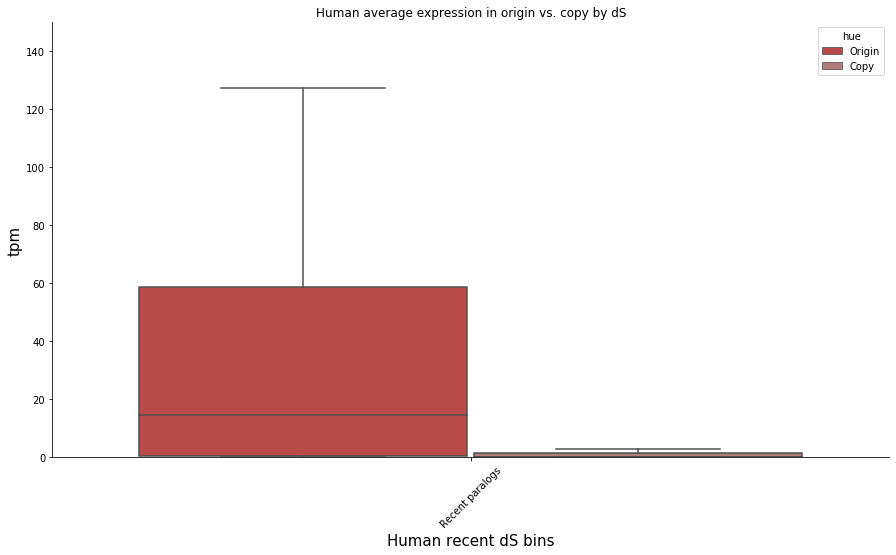

In [451]:
fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
g=boxplot(ax=ax, x="recent", y="tpm", hue='hue', data=
          pd.concat([partition_bins(tpm[(tpm['dS']<0.9571) & (~tpm['dS'].isna())], -tpm[(tpm['dS']<0.9571) & (~tpm['dS'].isna())]['dS'], 10, 'dSbin'),
                     #genexpr.loc[genexpr.index.intersection(set([*paramech[paramech['dS']<0.9571]['g1'].values,*paramech[paramech['dS']<0.9571]['g2'].values]))].assign(hue=2).assign(dSbin='baseline')
                     #.assign(tpm=lambda x : [genexpr.loc[g][tissues].mean() if len(genexpr.loc[g][tissues])>2 and max(genexpr.loc[g][tissues]) > 0.5 else None for g in x.index])
                    ]).assign(recent='Recent paralogs'),
                     palette={0: '#CB3838', 1: '#BA7373', 2:'#b080e0'}, fliersize=0.0)
ax.set_ylim([0,150])
g.legend_.texts[0].set_text('Origin')
g.legend_.texts[1].set_text('Copy')
#g.legend_.texts[2].set_text('Baseline (recent)')
pyplot.xlabel('Human recent dS bins')
pyplot.title('Human average expression in origin vs. copy by dS')
despine()
pyplot.savefig('tot-expr-human-dup-retro-box-avg-tpm.pdf', dpi=600)


In [426]:
tpm_hs_recent=partition_bins(tpm[(tpm['dS']<0.9571) & (~tpm['dS'].isna())], -tpm[(tpm['dS']<0.9571) & (~tpm['dS'].isna())]['dS'], 10, 'dSbin')
for x in sorted(tpm_hs_recent['dSbin'].unique()):
    print("Mann-Whitney test on TPM dSbin %d original vs. copy, FDR controlled: %s"%(x, mannwhitneyu(tpm_hs_recent[(tpm_hs_recent['dSbin'] == x)&(tpm_hs_recent['hue']==0)&(~tpm_hs_recent['tpm'].isna())]['tpm'], tpm_hs_recent[(tpm_hs_recent['dSbin'] == x)&(tpm_hs_recent['hue']==1)&(~tpm_hs_recent['tpm'].isna())]['tpm'], alternative='greater').pvalue*len(tpm_hs_recent['dSbin'].unique())))
print("Mann-Whitney test on TPM all recent original vs. copy: %s"%(mannwhitneyu(tpm_hs_recent[(tpm_hs_recent['hue']==0)&(~tpm_hs_recent['tpm'].isna())]['tpm'], tpm_hs_recent[(tpm_hs_recent['hue']==1)&(~tpm_hs_recent['tpm'].isna())]['tpm'], alternative='greater').pvalue))
print("Mann-Whitney test on TPM all recent original vs. all recent: %s"%(mannwhitneyu(tpm_hs_recent[(tpm_hs_recent['hue']==0)&(~tpm_hs_recent['tpm'].isna())]['tpm'], genexpr.loc[genexpr.index.intersection(set([*paramech[paramech['dS']<0.9571]['g1'].values,*paramech[paramech['dS']<0.9571]['g2'].values]))].assign(tpm=lambda x : [genexpr.loc[g][tissues].mean() if len(genexpr.loc[g][tissues])>2 and max(genexpr.loc[g][tissues]) > 0.5 else None for g in x.index])['tpm'].dropna(), alternative='greater').pvalue))
print("Mann-Whitney test on TPM all recent copy vs. all recent: %s"%(mannwhitneyu(tpm_hs_recent[(tpm_hs_recent['hue']==1)&(~tpm_hs_recent['tpm'].isna())]['tpm'], genexpr.loc[genexpr.index.intersection(set([*paramech[paramech['dS']<0.9571]['g1'].values,*paramech[paramech['dS']<0.9571]['g2'].values]))].assign(tpm=lambda x : [genexpr.loc[g][tissues].mean() if len(genexpr.loc[g][tissues])>2 and max(genexpr.loc[g][tissues]) > 0.5 else None for g in x.index])['tpm'].dropna(), alternative='less').pvalue))

Mann-Whitney test on TPM dSbin 0 original vs. copy, FDR controlled: 9.3476115686606
Mann-Whitney test on TPM dSbin 1 original vs. copy, FDR controlled: 0.5532070821838201
Mann-Whitney test on TPM dSbin 2 original vs. copy, FDR controlled: 2.6570784922566357
Mann-Whitney test on TPM dSbin 3 original vs. copy, FDR controlled: 0.004116365183647642
Mann-Whitney test on TPM dSbin 4 original vs. copy, FDR controlled: 0.36713286713286714
Mann-Whitney test on TPM dSbin 5 original vs. copy, FDR controlled: 0.41125541125541126
Mann-Whitney test on TPM dSbin 6 original vs. copy, FDR controlled: 0.16552909163839352
Mann-Whitney test on TPM dSbin 7 original vs. copy, FDR controlled: 0.029983951514860604
Mann-Whitney test on TPM dSbin 8 original vs. copy, FDR controlled: 0.00029917958965229314
Mann-Whitney test on TPM dSbin 9 original vs. copy, FDR controlled: 0.9615714636568423
Mann-Whitney test on TPM all recent original vs. copy: 3.756588242059489e-10
Mann-Whitney test on TPM all recent original 

In [365]:
#genexpr.assign(hue=2).assign(dSbin='baseline').assign(tpm=lambda x : [genexpr.loc[g][tissues].mean() if len(genexpr.loc[g][tissues])>2 and max(genexpr.loc[g][tissues]) > 0.5 else None for g in x.index])
#genexpr.index
tpm_hs_recent[(tpm_hs_recent['dSbin'] == x)&(tpm_hs_recent['hue']==0)]['tpm']                   

115180    50.300437
116193     0.350625
116195     0.350625
117928     6.349544
118343    28.464274
118904     0.066737
119027          NaN
119028          NaN
119080          NaN
119081          NaN
119084          NaN
119085          NaN
119209    15.050274
Name: tpm, dtype: float64

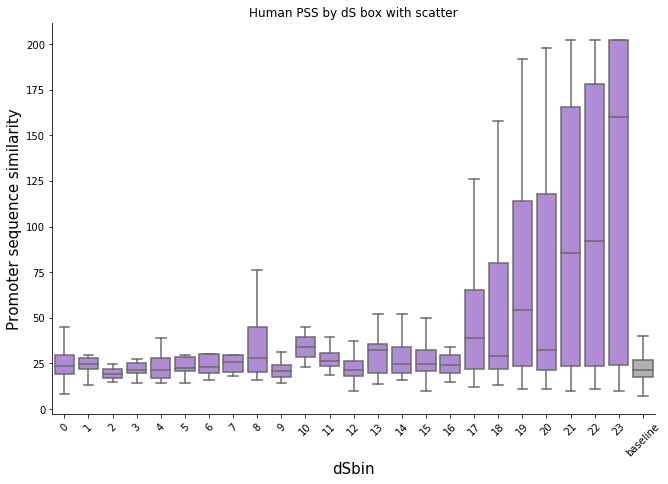

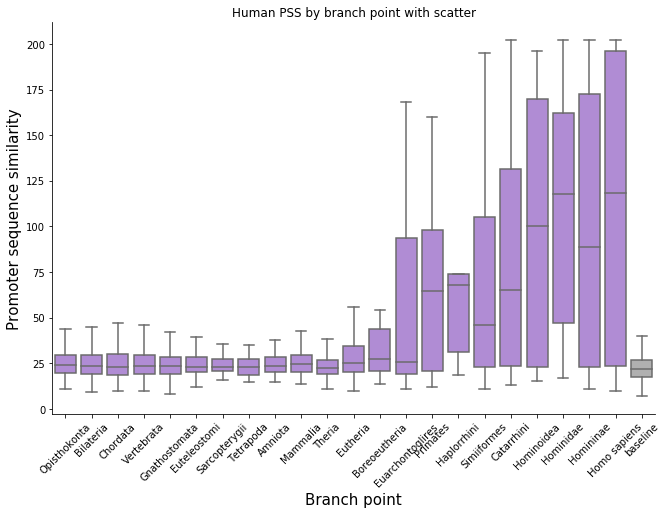

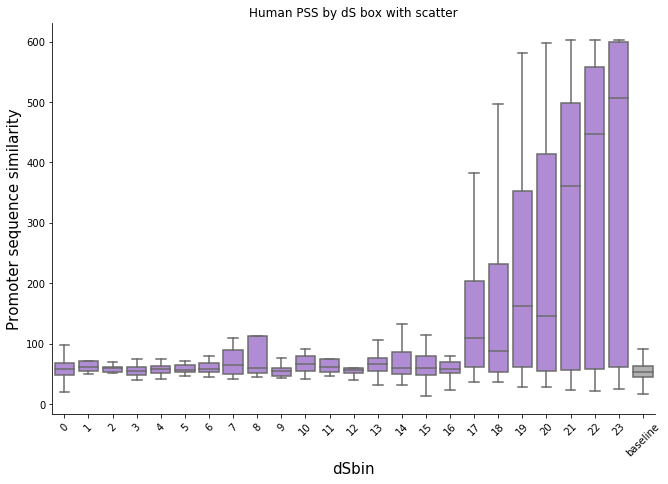

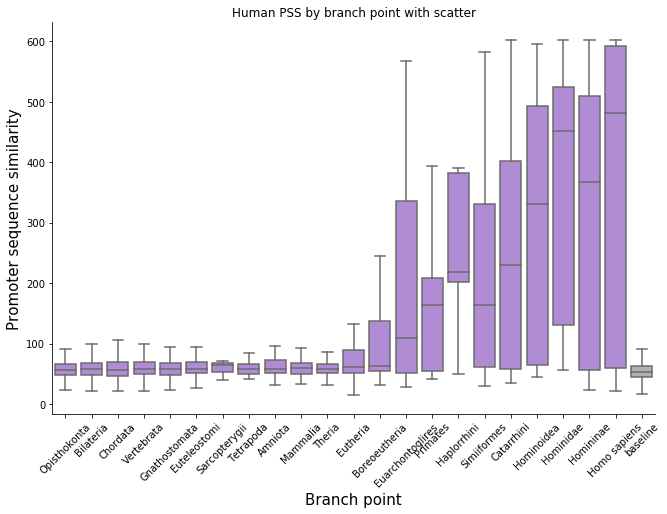

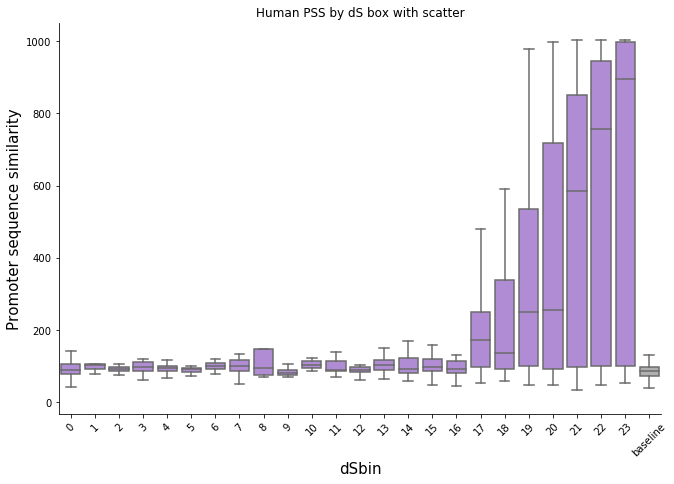

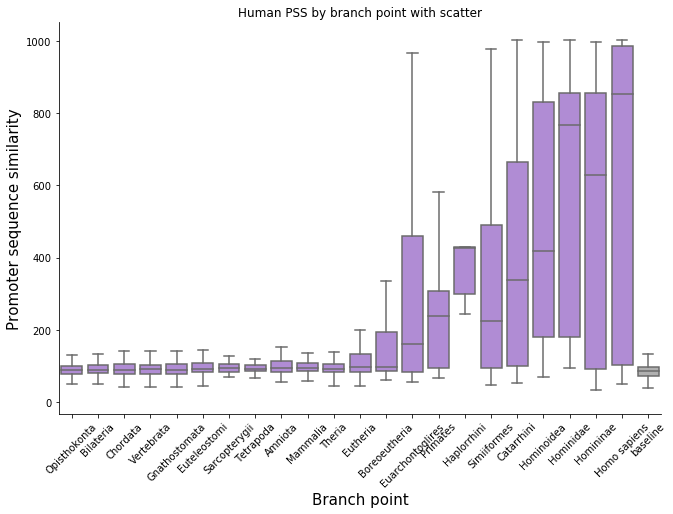

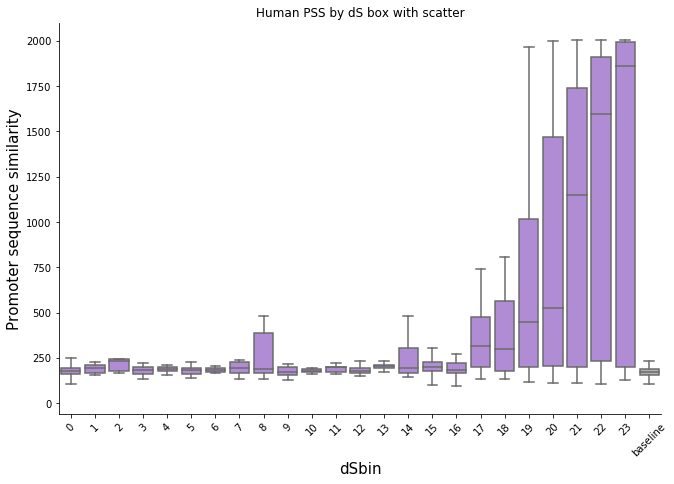

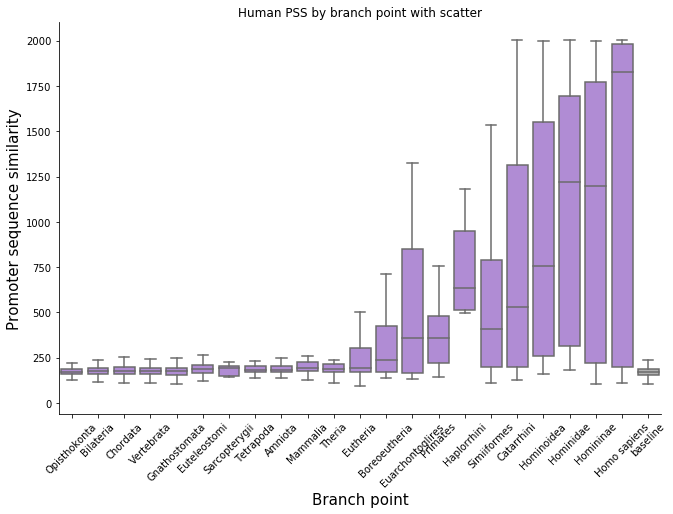

In [415]:
from seaborn import boxplot
import pandas as pd

for pre in [100, 300, 500, 1000]:
    fig, ax = pyplot.subplots(figsize=(10.8,7.2))
    pyplot.xticks(rotation=45)
    hs_baseline = pd.DataFrame.from_records([r[2:] for r in pickle.load(open('/data/db/import/save/human-promoter-baseline-sim-%d.pkl'%pre, 'rb'))], columns=["PromPresScore%d"%pre, "PromPresTssMinus%d"%pre, "PromPresShift%d"%pre])
    g=boxplot(ax=ax, x="dSbin", y="PromPresScore%d"%pre, data=pd.concat([paras[((paras['fam_restricted_set'])|(paras['family_size']<=2))].assign(typ=0), hs_baseline.assign(dSbin='baseline').assign(typ=1)]), palette={'#b0b0b0', '#b080e0'}, hue='typ', order=[*sorted(paras['dSbin'].unique()), 'baseline'], fliersize=0.0, dodge=False)
    ax.legend([],[], frameon=False)
    pyplot.ylabel('Promoter sequence similarity')
    pyplot.title('Human PSS by dS box with scatter')
    #pyplot.legend(['Retro', 'Segmental'], loc='upper left')
    despine()
    pyplot.savefig('prom-seq-similarity-human-scatter-dup-all-ds-%d.pdf'%pre, dpi=600)
    
    fig, ax = pyplot.subplots(figsize=(10.8,7.2))
    pyplot.xticks(rotation=45)
    g=boxplot(ax=ax, x="Branch point", y="PromPresScore%d"%pre, data=pd.concat([paras[((paras['fam_restricted_set'])|(paras['family_size']<=2))].assign(typ=0), hs_baseline.assign(**{'Branch point':'baseline'}).assign(typ=1)]), palette={'#b0b0b0', '#b080e0'}, hue='typ', order=[*branch_order, 'baseline'], fliersize=0.0, dodge=False)
    ax.legend([],[], frameon=False)
    pyplot.ylabel('Promoter sequence similarity')
    pyplot.title('Human PSS by branch point with scatter')
    #fig.get_axes()[0].legend(title= 'Mechanism',loc='upper left',labels=["Retro","Segmental"],edgecolor='red',facecolor='blue',ncol=2)
    #pyplot.legend(['Retro', 'Segmental'], loc='upper left')
    despine()
    pyplot.savefig('prom-seq-similarity-human-scatter-dup-all-bp-%d.pdf'%pre, dpi=600)

In [416]:
for pre in [100, 300, 500, 1000]:
    hs_baseline = pd.DataFrame.from_records([r[2:] for r in pickle.load(open('/data/db/import/save/human-promoter-baseline-sim-%d.pkl'%pre, 'rb'))], columns=["PromPresScore%d"%pre, "PromPresTssMinus%d"%pre, "PromPresShift%d"%pre])
    for x in sorted(paras['dSbin'].unique()):
        print("Mann-Whitney (pre-%d) test on dSbin %d vs. baseline, FDR controlled: %s"%(pre, x, mannwhitneyu(paras[((paras['fam_restricted_set'])|(paras['family_size']<=2))&(paras['dSbin'] == x)]['PromPresScore%d'%pre], hs_baseline['PromPresScore%d'%pre], alternative='greater').pvalue*len(paras['dSbin'].unique())))
    for x in branch_order:
        print("Mann-Whitney (pre-%d) test on Branch point %s vs. baseline, FDR controlled: %s"%(pre, x, mannwhitneyu(paras[((paras['fam_restricted_set'])|(paras['family_size']<=2))&(paras['Branch point'] == x)]['PromPresScore%d'%pre], hs_baseline['PromPresScore%d'%pre], alternative='greater').pvalue*len(branch_order)))
    

Mann-Whitney (pre-100) test on dSbin 0 vs. baseline, FDR controlled: 1.2158642731165062e-40
Mann-Whitney (pre-100) test on dSbin 1 vs. baseline, FDR controlled: 1.4610615697220815
Mann-Whitney (pre-100) test on dSbin 2 vs. baseline, FDR controlled: 20.909916658529784
Mann-Whitney (pre-100) test on dSbin 3 vs. baseline, FDR controlled: 12.96827936302983
Mann-Whitney (pre-100) test on dSbin 4 vs. baseline, FDR controlled: 7.362737998841954
Mann-Whitney (pre-100) test on dSbin 5 vs. baseline, FDR controlled: 3.692109135927948
Mann-Whitney (pre-100) test on dSbin 6 vs. baseline, FDR controlled: 4.929636893161893
Mann-Whitney (pre-100) test on dSbin 7 vs. baseline, FDR controlled: 0.864682180066329
Mann-Whitney (pre-100) test on dSbin 8 vs. baseline, FDR controlled: 1.570291661873612
Mann-Whitney (pre-100) test on dSbin 9 vs. baseline, FDR controlled: 13.501454254124663
Mann-Whitney (pre-100) test on dSbin 10 vs. baseline, FDR controlled: 1.8557258691389404
Mann-Whitney (pre-100) test on dS

In [425]:
len(set(paras[((paras['fam_restricted_set'])|(paras['family_size']<=2))]['g1']).union(paras[((paras['fam_restricted_set'])|(paras['family_size']<=2))]['g2']))
    

6473

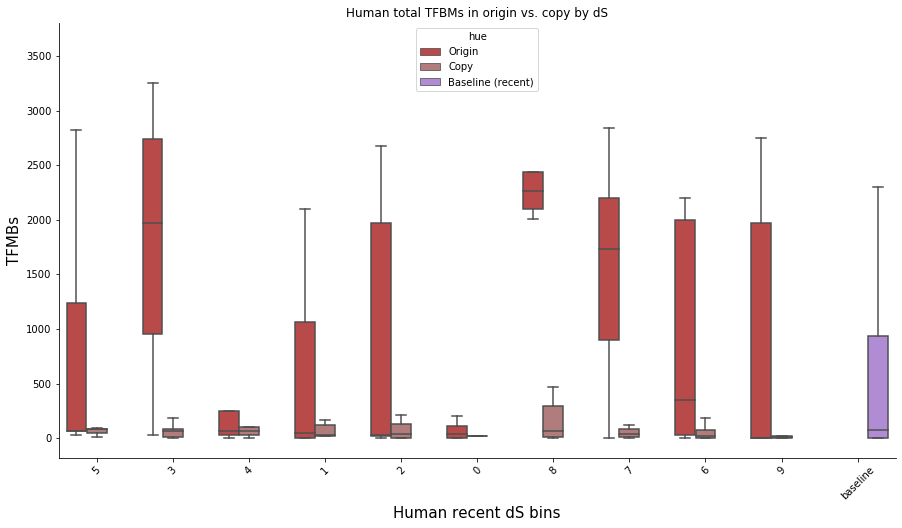

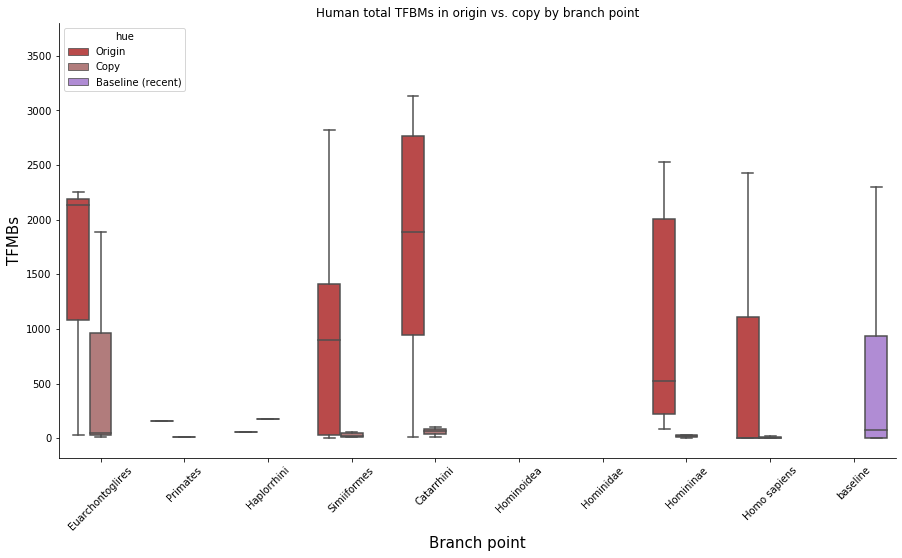

In [ ]:
from pandas import concat
from utils import partition_bins

tfbm=paramech[paramech['retro'] != 0].assign(origin=lambda x: x['factors-g1']*(x['retro'] < 0 )+x['factors-g2']*(x['retro'] > 0), 
copy=lambda x: x['factors-g2']*(x['retro'] < 0 )+x['factors-g1']*(x['retro'] > 0))
tfbm=concat([tfbm.assign(hue=0, val=tfbm['origin']), tfbm.assign(hue=1, val=tfbm['copy'])])

fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
g=boxplot(ax=ax, x="dSbin", y="val", hue='hue', data=
          pd.concat([
              partition_bins(tfbm[(tfbm['dS']<0.9571) & (~tfbm['dS'].isna())], -tfbm[(tfbm['dS']<0.9571) & (~tfbm['dS'].isna())]['dS'], 10, 'dSbin'),
              paramech[paramech['dS']<0.9571][['g1', 'factors-g1']].drop_duplicates().assign(val=lambda x:x['factors-g1']).assign(hue=2).assign(dSbin='baseline')
          ]), palette={0: '#CB3838', 1: '#BA7373', 2: '#b080e0'}, fliersize=0.0)
g.legend_.texts[0].set_text('Origin')
g.legend_.texts[1].set_text('Copy')
g.legend_.texts[2].set_text('Baseline (recent)')
pyplot.ylabel('TFMBs')
pyplot.xlabel('Human recent dS bins')
pyplot.title('Human total TFBMs in origin vs. copy by dS')
despine()
pyplot.savefig('tot-tfbm-human-dup-known-ds-retro-box.pdf', dpi=600)

fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
g=boxplot(ax=ax, x="Branch point", y="val", hue='hue', order=[*branch_hs_recent, 'baseline'], data=
          pd.concat([
              tfbm,
              paramech[paramech['dS']<0.9571][['g1', 'factors-g1']].drop_duplicates().assign(val=lambda x:x['factors-g1']).assign(hue=2).assign(**{'Branch point':'baseline'})
          ]), palette={0: '#CB3838', 1: '#BA7373', 2: '#b080e0'}, fliersize=0.0)
g.legend_.texts[0].set_text('Origin')
g.legend_.texts[1].set_text('Copy')
g.legend_.texts[2].set_text('Baseline (recent)')
pyplot.ylabel('TFMBs')
pyplot.title('Human total TFBMs in origin vs. copy by branch point')
despine()
pyplot.savefig('tot-tfbm-human-dup-known-bp-retro-box.pdf', dpi=600)

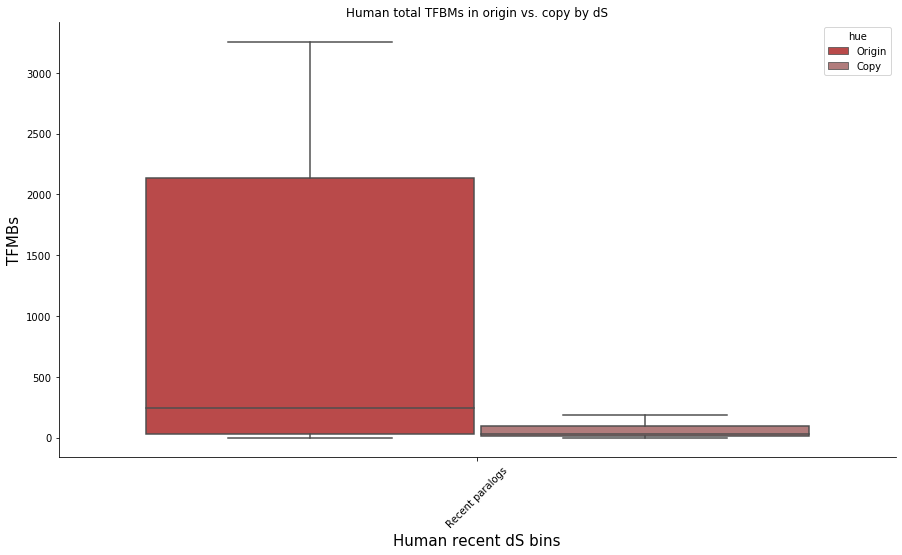

In [ ]:
from pandas import concat
from utils import partition_bins

tfbm=paramech[paramech['retro'] != 0].assign(origin=lambda x: x['factors-g1']*(x['retro'] < 0 )+x['factors-g2']*(x['retro'] > 0), 
copy=lambda x: x['factors-g2']*(x['retro'] < 0 )+x['factors-g1']*(x['retro'] > 0))
tfbm=concat([tfbm.assign(hue=0, val=tfbm['origin']), tfbm.assign(hue=1, val=tfbm['copy'])])

fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
g=boxplot(ax=ax, x="recent", y="val", hue='hue', data=
          pd.concat([
              partition_bins(tfbm[(tfbm['dS']<0.9571) & (~tfbm['dS'].isna())], -tfbm[(tfbm['dS']<0.9571) & (~tfbm['dS'].isna())]['dS'], 10, 'dSbin'),
              #paramech[paramech['dS']<0.9571][['g1', 'factors-g1']].drop_duplicates().assign(val=lambda x:x['factors-g1']).assign(hue=2)
          ]).assign(recent='Recent paralogs'), palette={0: '#CB3838', 1: '#BA7373', 2: '#b080e0'}, fliersize=0.0)
g.legend_.texts[0].set_text('Origin')
g.legend_.texts[1].set_text('Copy')
#g.legend_.texts[2].set_text('Baseline (recent)')
pyplot.ylabel('TFMBs')
pyplot.xlabel('Human recent dS bins')
pyplot.title('Human total TFBMs in origin vs. copy by dS')
despine()
pyplot.savefig('tot-tfbm-human-dup-retro-box.pdf', dpi=600)


In [ ]:
paramech[paramech['dS']<0.9571][['g1', 'factors-g1']].drop_duplicates()['factors-g1'].rename({'factors-g1':'val'})

493       2357
662       3078
1136       196
1304      2427
1325       134
          ... 
119587    3202
119590    2927
119593     403
119595     706
119597    2521
Name: factors-g1, Length: 778, dtype: int64

In [ ]:
tfbm_hs_recent=partition_bins(tfbm[(tfbm['dS']<0.9571) & (~tfbm['dS'].isna())], -tfbm[(tfbm['dS']<0.9571) & (~tfbm['dS'].isna())]['dS'], 10, 'dSbin')
for x in sorted(tfbm_hs_recent['dSbin'].unique()):
    print("Mann-Whitney test on TFBM dSbin %d original vs. copy, FDR controlled: %s"%(x, mannwhitneyu(tfbm_hs_recent[(tfbm_hs_recent['dSbin'] == x)&(tfbm_hs_recent['hue']==0)]['val'], tfbm_hs_recent[(tfbm_hs_recent['dSbin'] == x)&(tfbm_hs_recent['hue']==1)]['val'], alternative='greater').pvalue*len(tfbm_hs_recent['dSbin'].unique())))
for x in branch_hs_recent:
    if sum((tfbm_hs_recent['Branch point'] == x)&(tfbm_hs_recent['hue']==0)) > 0 and sum((tfbm_hs_recent['Branch point'] == x)&(tfbm_hs_recent['hue']==1)) > 0:
       print("Mann-Whitney test on TFBM Branch point %s original vs. copy, FDR controlled: %s"%(x, mannwhitneyu(tfbm_hs_recent[(tfbm_hs_recent['Branch point'] == x)&(tfbm_hs_recent['hue']==0)]['val'], tfbm_hs_recent[(tfbm_hs_recent['Branch point'] == x)&(tfbm_hs_recent['hue']==1)]['val'], alternative='greater').pvalue*len(branch_hs_recent)))
    
print("Mann-Whitney test on TFBM all recent original vs. copy: %s"%(mannwhitneyu(tfbm_hs_recent[(tfbm_hs_recent['hue']==0)]['val'], tfbm_hs_recent[(tfbm_hs_recent['hue']==1)]['val'], alternative='greater').pvalue))
print("Mann-Whitney test on TFBM all recent original vs. all recent genes: %s"%(mannwhitneyu(tfbm_hs_recent[(tfbm_hs_recent['hue']==0)]['val'], paramech[paramech['dS']<0.9571][['g1', 'factors-g1']].drop_duplicates().assign(val=lambda x:x['factors-g1'])['val'], alternative='greater').pvalue))
print("Mann-Whitney test on TFBM all recent copy vs. all recent genes: %s"%(mannwhitneyu(tfbm_hs_recent[(tfbm_hs_recent['hue']==1)]['val'], paramech[paramech['dS']<0.9571][['g1', 'factors-g1']].drop_duplicates().assign(val=lambda x:x['factors-g1'])['val'], alternative='less').pvalue))


Mann-Whitney test on TFBM dSbin 0 original vs. copy, FDR controlled: 3.0876145403167965
Mann-Whitney test on TFBM dSbin 1 original vs. copy, FDR controlled: 6.598379705482738
Mann-Whitney test on TFBM dSbin 2 original vs. copy, FDR controlled: 1.29127210788814
Mann-Whitney test on TFBM dSbin 3 original vs. copy, FDR controlled: 0.013430902910879249
Mann-Whitney test on TFBM dSbin 4 original vs. copy, FDR controlled: 3.218941067154107
Mann-Whitney test on TFBM dSbin 5 original vs. copy, FDR controlled: 1.2867703135517161
Mann-Whitney test on TFBM dSbin 6 original vs. copy, FDR controlled: 0.056261459343252974
Mann-Whitney test on TFBM dSbin 7 original vs. copy, FDR controlled: 0.00802696994228532
Mann-Whitney test on TFBM dSbin 8 original vs. copy, FDR controlled: 0.00010319370981443131
Mann-Whitney test on TFBM dSbin 9 original vs. copy, FDR controlled: 3.34686601032794
Mann-Whitney test on TFBM Branch point Euarchontoglires original vs. copy, FDR controlled: 1.8
Mann-Whitney test on T

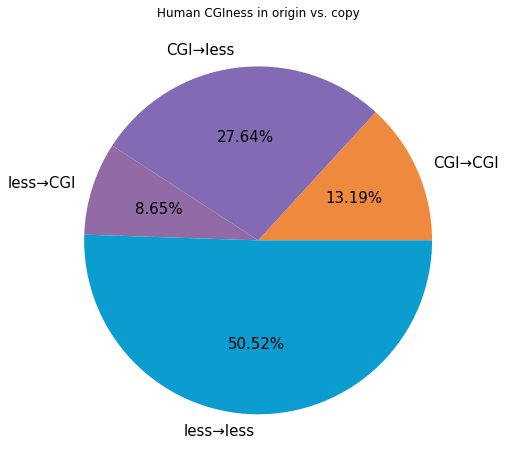

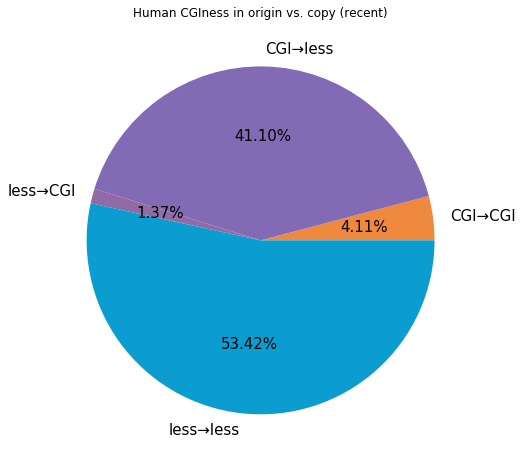

In [ ]:
from pandas import concat
cgi=paramech[paramech['retro'] != 0].assign(origin=lambda x: x['g1_cpgness']*(x['retro'] < 0 )+x['g2_cpgness']*(x['retro'] > 0), 
copy=lambda x: x['g2_cpgness']*(x['retro'] < 0 )+x['g1_cpgness']*(x['retro'] > 0))

fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
g=pyplot.pie([sum((cgi['origin']==True)&(cgi['copy']==True)), sum((cgi['origin']==True)&(cgi['copy']==False)), sum((cgi['origin']==False)&(cgi['copy']==True)), sum((cgi['origin']==False)&(cgi['copy']==False))], labels=['CGI→CGI', 'CGI→less', 'less→CGI', 'less→less'], colors=['#ef893d','#826ab5', '#926aa5','#0b9dcf'], autopct='%0.2f%%', textprops={'fontsize': 15})
pyplot.title('Human CGIness in origin vs. copy')
despine()
pyplot.savefig('cginess-human-dup-retro-pie.pdf', dpi=600)

fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
g=pyplot.pie([sum((cgi['dSbin']>=19)&(cgi['origin']==True)&(cgi['copy']==True)), sum((cgi['dSbin']>=19)&(cgi['origin']==True)&(cgi['copy']==False)), sum((cgi['dSbin']>=19)&(cgi['origin']==False)&(cgi['copy']==True)), sum((cgi['dSbin']>=19)&(cgi['origin']==False)&(cgi['copy']==False))], labels=['CGI→CGI', 'CGI→less', 'less→CGI', 'less→less'], colors=['#ef893d','#826ab5', '#926aa5','#0b9dcf'], autopct='%0.2f%%', textprops={'fontsize': 15})
pyplot.title('Human CGIness in origin vs. copy (recent)')
despine()
pyplot.savefig('cginess-human-dup-retro-pie-recent.pdf', dpi=600)




In [ ]:
from scipy.stats import fisher_exact
hs_genes=pd.read_csv('human-genes.csv')
print('CGI:less-sourced paralogs, fisher-exact (all paralogs): log-odds %f, p-value %f'%fisher_exact([[sum(hs_genes['cpgfull'] == 0), sum(cgi['origin']==False)], [sum(hs_genes['cpgfull'] == 1), sum(cgi['origin']==True)]], alternative='less'))
print('CGI:less-sourced paralogs, fisher-exact (recent paralogs): log-odds %f, p-value %f'%fisher_exact([[sum(hs_genes['cpgfull'] == 0), sum((cgi['dSbin']>=19)&(cgi['origin']==False))], [sum(hs_genes['cpgfull'] == 1), sum((cgi['dSbin']>=19)&(cgi['origin']==True))]], alternative='less'))
print('CGI:less-sourced paralogs, fisher-exact (all paralogs): log-odds %f, p-value %f'%fisher_exact([[sum(hs_genes['cpgfull'] == 0), sum(cgi['copy']==False)], [sum(hs_genes['cpgfull'] == 1), sum(cgi['copy']==True)]], alternative='less'))
print('CGI:less-sourced paralogs, fisher-exact (recent paralogs): log-odds %f, p-value %f'%fisher_exact([[sum(hs_genes['cpgfull'] == 0), sum((cgi['dSbin']>=19)&(cgi['copy']==False))], [sum(hs_genes['cpgfull'] == 1), sum((cgi['dSbin']>=19)&(cgi['copy']==True))]], alternative='less'))

CGI:less-sourced paralogs, fisher-exact (all paralogs): log-odds 0.096066, p-value 0.000000
CGI:less-sourced paralogs, fisher-exact (recent paralogs): log-odds 0.203489, p-value 0.000000
CGI:less-sourced paralogs, fisher-exact (all paralogs): log-odds 0.037761, p-value 0.000000
CGI:less-sourced paralogs, fisher-exact (recent paralogs): log-odds 0.005076, p-value 0.000000


/tmp/ipykernel_476203/2377403444.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  hs_genes=pd.read_csv('human-genes.csv')


In [ ]:
'%d %d %d %d'%(sum(hs_genes['cpgfull'] == 0), sum(hs_genes['cpgfull'] == 1),sum((cgi['dSbin']>=19)&(cgi['origin']==False)) , sum((cgi['dSbin']>=19)&(cgi['origin']==True)))

'9220 10035 40 33'

In [ ]:
plt
#plt.pie([sum((cgi['origin']==True)&(cgi['copy']==True))/32768, sum((cgi['origin']==True)&(cgi['copy']==False))/32768, sum((cgi['origin']==False)&(cgi['copy']==True))/32768, sum((cgi['origin']==False)&(cgi['copy']==False))/32768], normalize=True)

<module 'matplotlib.pyplot' from '/usr/lib/python3/dist-packages/matplotlib/pyplot.py'>

In [ ]:
[sum((cgi['origin']==True)&(cgi['copy']==True)), sum((cgi['origin']==True)&(cgi['copy']==False)), sum((cgi['origin']==False)&(cgi['copy']==True)), sum((cgi['origin']==False)&(cgi['copy']==False))]

[755, 1582, 495, 2892]

In [197]:
sum(cgi['origin']==False)

3387

In [192]:
[sum((cgi['dSbin']>=19)&(cgi['origin']==True)&(cgi['copy']==True)), sum((cgi['dSbin']>=19)&(cgi['origin']==True)&(cgi['copy']==False)), sum((cgi['dSbin']>=19)&(cgi['origin']==False)&(cgi['copy']==True)), sum((cgi['dSbin']>=19)&(cgi['origin']==False)&(cgi['copy']==False))]

[3, 30, 1, 39]

In [202]:
[[sum(hs_genes['cpgfull'] == 0), sum(cgi['origin']==False)], [sum(hs_genes['cpgfull'] == 1), sum(cgi['origin']==True)]]

[[9220, 3387], [10035, 2337]]

In [199]:
[[sum(hs_genes['cpgfull'] == 0), sum((cgi['dSbin']>=19)&(cgi['origin']==False))], [sum(hs_genes['cpgfull'] == 1), sum((cgi['dSbin']>=19)&(cgi['origin']==True))]]

[[9220, 40], [10035, 33]]

In [181]:
cgi[cgi['dSbin']>=19]

Unnamed: 0                             Branch point  CpG-ness      dN  \
3428          6856                             Opisthokonta         1  0.0256   
82485       164971                                Bilateria         0  0.0000   
204580      409160                             Euteleostomi         0  0.0082   
246016      492032                             Euteleostomi         1  0.0000   
282175      564351                                  Amniota         1  0.0060   
...            ...                                      ...       ...     ...   
356447      712895  Mus musculus strain reference (CL57BL6)         0  0.0000   
356479      712959  Mus musculus strain reference (CL57BL6)         1  0.0042   
356481      712962  Mus musculus strain reference (CL57BL6)         1  0.0012   
356496      712993  Mus musculus strain reference (CL57BL6)         1  0.0000   
356509      713018  Mus musculus strain reference (CL57BL6)         0  0.0046   

            dS  Similarity   Length   Distance                  g1  \
3428    0.1174    95.28300   1715.0  300000000  ENSMUSG00000079435   
82485   0.0000     7.14286  12291.0  300000000  ENSMUSG00000095993   
204580  0.0400    79.89950    667.0      22706  ENSMUSG00000056885   
246016  0.0000   100.00000    676.5  300000000  ENSMUSG00000050621   
282175  0.0175    98.68420   2119.0  300000000  ENSMUSG00000008668   
...        ...         ...      ...        ...                 ...   
356447  0.0000   100.00000  19319.5  300000000  ENSMUSG00000053205   
356479  0.0000    99.61690  15215.0  300000000  ENSMUSG00000027236   
356481  0.0000    99.70060   8972.5    4590294  ENSMUSG00000063953   
356496  0.0000   100.00000   9825.0  300000000  ENSMUSG00000008450   
356509  0.0083    99.13040   2281.0  300000000  ENSMUSG00000025508   

                        g2  ...              trans2 conexons  exonsg1 exonsg2  \
3428    ENSMUSG00000104043  ...  ENSMUST00000193882      0.0        5       1   
82485   ENSMUSG00000100305  ...  ENSMUST00000187455      0.0        1       4   
204580  ENSMUSG00000066100  ...  ENSMUST00000084413      0.0        1       3   
246016  ENSMUSG00000090733  ...  ENSMUST00000170122      0.0        1       4   
282175  ENSMUSG00000069117  ...  ENSMUST00000074072      0.0        5       1   
...                    ...  ...                 ...      ...      ...     ...   
356447  ENSMUSG00000071748  ...  ENSMUST00000096420      0.0       11       1   
356479  ENSMUSG00000043424  ...  ENSMUST00000057110      0.0        8       1   
356481  ENSMUSG00000075232  ...  ENSMUST00000099945      0.0        1       8   
356496  ENSMUSG00000071497  ...  ENSMUST00000095978      0.0        5       1   
356509  ENSMUSG00000118552  ...  ENSMUST00000238938      0.0        5       1   

        retro  segmental  prom_clust  mech  origin   copy  
3428       -1      False           0     1    True  False  
82485       1      False           1     1   False  False  
204580      1      False           1     1   False  False  
246016      1      False           0     1    True  False  
282175     -1      False           1     1    True  False  
...       ...        ...         ...   ...     ...    ...  
356447     -1      False           0     1   False  False  
356479     -1      False           0     1    True  False  
356481      1      False           0     1    True  False  
356496     -1      False           0     1    True  False  
356509     -1      False           0     1   False  False  

[182 rows x 180 columns]

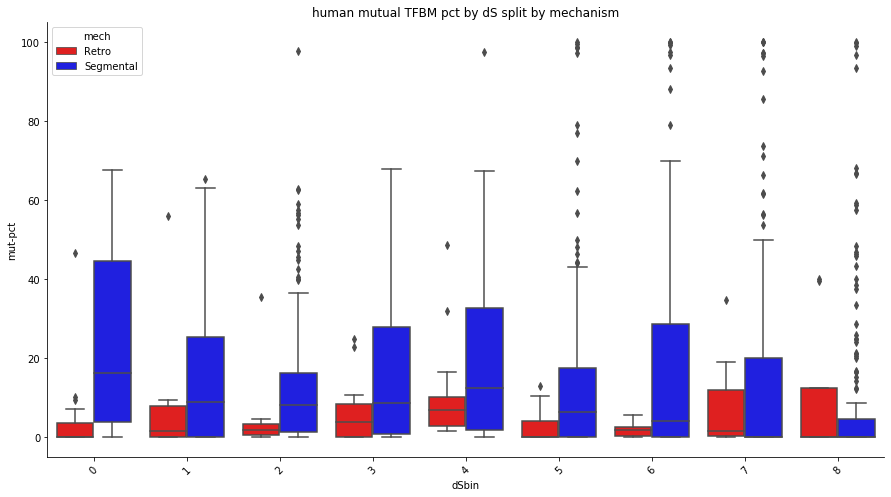

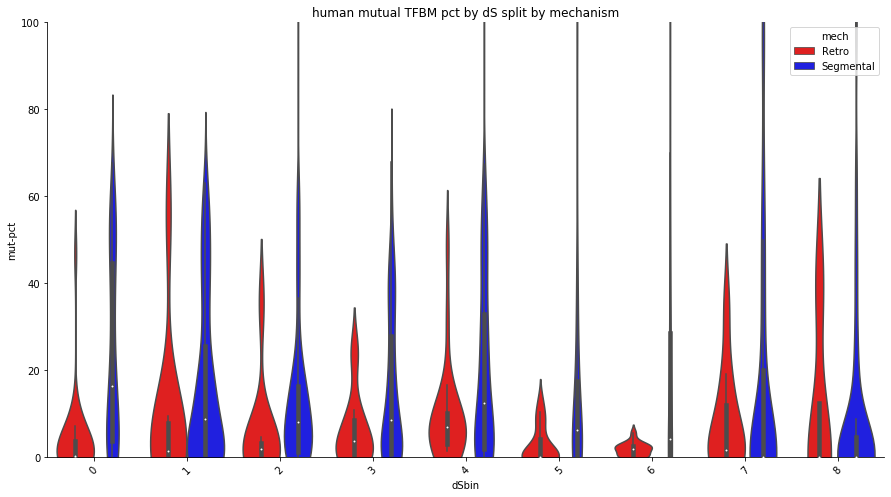

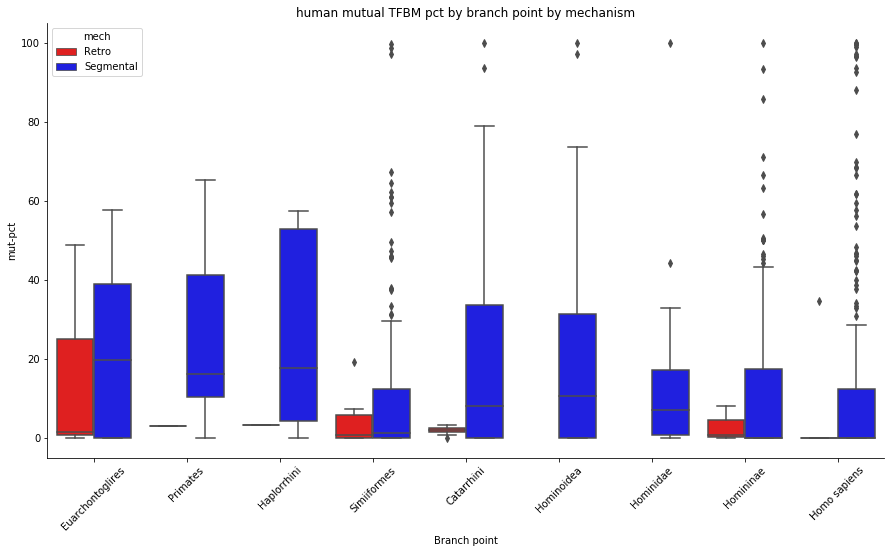

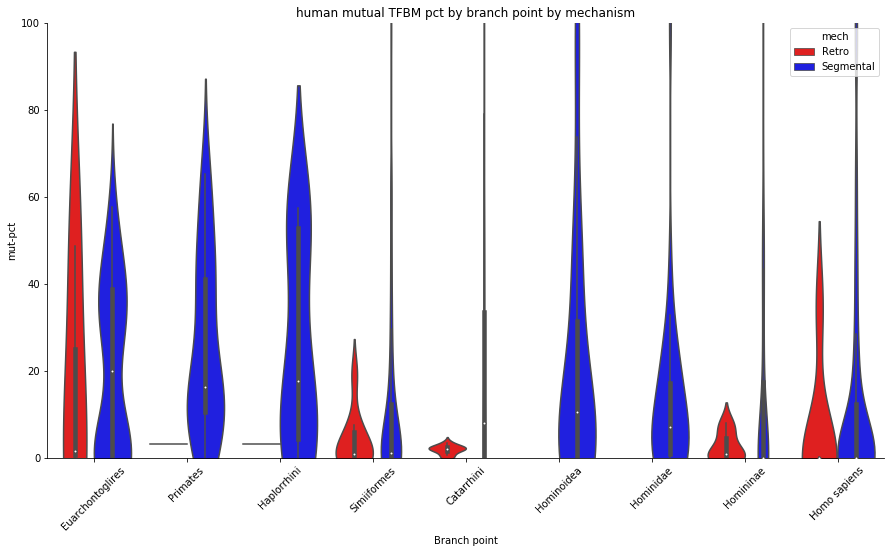

In [213]:
fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
g=boxplot(ax=ax, x="dSbin", y="mut-pct", hue='mech', data=partition_bins(paramech[(paramech['dS']<0.9571) & (~paramech['dS'].isna())], -paramech[(paramech['dS']<0.9571) & (~paramech['dS'].isna())]['dS'], 10, 'dSbin'), palette={1: 'red', 2: 'blue'})
g.legend_.texts[0].set_text('Retro')
g.legend_.texts[1].set_text('Segmental')
pyplot.title('human mutual TFBM pct by dS split by mechanism')
#pyplot.legend(['Retro', 'Segmental'], loc='upper left')
despine()
pyplot.savefig('tfbm-mut-pct-human-dup-known-ds-mech-box.pdf', dpi=600)

fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
ax.set_ylim([0, 100])
g=violinplot(ax=ax, x="dSbin", y="mut-pct", hue='mech', data=partition_bins(paramech[(paramech['dS']<0.9571) & (~paramech['dS'].isna())], -paramech[(paramech['dS']<0.9571) & (~paramech['dS'].isna())]['dS'], 10, 'dSbin'), palette={1: 'red', 2: 'blue'})
g.legend_.texts[0].set_text('Retro')
g.legend_.texts[1].set_text('Segmental')
pyplot.title('human mutual TFBM pct by dS split by mechanism')
#pyplot.legend(['Retro', 'Segmental'], loc='upper left')
despine()
pyplot.savefig('tfbm-mut-pct-human-dup-known-ds-mech-violin.pdf', dpi=600)

fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
g=boxplot(ax=ax, x="Branch point", y="mut-pct", hue='mech', data=paramech[paramech['Branch point'].isin(branch_hs_recent)], order=branch_hs_recent, palette={1: 'red', 2: 'blue'})
g.legend_.texts[0].set_text('Retro')
g.legend_.texts[1].set_text('Segmental')
pyplot.title('human mutual TFBM pct by branch point by mechanism')
#fig.get_axes()[0].legend(title= 'Mechanism',loc='upper left',labels=["Retro","Segmental"],edgecolor='red',facecolor='blue',ncol=2)
#pyplot.legend(['Retro', 'Segmental'], loc='upper left')
despine()
pyplot.savefig('tfbm-mut-pct-human-dup-known-bp-mech-box.pdf', dpi=600)

fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
ax.set_ylim([0, 100])
g=violinplot(ax=ax, x="Branch point", y="mut-pct", hue='mech', data=paramech[paramech['Branch point'].isin(branch_hs_recent)], order=branch_hs_recent, palette={1: 'red', 2: 'blue'})
g.legend_.texts[0].set_text('Retro')
g.legend_.texts[1].set_text('Segmental')
pyplot.title('human mutual TFBM pct by branch point by mechanism')
#fig.get_axes()[0].legend(title= 'Mechanism',loc='upper left',labels=["Retro","Segmental"],edgecolor='red',facecolor='blue',ncol=2)
#pyplot.legend(['Retro', 'Segmental'], loc='upper left')
despine()
pyplot.savefig('tfbm-mut-pct-human-dup-known-bp-mech-violin.pdf', dpi=600)

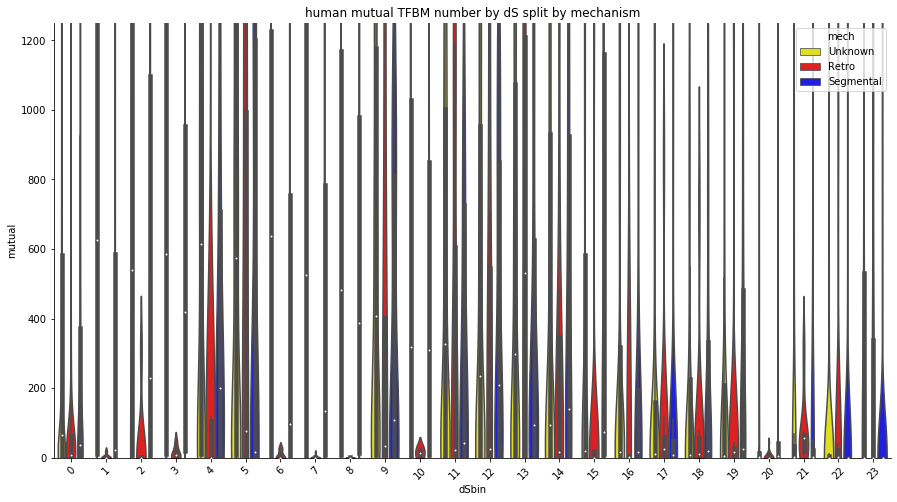

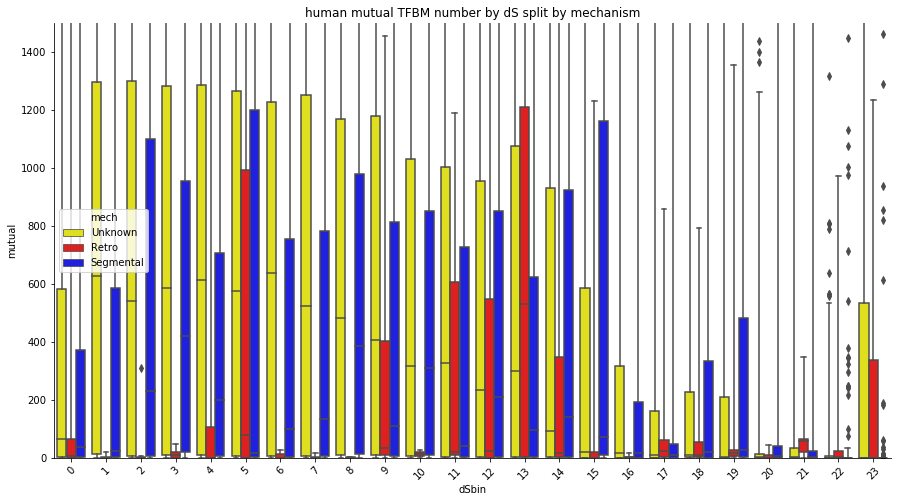

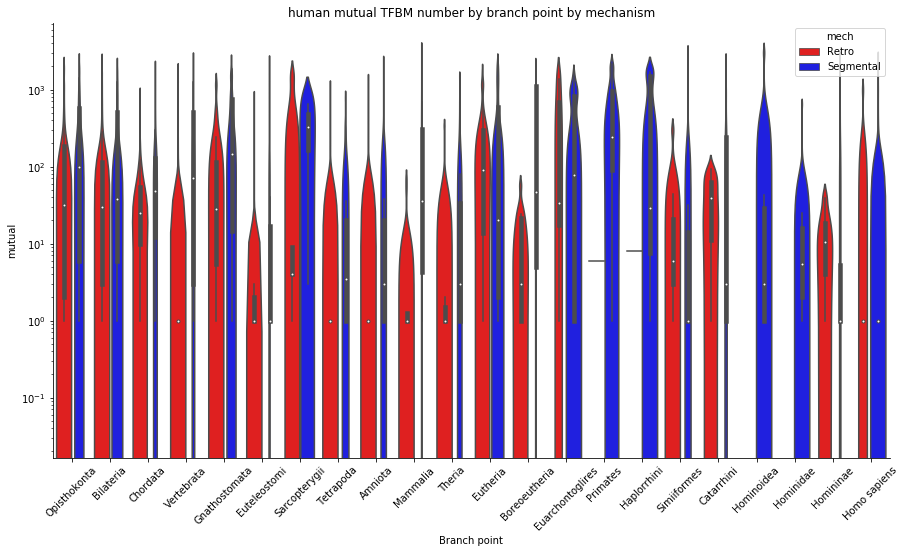

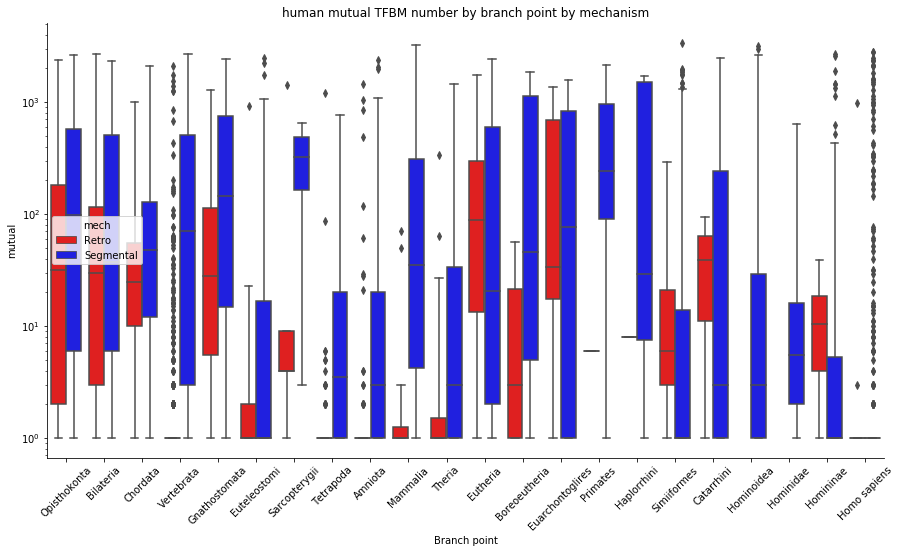

In [28]:
fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
ax.set_ylim([0, 1250])
#ax.set_yscale('log')
g=violinplot(ax=ax, x="dSbin", y="mutual", hue='mech', data=paras.assign(mech = np.minimum(np.abs(paras['retro'])*1 + paras['segmental']*2, 2)), palette={0: 'yellow', 1: 'red', 2: 'blue'}, whis=100.0)
g.legend_.texts[0].set_text('Unknown')
g.legend_.texts[1].set_text('Retro')
g.legend_.texts[2].set_text('Segmental')
pyplot.title('human mutual TFBM number by dS split by mechanism')
#pyplot.legend(['Retro', 'Segmental'], loc='upper left')
despine()
pyplot.savefig('tfbm-mut-abs-human-dup-known-ds-mech-violin.pdf', dpi=600)

fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
ax.set_ylim([0, 1500])
#ax.set_yscale('log')
g=boxplot(ax=ax, x="dSbin", y="mutual", hue='mech', data=paras.assign(mech = np.minimum(np.abs(paras['retro'])*1 + paras['segmental']*2, 2)), palette={0: 'yellow', 1: 'red', 2: 'blue'}, whis=100.0)
g.legend_.texts[0].set_text('Unknown')
g.legend_.texts[1].set_text('Retro')
g.legend_.texts[2].set_text('Segmental')
pyplot.title('human mutual TFBM number by dS split by mechanism')
#pyplot.legend(['Retro', 'Segmental'], loc='upper left')
despine()
pyplot.savefig('tfbm-mut-abs-human-dup-known-ds-mech-box.pdf', dpi=600)


fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
#ax.set_ylim([0, 100])
ax.set_yscale('log')
g=violinplot(ax=ax, x="Branch point", y="mutual", hue='mech', data=paramech.assign(mutual=lambda x : x['mutual']+1), order=branch_order, palette={1: 'red', 2: 'blue'}, whis=100.0)
g.legend_.texts[0].set_text('Retro')
g.legend_.texts[1].set_text('Segmental')
pyplot.title('human mutual TFBM number by branch point by mechanism')
#fig.get_axes()[0].legend(title= 'Mechanism',loc='upper left',labels=["Retro","Segmental"],edgecolor='red',facecolor='blue',ncol=2)
#pyplot.legend(['Retro', 'Segmental'], loc='upper left')
despine()
pyplot.savefig('tfbm-mut-abs-human-dup-known-bp-mech-violin.pdf', dpi=600)

fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
#ax.set_ylim([0, 750])
ax.set_yscale('log')
g=boxplot(ax=ax, x="Branch point", y="mutual", hue='mech', data=paramech.assign(mutual=lambda x : x['mutual']+1), order=branch_order, palette={1: 'red', 2: 'blue'}, whis=100.0)
g.legend_.texts[0].set_text('Retro')
g.legend_.texts[1].set_text('Segmental')
pyplot.title('human mutual TFBM number by branch point by mechanism')
#fig.get_axes()[0].legend(title= 'Mechanism',loc='upper left',labels=["Retro","Segmental"],edgecolor='red',facecolor='blue',ncol=2)
#pyplot.legend(['Retro', 'Segmental'], loc='upper left')
despine()
pyplot.savefig('tfbm-mut-abs-human-dup-known-bp-mech-box.pdf', dpi=600)


In [26]:
paramech[(paramech['retro'] != 0) | (paramech['dSbin']==23)][['factors-g1', 'factors-g2', 'mutual', 'mut-pct']]

factors-g1  factors-g2  mutual    mut-pct
165           2432         893     618  22.829701
167           2299         893     632  24.687500
173           1806         893     545  25.301764
182           2593        2344    1753  55.056533
184           2593        1038     882  32.084394
...            ...         ...     ...        ...
119543           0           0       0        NaN
119561           3           2       1  25.000000
119583           0           0       0        NaN
119584        1610        1608    1607  99.751707
119587        3202           9       7   0.218477

[5968 rows x 4 columns]

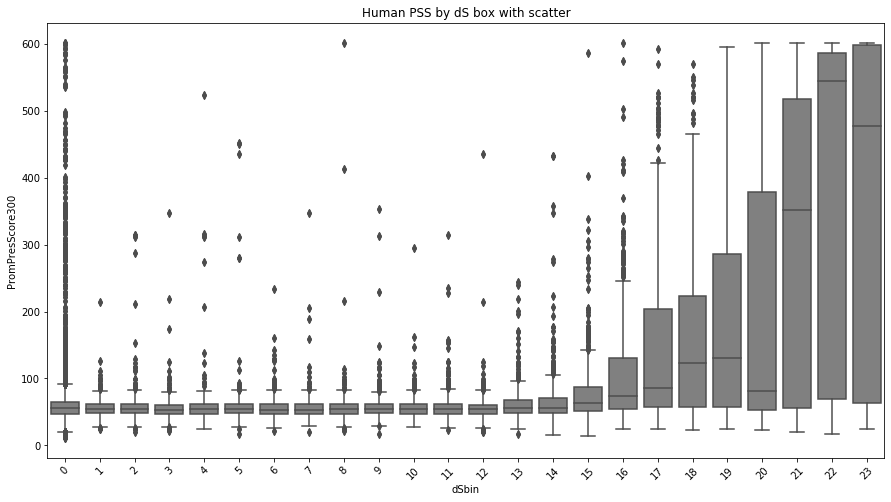

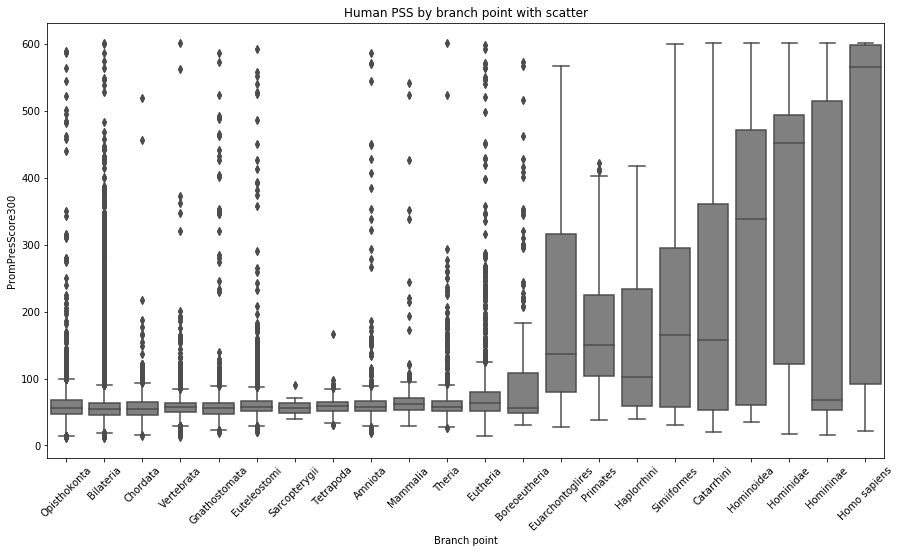

In [62]:
from seaborn import boxplot
import matplotlib.pyplot
fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
g=boxplot(ax=ax, x="dSbin", y="PromPresScore300", data=paras, palette={'gray'})
pyplot.title('Human PSS by dS box with scatter')
#pyplot.legend(['Retro', 'Segmental'], loc='upper left')
pyplot.savefig('prom-seq-similarity-human-scatter-dup-all-ds.pdf', dpi=600)

fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
g=boxplot(ax=ax, x="Branch point", y="PromPresScore300", data=paras, order=branch_order, palette={'gray'})
pyplot.title('Human PSS by branch point with scatter')
#fig.get_axes()[0].legend(title= 'Mechanism',loc='upper left',labels=["Retro","Segmental"],edgecolor='red',facecolor='blue',ncol=2)
#pyplot.legend(['Retro', 'Segmental'], loc='upper left')
pyplot.savefig('prom-seq-similarity-human-scatter-dup-all-bp.pdf', dpi=600)

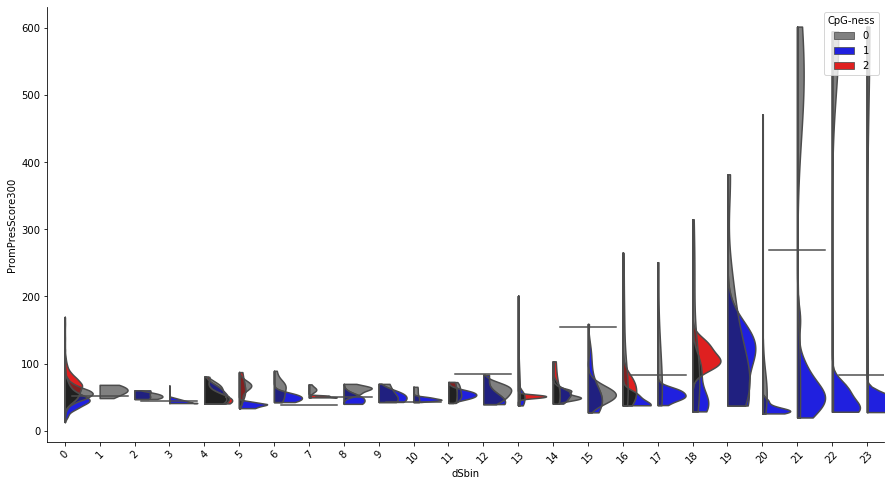

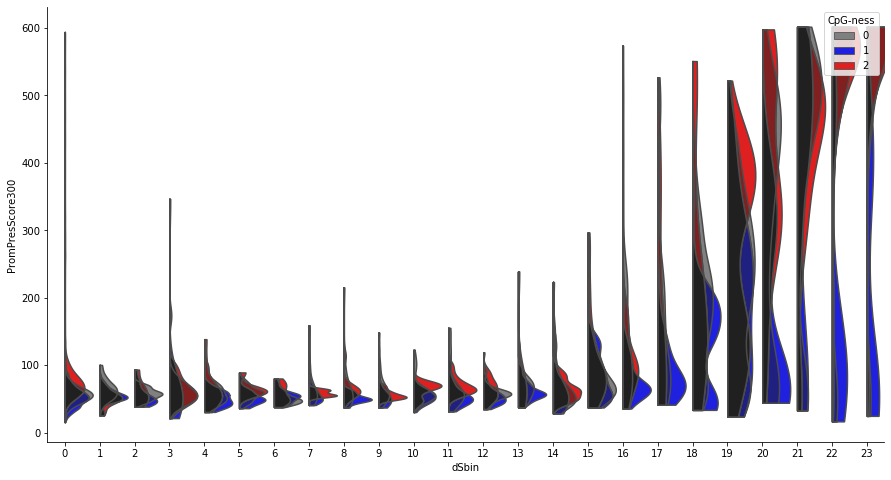

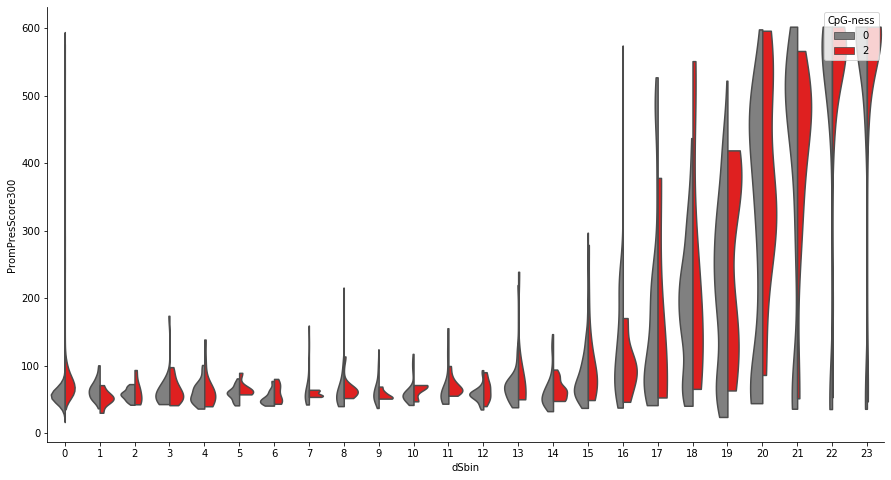

In [18]:
from matplotlib import pyplot
from plots import onesidedviolinplot
from seaborn import despine

fig, ax = pyplot.subplots(figsize=(15,8))pyplot.plot(

pyplot.xticks(rotation=45)
onesidedviolinplot(ax=ax, x="dSbin", y="PromPresScore300", hue="CpG-ness", cut=0, data=paras[paras['retro'] == 1], inner=None, palette=['grey', 'blue', 'red'])
despine()
fig, ax = pyplot.subplots(figsize=(15,8))
onesidedviolinplot(ax=ax, x="dSbin", y="PromPresScore300", hue="CpG-ness", cut=0, data=paras[paras['segmental'] == 1], inner=None, palette=['grey', 'blue', 'red'])
despine()
fig, ax = pyplot.subplots(figsize=(15,8))
violinplot(ax=ax, split=True, x="dSbin", y="PromPresScore300", hue="CpG-ness", cut=0, data=paras[(paras['segmental'] == 1)&(paras['CpG-ness']%2 == 0)], inner=None, palette=['grey', 'red'])
despine()

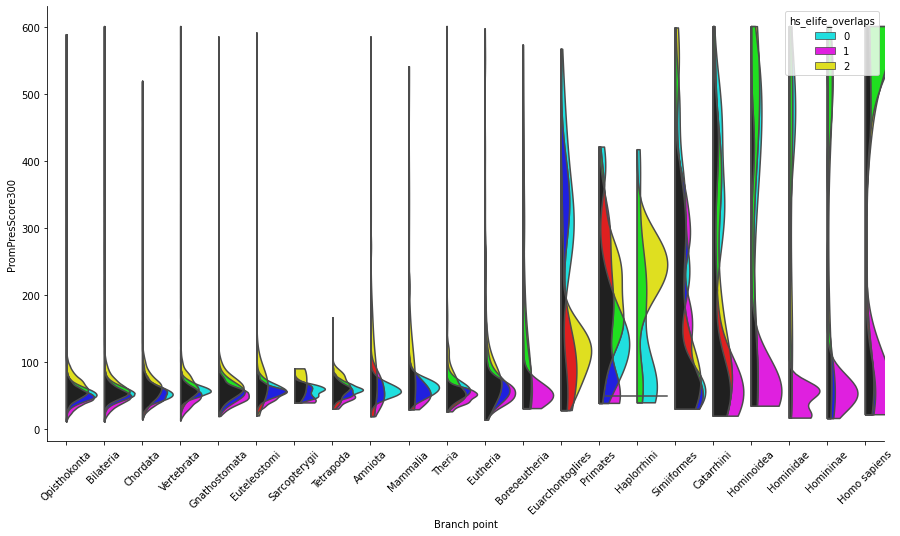

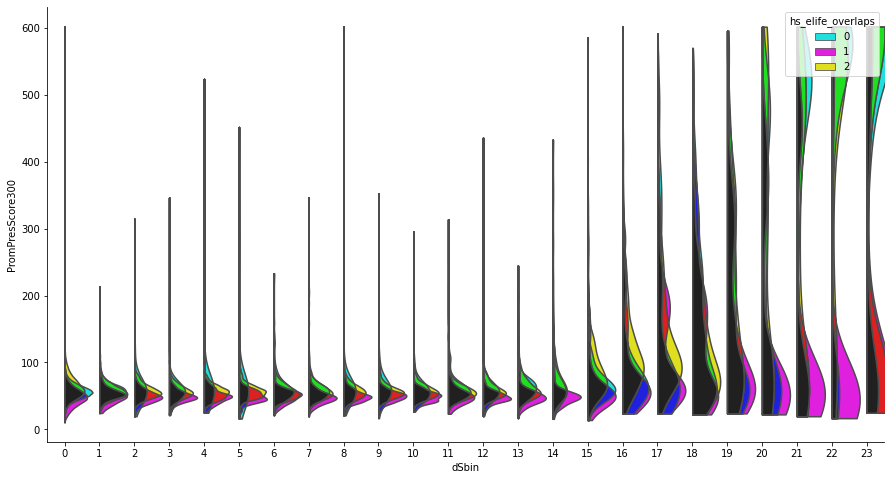

In [24]:
from matplotlib import pyplot
from plots import onesidedviolinplot
from seaborn import despine

branch_order = ["Opisthokonta", "Bilateria", "Chordata", "Vertebrata", "Gnathostomata", "Euteleostomi", "Sarcopterygii", "Tetrapoda", "Amniota",
                "Mammalia", "Theria", "Eutheria", "Boreoeutheria", "Euarchontoglires", "Primates", "Haplorrhini", "Simiiformes", "Catarrhini",
                "Hominoidea", "Hominidae", "Homininae", "Homo sapiens"]

fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
onesidedviolinplot(ax=ax, x="Branch point", y="PromPresScore300", hue="hs_elife_overlaps", cut=0, data=paras, order=branch_order, inner=None, palette=['cyan', 'magenta', 'yellow'])
despine()
fig, ax = pyplot.subplots(figsize=(15,8))
onesidedviolinplot(ax=ax, x="dSbin", y="PromPresScore300", hue="hs_elife_overlaps", cut=0, data=paras, inner=None, palette=['cyan', 'magenta', 'yellow'])
despine()

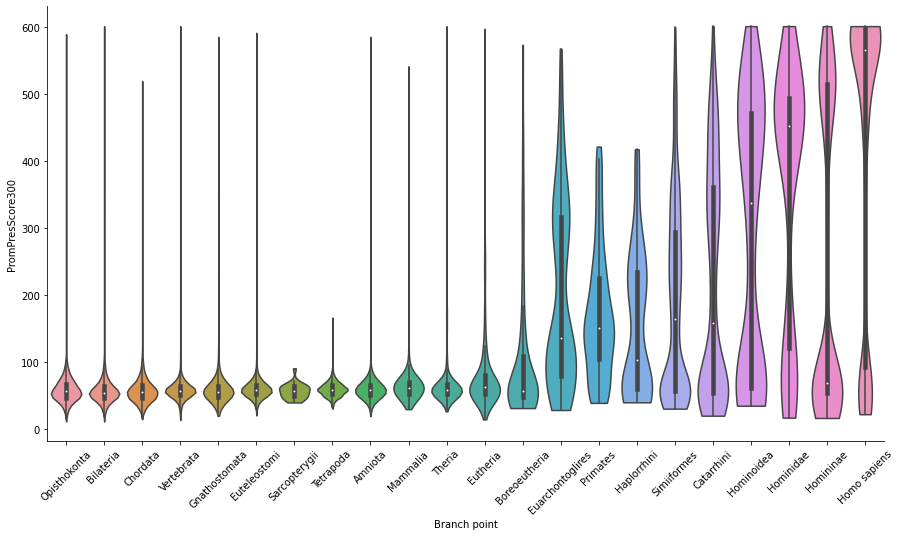

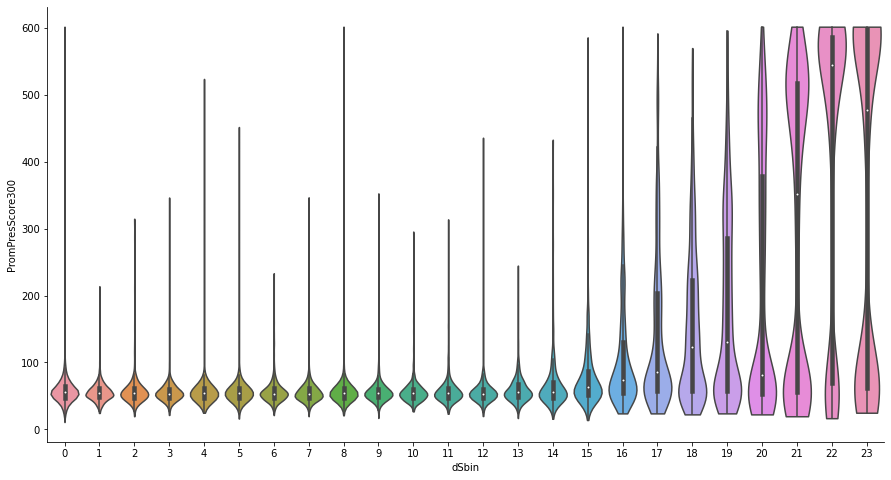

In [7]:
from matplotlib import pyplot
from plots import onesidedviolinplot
from seaborn import despine, violinplot

branch_order = ["Opisthokonta", "Bilateria", "Chordata", "Vertebrata", "Gnathostomata", "Euteleostomi", "Sarcopterygii", "Tetrapoda", "Amniota",
                "Mammalia", "Theria", "Eutheria", "Boreoeutheria", "Euarchontoglires", "Primates", "Haplorrhini", "Simiiformes", "Catarrhini",
                "Hominoidea", "Hominidae", "Homininae", "Homo sapiens"]

fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
violinplot(ax=ax, x="Branch point", y="PromPresScore300", cut=0, data=paras, order=branch_order, scale="width")
despine()
pyplot.savefig('prom-seq-similarity-human-banches.pdf', dpi=600)
fig, ax = pyplot.subplots(figsize=(15,8))
violinplot(ax=ax, x="dSbin", y="PromPresScore300", cut=0, data=paras, scale="width")
despine()

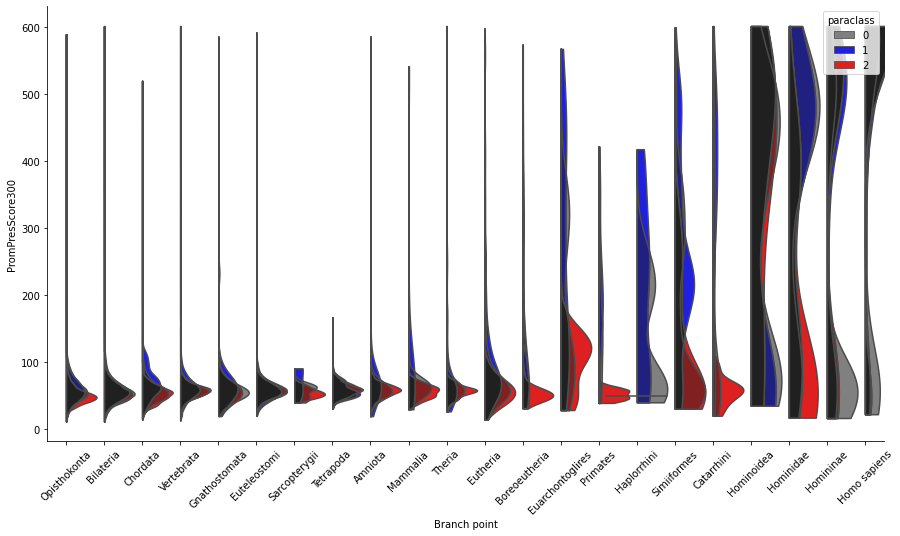

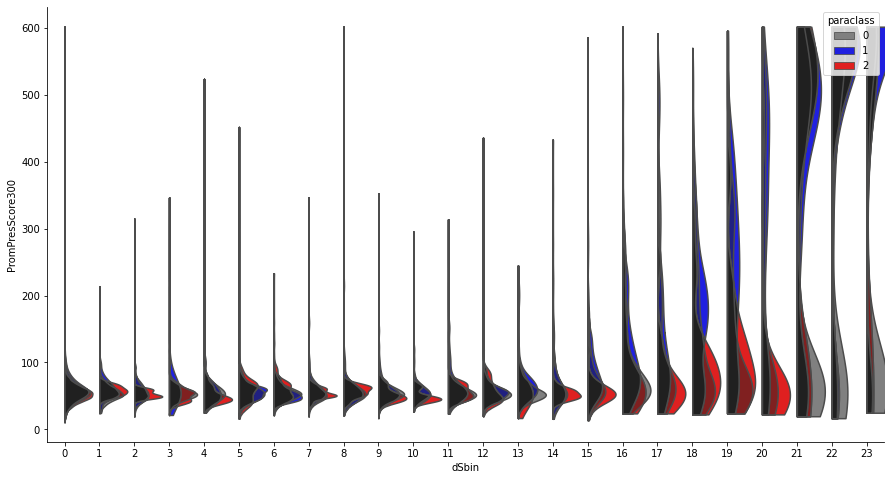

In [36]:
from matplotlib import pyplot
from plots import onesidedviolinplot
from seaborn import despine

branch_order = ["Opisthokonta", "Bilateria", "Chordata", "Vertebrata", "Gnathostomata", "Euteleostomi", "Sarcopterygii", "Tetrapoda", "Amniota",
                "Mammalia", "Theria", "Eutheria", "Boreoeutheria", "Euarchontoglires", "Primates", "Haplorrhini", "Simiiformes", "Catarrhini",
                "Hominoidea", "Hominidae", "Homininae", "Homo sapiens"]

fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
onesidedviolinplot(ax=ax, x="Branch point", y="PromPresScore300", hue="paraclass", cut=0, data=paras, order=branch_order, inner=None, palette=['grey', 'blue', 'red'])
despine()
fig, ax = pyplot.subplots(figsize=(15,8))
onesidedviolinplot(ax=ax, x="dSbin", y="PromPresScore300", hue="paraclass", cut=0, data=paras, inner=None, palette=['grey', 'blue', 'red'])
despine()

<AxesSubplot:xlabel='dSbin', ylabel='PromPresScore300'>

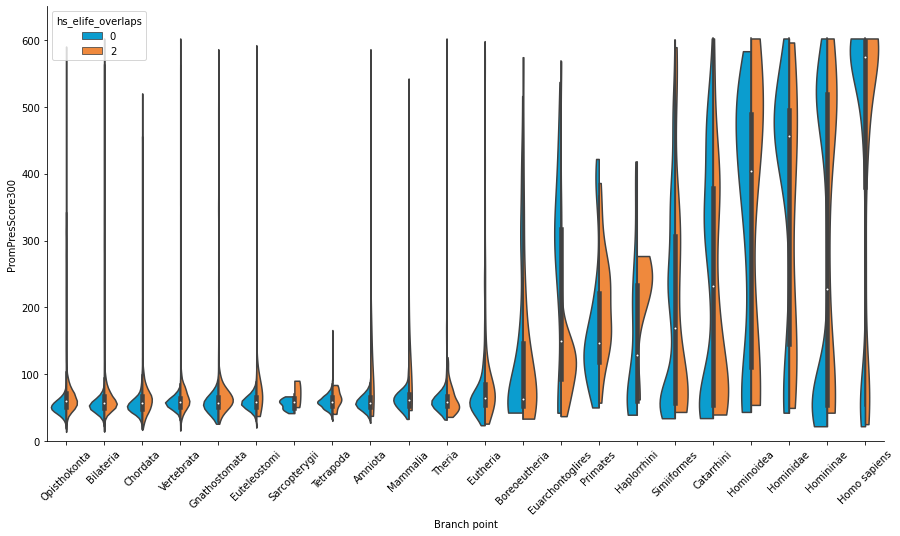

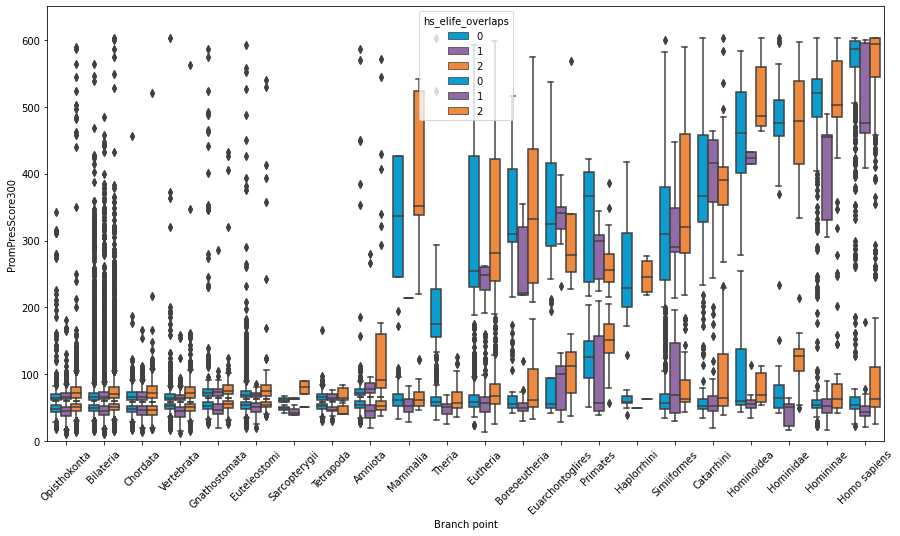

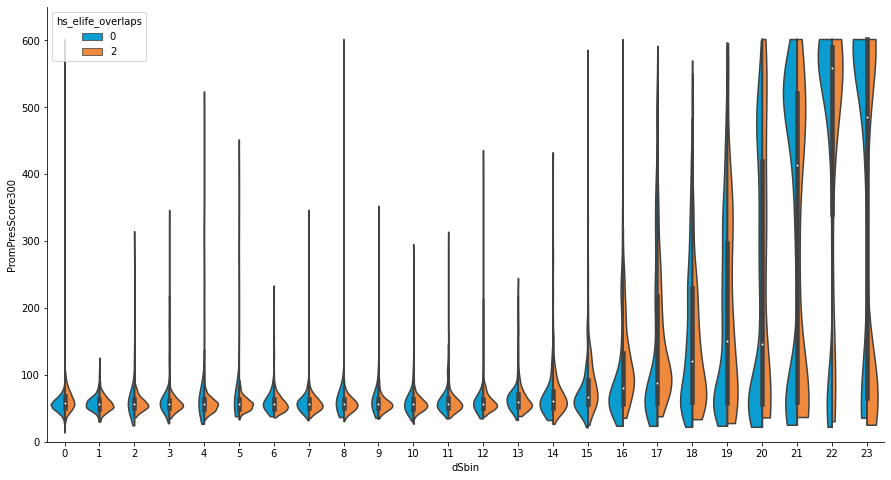

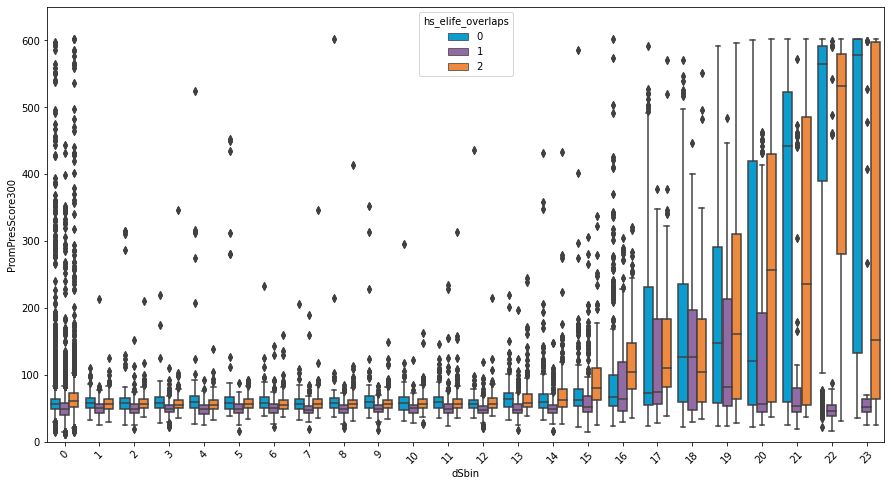

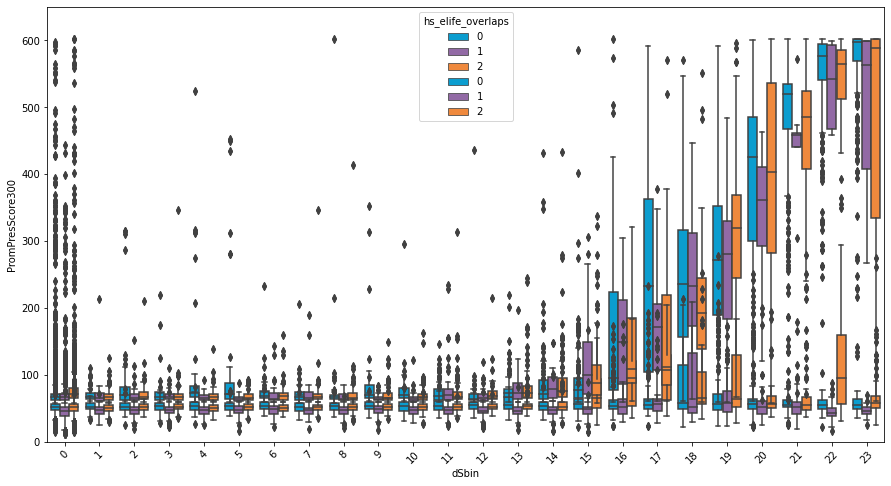

In [25]:
from matplotlib import pyplot
from seaborn import despine, violinplot, boxplot

branch_order = ["Opisthokonta", "Bilateria", "Chordata", "Vertebrata", "Gnathostomata", "Euteleostomi", "Sarcopterygii", "Tetrapoda", "Amniota",
                "Mammalia", "Theria", "Eutheria", "Boreoeutheria", "Euarchontoglires", "Primates", "Haplorrhini", "Simiiformes", "Catarrhini",
                "Hominoidea", "Hominidae", "Homininae", "Homo sapiens"]

fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
ax.set_ylim(0, 650)
violinplot(ax=ax, x="Branch point", y="PromPresScore300", hue="hs_elife_overlaps", cut=0, data=paras[paras["hs_elife_overlaps"] != 1], order=branch_order, saturation=1.0, palette=['#0B9DCF', '#EF893D'], split=True)
despine()
fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
ax.set_ylim(0, 650)
boxplot(ax=ax, x="Branch point", y="PromPresScore300", hue="hs_elife_overlaps", data=paras[(paras["prom_clust"] == 0)], order=branch_order, saturation=1.0, palette=['#0B9DCF', '#926AA5', '#EF893D'])
boxplot(ax=ax, x="Branch point", y="PromPresScore300", hue="hs_elife_overlaps", data=paras[(paras["prom_clust"] == 1)], order=branch_order, saturation=1.0, palette=['#0B9DCF', '#926AA5', '#EF893D'])
fig, ax = pyplot.subplots(figsize=(15,8))
ax.set_ylim(0, 650)
violinplot(ax=ax, x="dSbin", y="PromPresScore300", hue="hs_elife_overlaps", cut=0, data=paras[paras["hs_elife_overlaps"] != 1], saturation=1.0, palette=['#0B9DCF', '#EF893D'], split=True)
despine()
fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
ax.set_ylim(0, 650)
boxplot(ax=ax, x="dSbin", y="PromPresScore300", hue="hs_elife_overlaps", data=paras, saturation=1.0, palette=['#0B9DCF', '#926AA5', '#EF893D'])
fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
ax.set_ylim(0, 650)
boxplot(ax=ax, x="dSbin", y="PromPresScore300", hue="hs_elife_overlaps", data=paras[(paras["prom_clust"] == 0)], saturation=1.0, palette=['#0B9DCF', '#926AA5', '#EF893D'])
boxplot(ax=ax, x="dSbin", y="PromPresScore300", hue="hs_elife_overlaps", data=paras[(paras["prom_clust"] == 1)], saturation=1.0, palette=['#0B9DCF', '#926AA5', '#EF893D'])


In [31]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
smf.ols(formula="PromPresScore300 ~ dSbin + hs_elife_overlaps", data=paras, subset=(paras["prom_clust"] == 1)).fit().summary()
#smf.ols(formula="PromPresScore300 ~ dSbin + hs_elife_overlaps", data=paras).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       PromPresScore300   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                 7.351e+04
Date:                Wed, 05 May 2021   Prob (F-statistic):               0.00
Time:                        14:22:34   Log-Likelihood:            -5.2659e+05
No. Observations:               96986   AIC:                         1.053e+06
Df Residuals:                   96983   BIC:                         1.053e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            72.2710      0.337    214.494      0.000      71.611      72.931
dSbin                13.0130      0.035    375.073      0.000      12.945      13.081
hs_elife_overlaps    -2.5151      0.208    -12.096      0.000      -2.923      -2.108
==============================================================================
Omnibus:                    25629.233   Durbin-Watson:                   0.383
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           699104.329
Skew:                           0.681   Prob(JB):                         0.00
Kurtosis:                      16.082   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='dSbin', ylabel='PromPresScore300'>

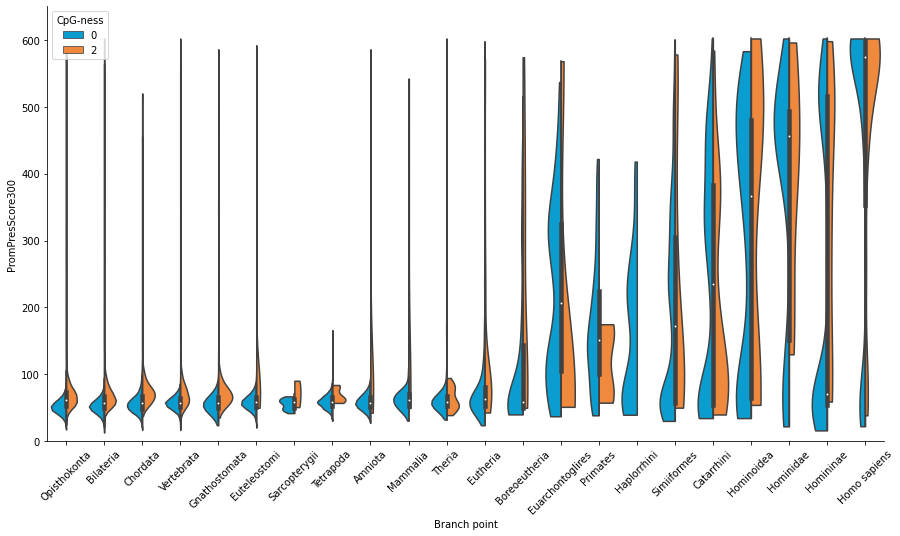

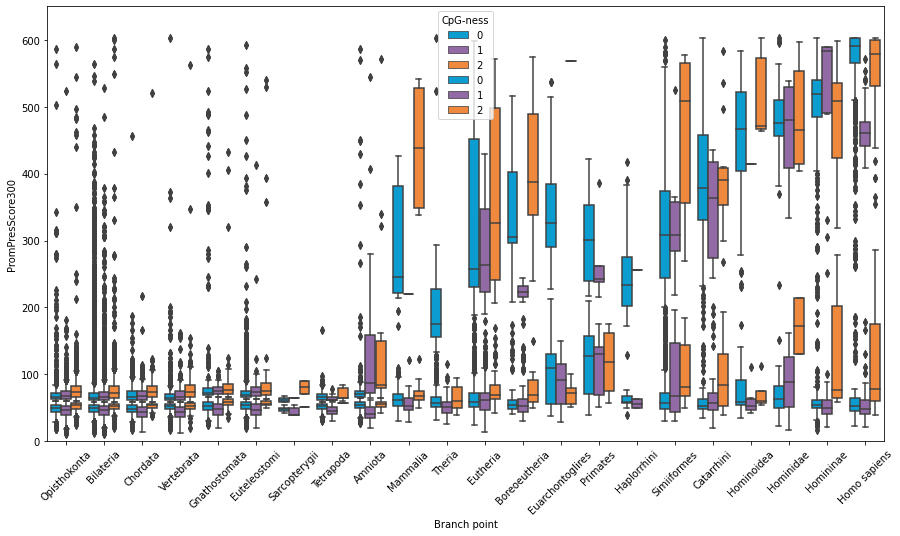

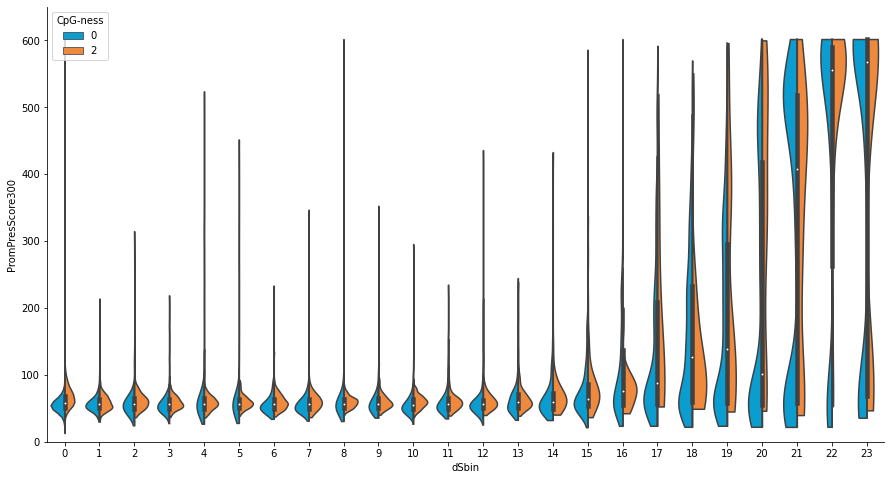

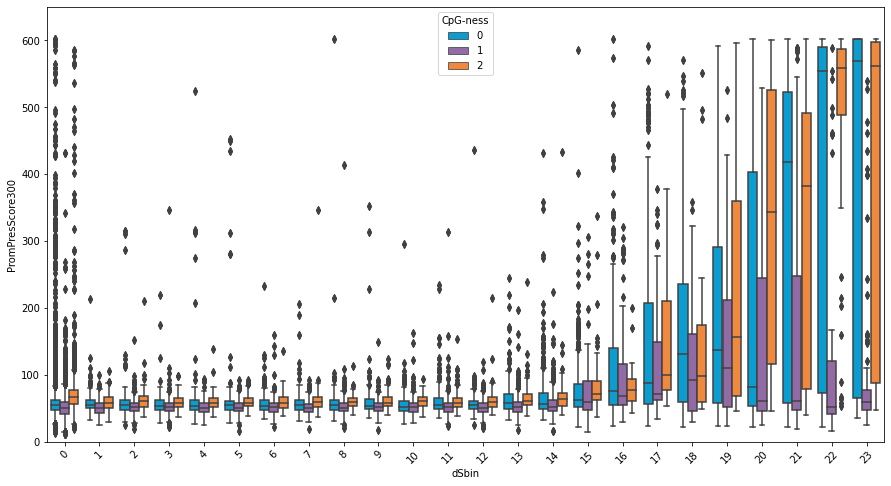

In [173]:
from matplotlib import pyplot
from seaborn import despine, violinplot, boxplot

branch_order = ["Opisthokonta", "Bilateria", "Chordata", "Vertebrata", "Gnathostomata", "Euteleostomi", "Sarcopterygii", "Tetrapoda", "Amniota",
                "Mammalia", "Theria", "Eutheria", "Boreoeutheria", "Euarchontoglires", "Primates", "Haplorrhini", "Simiiformes", "Catarrhini",
                "Hominoidea", "Hominidae", "Homininae", "Homo sapiens"]

fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
ax.set_ylim(0, 650)
violinplot(ax=ax, x="Branch point", y="PromPresScore300", hue="CpG-ness", cut=0, data=paras[paras["CpG-ness"] != 1], order=branch_order, saturation=1.0, palette=['#0B9DCF', '#EF893D'], split=True)
despine()
fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
ax.set_ylim(0, 650)
boxplot(ax=ax, x="Branch point", y="PromPresScore300", hue="CpG-ness", data=paras[(paras["prom_clust"] == 0)], order=branch_order, saturation=1.0, palette=['#0B9DCF', '#926AA5', '#EF893D'])
boxplot(ax=ax, x="Branch point", y="PromPresScore300", hue="CpG-ness", data=paras[(paras["prom_clust"] == 1)], order=branch_order, saturation=1.0, palette=['#0B9DCF', '#926AA5', '#EF893D'])
fig, ax = pyplot.subplots(figsize=(15,8))
ax.set_ylim(0, 650)
violinplot(ax=ax, x="dSbin", y="PromPresScore300", hue="CpG-ness", cut=0, data=paras[paras["CpG-ness"] != 1], saturation=1.0, palette=['#0B9DCF', '#EF893D'], split=True)
despine()
fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
ax.set_ylim(0, 650)
boxplot(ax=ax, x="dSbin", y="PromPresScore300", hue="CpG-ness", data=paras, saturation=1.0, palette=['#0B9DCF', '#926AA5', '#EF893D'])


<AxesSubplot:xlabel='Branch point', ylabel='PromPresTssMinus300'>

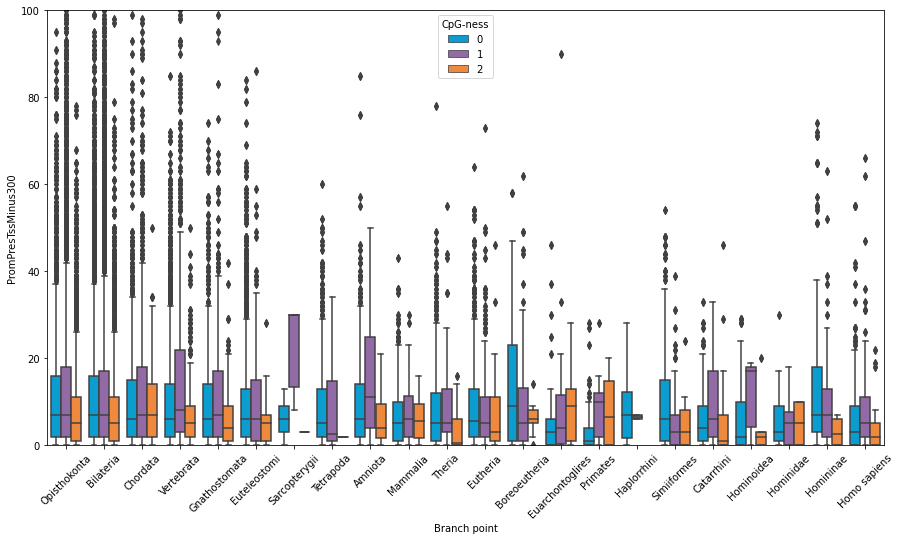

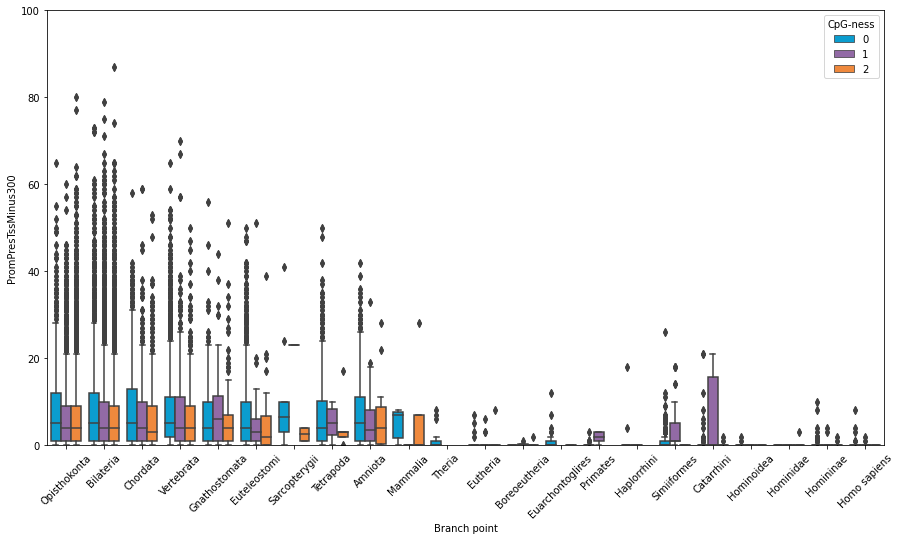

In [177]:
fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
ax.set_ylim(0, 100)
boxplot(ax=ax, x="Branch point", y="PromPresTssMinus300", hue="CpG-ness", data=paras[(paras["prom_clust"] == 0)], order=branch_order, saturation=1.0, palette=['#0B9DCF', '#926AA5', '#EF893D'])
fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
ax.set_ylim(0, 100)
boxplot(ax=ax, x="Branch point", y="PromPresTssMinus300", hue="CpG-ness", data=paras[(paras["prom_clust"] == 1)], order=branch_order, saturation=1.0, palette=['#0B9DCF', '#926AA5', '#EF893D'])


<AxesSubplot:xlabel='Branch point', ylabel='PromPresShift300'>

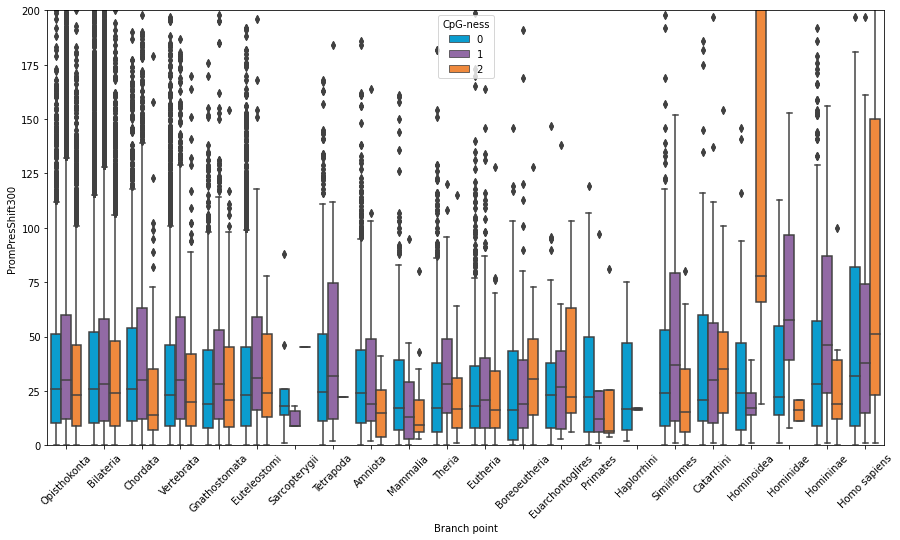

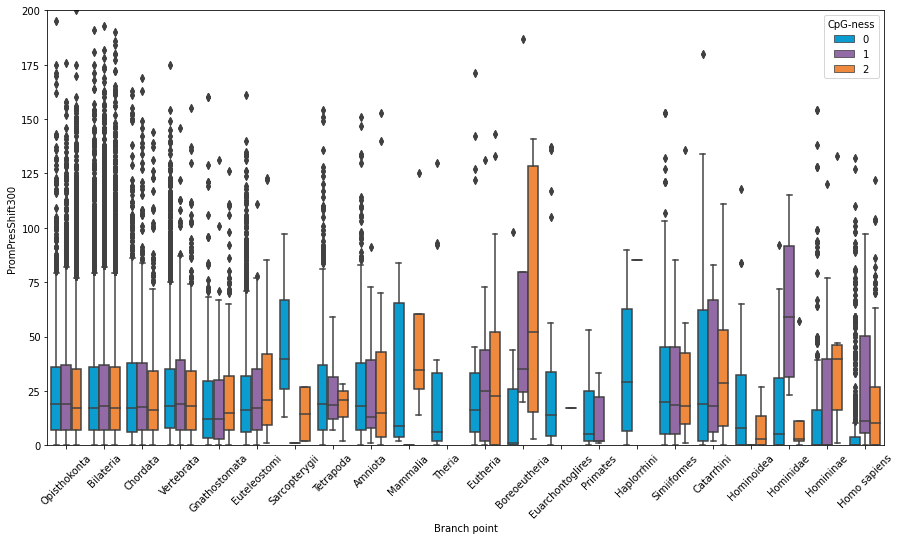

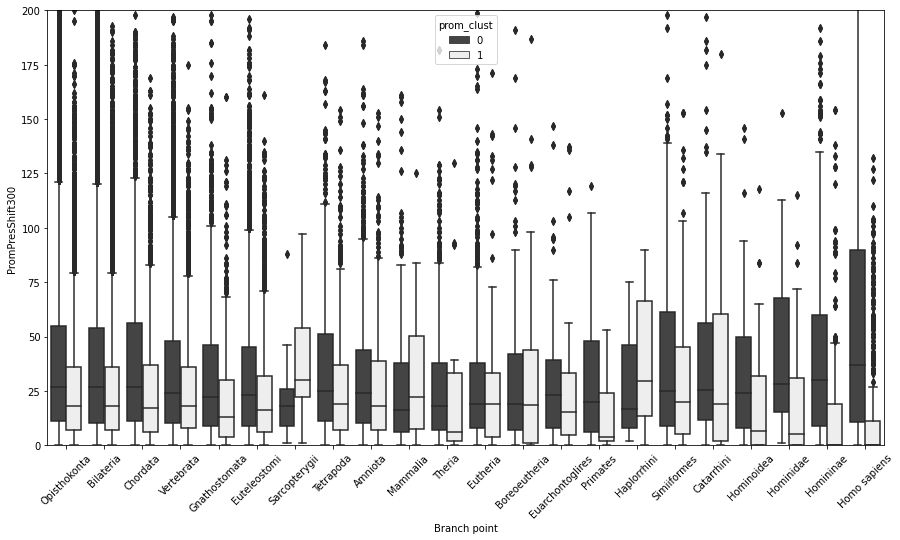

In [182]:
fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
ax.set_ylim(0, 200)
boxplot(ax=ax, x="Branch point", y="PromPresShift300", hue="CpG-ness", data=paras[(paras["prom_clust"] == 0)], order=branch_order, saturation=1.0, palette=['#0B9DCF', '#926AA5', '#EF893D'])
fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
ax.set_ylim(0, 200)
boxplot(ax=ax, x="Branch point", y="PromPresShift300", hue="CpG-ness", data=paras[(paras["prom_clust"] == 1)], order=branch_order, saturation=1.0, palette=['#0B9DCF', '#926AA5', '#EF893D'])
fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
ax.set_ylim(0, 200)
boxplot(ax=ax, x="Branch point", y="PromPresShift300", hue="prom_clust", data=paras, order=branch_order, palette=['#444444', '#eeeeee'], saturation=1.0)


In [2]:
from pandas import read_csv
hs_mm = read_csv('/data/db/import/save/human-mouse-ortho-sim-local.csv')

In [20]:
hs_mm

Unnamed: 0               g1                  g2  PromPresScore300  \
0               0  ENSG00000130255  ENSMUSG00000057863             52.59   
1               1  ENSG00000100580  ENSMUSG00000034111            117.00   
2               2  ENSG00000187969  ENSMUSG00000031330             83.18   
3               3  ENSG00000163322  ENSMUSG00000035234             55.01   
4               4  ENSG00000161970  ENSMUSG00000060938            188.05   
...           ...              ...                 ...               ...   
16776       16776  ENSG00000251759  ENSMUSG00000088908             43.55   
16777       16777  ENSG00000199683  ENSMUSG00000088439             40.68   
16778       16778  ENSG00000222574  ENSMUSG00000084518             58.31   
16779       16779  ENSG00000199197  ENSMUSG00000065824             36.88   
16780       16780  ENSG00000201428  ENSMUSG00000065911             48.66   

       PromPresTssMinus300  PromPresShift300  
0                       28                29  
1                        0               231  
2                        6                 3  
3                        1                57  
4                        0                14  
...                    ...               ...  
16776                   29                 0  
16777                    0                65  
16778                   19                50  
16779                   10                48  
16780                    1                24  

[16781 rows x 6 columns]

In [22]:
hs_mm.mean()

/tmp/ipykernel_476203/1058035464.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  hs_mm.mean()


Unnamed: 0             8390.000000
PromPresScore300        124.014863
PromPresTssMinus300       5.734581
PromPresShift300         37.179667
dtype: float64

This is higher than the baseline in paralogs.

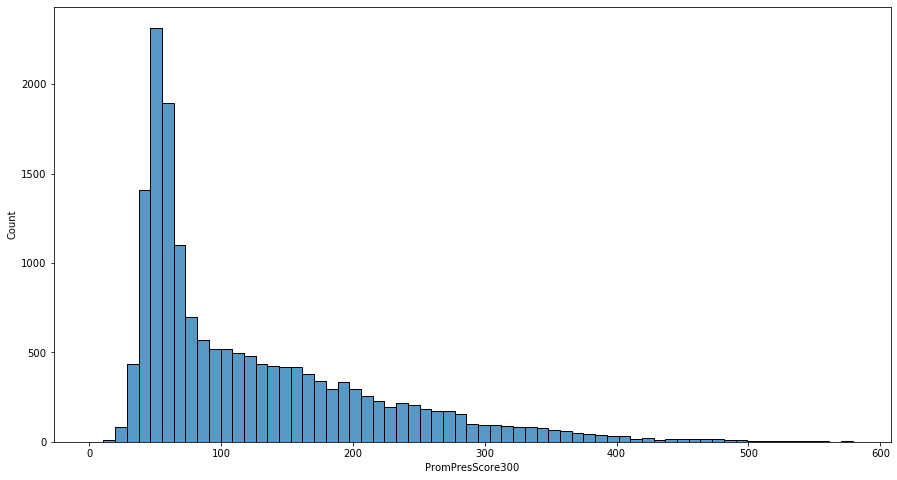

In [23]:
from seaborn import histplot
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize=(15,8))
histplot(ax=ax, data=hs_mm, x='PromPresScore300')

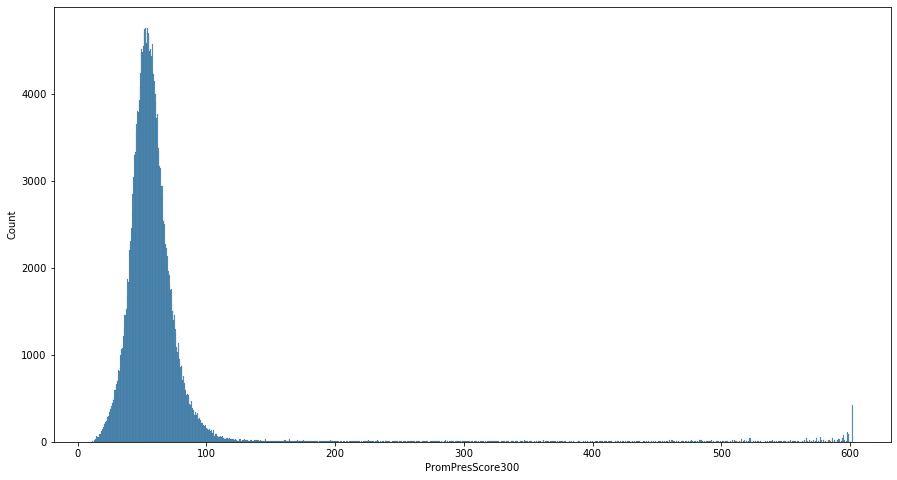

In [7]:
fig, ax = pyplot.subplots(figsize=(15,8))
histplot(ax=ax, data=paras, x='PromPresScore300')

PromPresScore300
1565               41.96
3300               54.53
3838               67.47
7833               68.42
9106               62.02
...                  ...
117031            114.89
117079            265.60
117082             50.41
117596             48.73
118219             47.18

[640 rows x 1 columns]

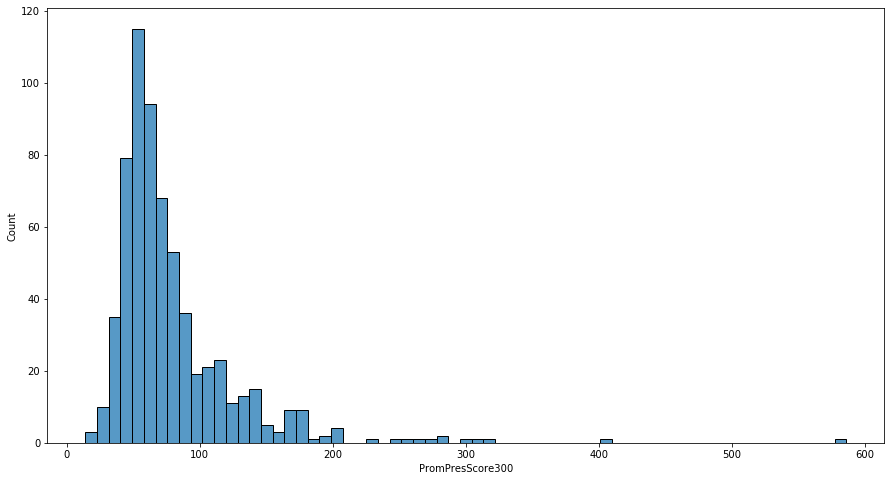

In [47]:
fig, ax = pyplot.subplots(figsize=(15,8))
histplot(ax=ax, data=hs_paras[hs_paras['dSbin'] == 15][['PromPresScore300']], x='PromPresScore300')
hs_paras[hs_paras['dSbin'] == 15][['PromPresScore300']]


In [3]:
mm_paras = read_csv('/home/gencpg/gen_cpg/mouse-paralogs-exocon.csv')
hs_paras = read_csv('/data/db/import/save/human-paralogs-exocon-utr.csv')


/tmp/ipykernel_10927/29221870.py:2: DtypeWarning: Columns (22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,321) have mixed types. Specify dtype option on import or set low_memory=False.
  hs_paras = read_csv('/data/db/import/save/human-paralogs-exocon-utr.csv')


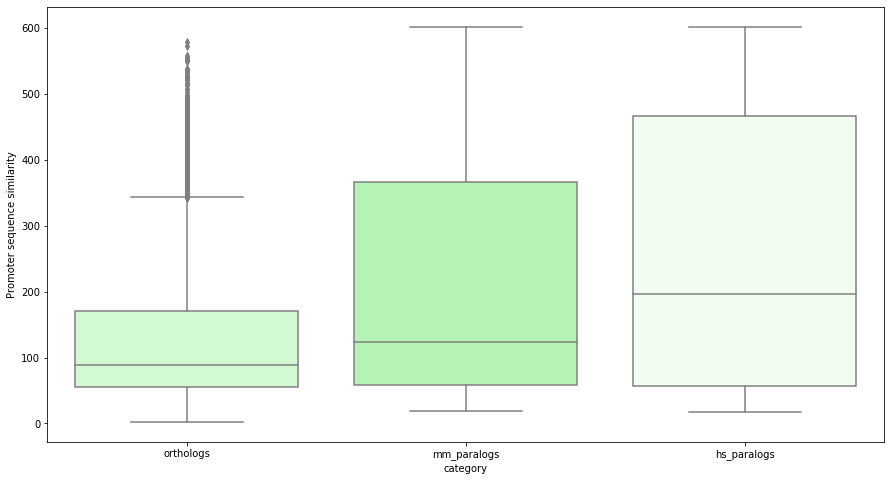

In [4]:
from pandas import concat
from matplotlib import pyplot
import matplotlib.pyplot as plt
from seaborn import boxplot
fig, ax = pyplot.subplots(figsize=(15,8))
boxplot(ax=ax, data=concat((hs_mm[['PromPresScore300']].assign(category='orthologs'), 
    mm_paras[mm_paras['Branch point'].isin(["Euarchontoglires", "Glires", "Rodentia", "Myomorpha", "Muroidea", "Muridae", "Murinae", "Mus", "Mus musculus strain reference (CL57BL6)"])][['PromPresScore300']].assign(category='mm_paralogs'),
        hs_paras[hs_paras['Branch point'].isin(["Euarchontoglires", "Primates", "Haplorrhini", "Simiiformes", "Catarrhini",
                "Hominoidea", "Hominidae", "Homininae", "Homo sapiens"])][['PromPresScore300']].assign(category='hs_paralogs'))), x='category', y='PromPresScore300', palette = {'#aaffaa', '#ccffcc', '#eeffee'})
pyplot.ylabel('Promoter sequence similarity')
plt.savefig('orthologs-euarchontoglires-or-more-recent.pdf', dpi=600)

In [7]:
from scipy.stats import mannwhitneyu
print('Mann-Whitney on mouse paralog promoter sequence preservation versus ortholog promoter sequence preservation: %s'%
      str(mannwhitneyu(mm_paras[mm_paras['Branch point'].isin(["Euarchontoglires", "Glires", "Rodentia", "Myomorpha", "Muroidea", "Muridae", "Murinae", "Mus", "Mus musculus strain reference (CL57BL6)"])]['PromPresScore300'].values, hs_mm['PromPresScore300'].values, alternative='greater')))
print('Mann-Whitney on human paralog promoter sequence preservation versus ortholog promoter sequence preservation: %s'%
      str(mannwhitneyu(hs_paras[hs_paras['Branch point'].isin(["Euarchontoglires", "Primates", "Haplorrhini", "Simiiformes", "Catarrhini",
                "Hominoidea", "Hominidae", "Homininae", "Homo sapiens"])]['PromPresScore300'].values, hs_mm['PromPresScore300'].values, alternative='greater')))


Mann-Whitney on mouse paralog promoter sequence preservation versus ortholog promoter sequence preservation: MannwhitneyuResult(statistic=573835452.0, pvalue=0.0)
Mann-Whitney on human paralog promoter sequence preservation versus ortholog promoter sequence preservation: MannwhitneyuResult(statistic=31233018.5, pvalue=1.3480099444285044e-130)


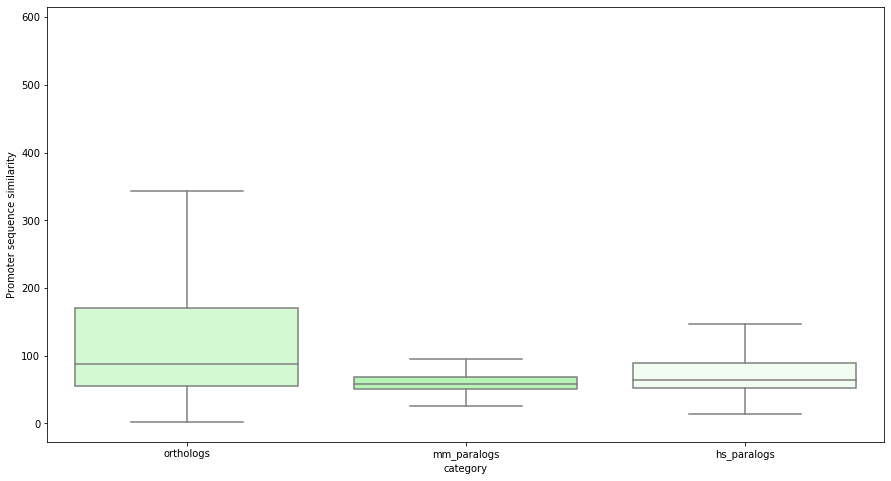

In [5]:
from pandas import concat
fig, ax = pyplot.subplots(figsize=(15,8))
boxplot(ax=ax, data=concat((hs_mm[['PromPresScore300']].assign(category='orthologs'), 
    mm_paras[mm_paras['dSbin']==2][['PromPresScore300']].assign(category='mm_paralogs'),
        hs_paras[hs_paras['dSbin']==15][['PromPresScore300']].assign(category='hs_paralogs'))), x='category', y='PromPresScore300', palette = {'#aaffaa', '#ccffcc', '#eeffee'}, fliersize=0.0)
pyplot.ylabel('Promoter sequence similarity')
plt.savefig('orthologs-euarchontoglires-only.pdf', dpi=600)

In [6]:
from scipy.stats import mannwhitneyu
print('Mann-Whitney on mouse paralog promoter sequence preservation versus ortholog promoter sequence preservation: %s'%
      str(mannwhitneyu(mm_paras[mm_paras['dSbin']==2]['PromPresScore300'].values, hs_mm['PromPresScore300'].values, alternative='less')))
print('Mann-Whitney on human paralog promoter sequence preservation versus ortholog promoter sequence preservation: %s'%
      str(mannwhitneyu(hs_paras[hs_paras['dSbin']==15]['PromPresScore300'].values, hs_mm['PromPresScore300'].values, alternative='less')))


Mann-Whitney on mouse paralog promoter sequence preservation versus ortholog promoter sequence preservation: MannwhitneyuResult(statistic=15234480.5, pvalue=6.361158139062069e-173)
Mann-Whitney on human paralog promoter sequence preservation versus ortholog promoter sequence preservation: MannwhitneyuResult(statistic=3952568.0, pvalue=3.6811677407651294e-30)


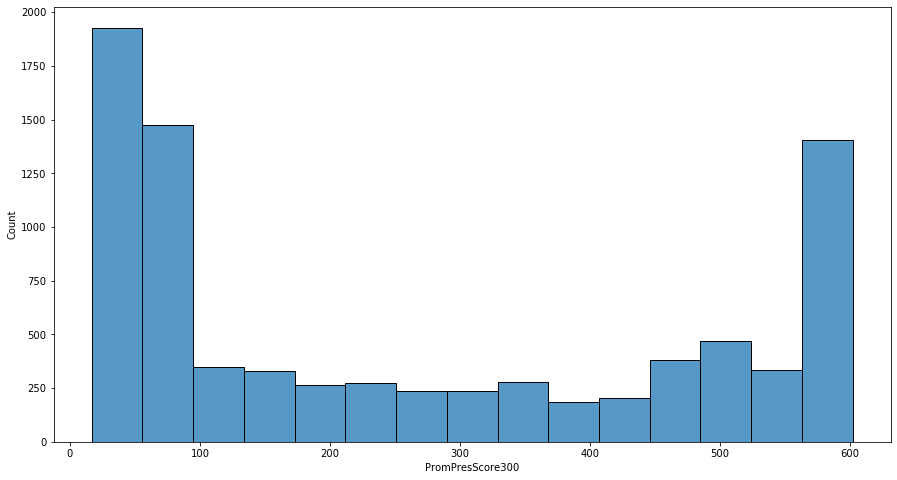

In [8]:
fig, ax = pyplot.subplots(figsize=(15,8))
histplot(ax=ax, data=paras[paras['dSbin']>=18], x='PromPresScore300')


In [344]:
segsols=pickle.load(open('/data/db/import/save/human-mouse-segsols.pkl', 'rb'))
#[(x,y) for (x, y) in paramech[['g1', 'factors-g1']].iloc]
tfbm_per_gene={ x:y for (x, y) in paras[['g1', 'factors-g1']].iloc }
tfbm_per_gene.update({ x:y for (x, y) in paras[['g2', 'factors-g2']].iloc })

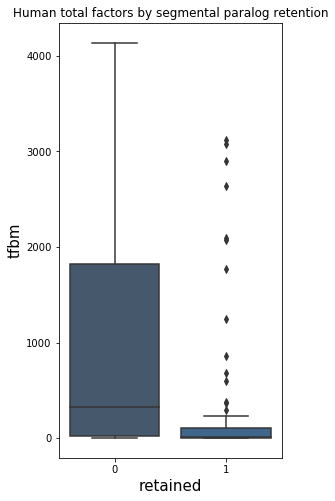

In [345]:
#[x[1] for x in segsols if x[1][1] != None and x[1][2] != None]
from itertools import chain
from pandas import DataFrame, concat
retained=set(chain(*chain(*[[(x[1], x[2]) for x in s[1] if x[0] != None and x[1] != None and x[2] != None] for s in segsols])))
lost=set(chain(*[[x[1] if x[1] != None else x[2] for x in s[1] if x[0] != None and ((x[1] == None) + (x[2] == None)) == 1 ] for s in segsols]))

fig, ax = pyplot.subplots(figsize=(4,8))
g=boxplot(ax=ax, x="retained", y="tfbm", data=
          concat([DataFrame.from_records([(x, tfbm_per_gene[x], 1) for x in retained if x in tfbm_per_gene], columns=['gene', 'tfbm', 'retained']),
           DataFrame.from_records([(x, tfbm_per_gene[x], 0) for x in lost if x in tfbm_per_gene], columns=['gene', 'tfbm', 'retained'])]), palette = {1: '#336699', 0: '#405972'})
pyplot.title('Human total factors by segmental paralog retention')
#fig.get_axes()[0].legend(title= 'Mechanism',loc='upper left',labels=["Retro","Segmental"],edgecolor='red',facecolor='blue',ncol=2)
#pyplot.legend(['Retro', 'Segmental'], loc='upper left')
pyplot.savefig('tfbm-human-by-seg-paralog-retention.pdf', dpi=600)

In [419]:
len(retained)
#len(segsols)


120

In [183]:
#[x for x in retained if x not in tfbm_per_gene]
#from matplotlib.pyplot import hist
#retframe['exprlog'].isnumber()
#hist(retframe[abs(retframe['exprlog']) != np.inf]['exprlog'])
xset=retframe[(abs(retframe['exprlog']) != np.inf) & (retframe['retained'] == 1)]
from itertools import count
X = sorted(list(zip(xset['exprlog'].dropna(), count())), key=lambda x:x[0])
X

[(-4.01334170025964, 101),
 (-3.667744381583978, 47),
 (-3.633785391804365, 33),
 (-3.483186482330167, 98),
 (-3.3985618577084744, 77),
 (-3.34881937578688, 54),
 (-3.1034333038583566, 32),
 (-3.070072272623876, 8),
 (-3.0599017961132455, 19),
 (-2.833708666708229, 5),
 (-2.789616068194319, 103),
 (-2.7317216727345173, 44),
 (-2.7072939871041037, 41),
 (-2.5594573660922966, 24),
 (-2.298712600780172, 57),
 (-2.2309064979601523, 49),
 (-2.145316422014401, 42),
 (-2.1059990921863867, 58),
 (-1.9358816034392172, 28),
 (-1.870685800281924, 46),
 (-1.824954374085696, 25),
 (-1.7541458159347745, 1),
 (-1.524977285844031, 0),
 (-1.3688474475161698, 79),
 (-1.3640202805778907, 93),
 (-1.2969034840540334, 91),
 (-0.960780904273546, 73),
 (-0.7516050265315521, 69),
 (-0.743722837773819, 36),
 (-0.6003455992046841, 81),
 (-0.5714642040131774, 59),
 (-0.3850494334697947, 90),
 (-0.3525961307612765, 55),
 (-0.2332166146987069, 37),
 (-0.2195761719851292, 67),
 (-0.19519891521582663, 51),
 (0.120685

/home/gencpg/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Expression control leaves 64 pairs


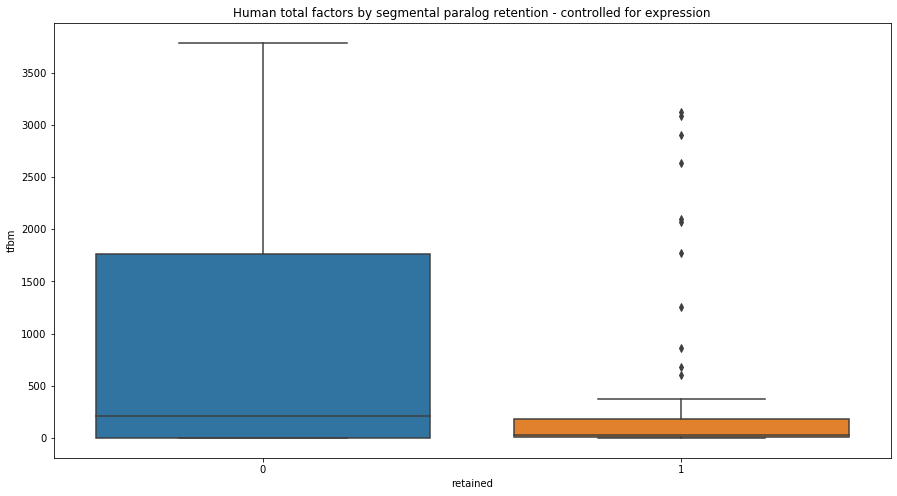

In [62]:
from pandas import DataFrame, concat
retframe=concat([DataFrame.from_records([(x, tfbm_per_gene[x], 1) for x in retained if x in tfbm_per_gene], columns=['gene', 'tfbm', 'retained']),
           DataFrame.from_records([(x, tfbm_per_gene[x], 0) for x in lost if x in tfbm_per_gene], columns=['gene', 'tfbm', 'retained'])])
retframe=retframe.join(
pickle.load(open('/data/db/import/save/paralogs-genexpr.pkl', 'rb')).drop(columns=['cpgness', 'cpgfull']).max(axis=1).rename('maxexpr')
, on='gene').assign(exprlog=lambda x: np.log(x['maxexpr']))
from row_matchers import one_to_one_matches
retainedf, lostf = one_to_one_matches(retframe[(abs(retframe['exprlog']) != np.inf) & retframe['exprlog'].notna() & retframe['retained'] == 1], retframe[(abs(retframe['exprlog']) != np.inf) & retframe['exprlog'].notna() & retframe['retained'] == 0], 'exprlog', 0.1)
print('Expression control leaves %d pairs'%len(lostf))

fig, ax = pyplot.subplots(figsize=(15,8))
g=boxplot(ax=ax, x="retained", y="tfbm", data=concat([lostf.set_index('gene'), retainedf.set_index('gene')]))
pyplot.title('Human total factors by segmental paralog retention - controlled for expression')
pyplot.savefig('tfbm-human-by-seg-paralog-retention-expr-ctl.pdf', dpi=600)

In [64]:
print('Mann-Whitney on human paralog retention by TFBM: %s'%str(mannwhitneyu(lostf.set_index('gene')['tfbm'], retainedf.set_index('gene')['tfbm'], alternative='greater')))


Mann-Whitney on human paralog retention by TFBM: MannwhitneyuResult(statistic=2324.0, pvalue=0.09377166764411338)


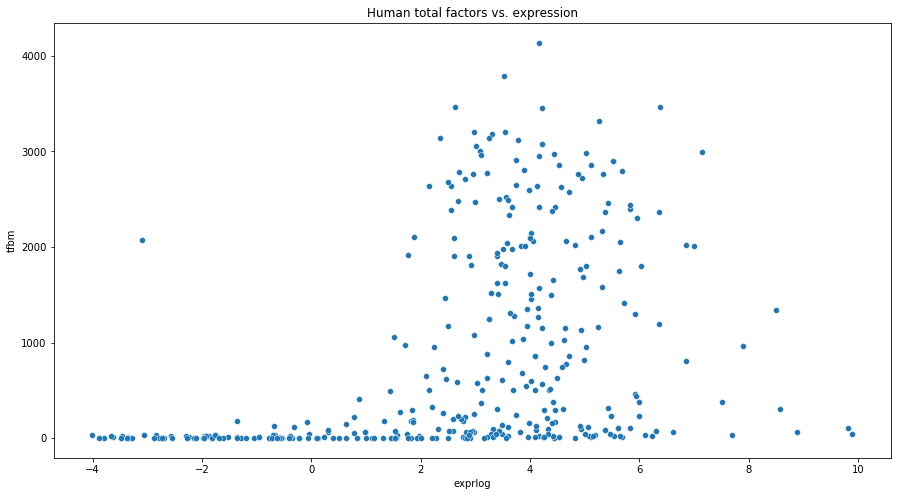

In [308]:
#DataFrame.from_records([(c[0].id.split(':')[1], abs(c[0].end-c[0].start), len(c[1])) for c in canons.values()],
#                       columns = ['gene', 'gene_length', 'trans_length']).set_index('gene')
#lostf
#canons
#DataFrame.from_records([(k.split(':')[1], abs(c[0].end-c[0].start), len(c[1])) for (k,c) in canons.items()],
#                       columns = ['gene', 'gene_length', 'trans_length']).set_index('gene')
#concat([lost.set_index('gene'), retained.set_index('gene')])
from seaborn import scatterplot
fig, ax = pyplot.subplots(figsize=(15,8))
scatterplot(ax=ax, data=retframe, x='exprlog', y='tfbm')
pyplot.title('Human total factors vs. expression')
pyplot.savefig('tfbm-human-tfbm-vs-expr.pdf', dpi=600)

In [70]:
canons = canons_by_gene(gffutils.FeatureDB('homo.db'), r'/mnt/hddata/2/evgeny/TAU/Homo_sapiens.GRCh38.dna_sm.primary_assembly.fa')

Gene length control leaves 30 pairs
Transcript length control leaves 53 pairs


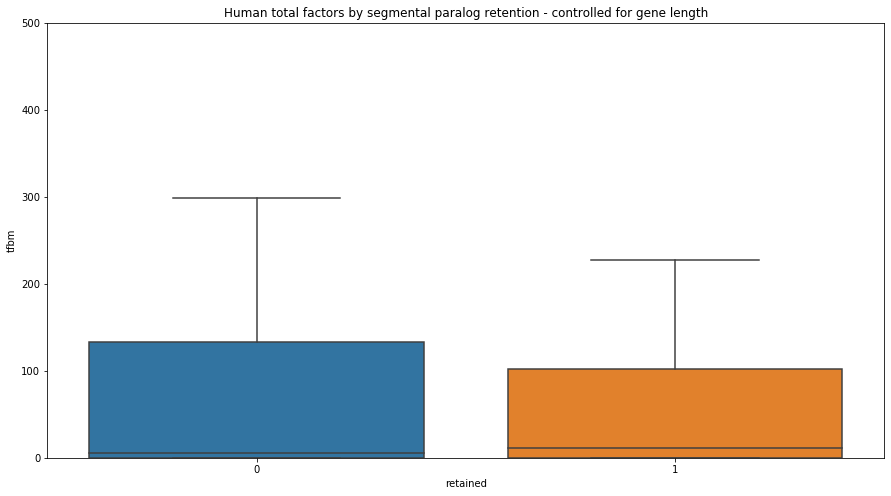

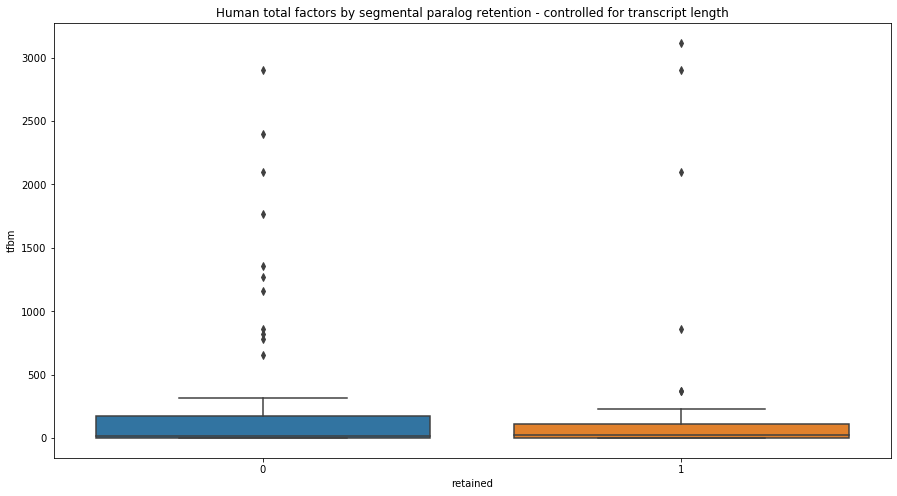

In [310]:

retframe=concat([DataFrame.from_records([(x, tfbm_per_gene[x], 1) for x in retained if x in tfbm_per_gene], columns=['gene', 'tfbm', 'retained']),
           DataFrame.from_records([(x, tfbm_per_gene[x], 0) for x in lost if x in tfbm_per_gene], columns=['gene', 'tfbm', 'retained'])])
retframe=retframe.join(DataFrame.from_records([(k.split(':')[1], abs(c[0].end-c[0].start), len(c[1])) for (k,c) in canons.items()],
                       columns = ['gene', 'gene_length', 'trans_length']).set_index('gene'), on='gene')
from row_matchers import one_to_one_matches
fig, ax = pyplot.subplots(figsize=(15,8))
ax.set_ylim([0, 500])
lostf, retainedf = one_to_one_matches(retframe[(retframe['gene_length']<30000) & (retframe['retained'] == 0)], retframe[(retframe['gene_length']<30000) & (retframe['retained'] == 1)], 'gene_length', 10)
g=boxplot(ax=ax, x="retained", y="tfbm", data=concat([lostf.set_index('gene'), retainedf.set_index('gene')]))
pyplot.title('Human total factors by segmental paralog retention - controlled for gene length')
pyplot.savefig('tfbm-human-by-seg-paralog-retention-genelength-ctl.pdf', dpi=600)
print('Gene length control leaves %d pairs'%len(lostf))

fig, ax = pyplot.subplots(figsize=(15,8))
lostf, retainedf = one_to_one_matches(retframe[(retframe['gene_length']<30000) & (retframe['retained'] == 0)], retframe[(retframe['gene_length']<30000) & (retframe['retained'] == 1)], 'trans_length', 10)
g=boxplot(ax=ax, x="retained", y="tfbm", data=concat([lostf.set_index('gene'), retainedf.set_index('gene')]))
pyplot.title('Human total factors by segmental paralog retention - controlled for transcript length')
pyplot.savefig('tfbm-human-by-seg-paralog-retention-translength-ctl.pdf', dpi=600)
print('Transcript length control leaves %d pairs'%len(lostf))


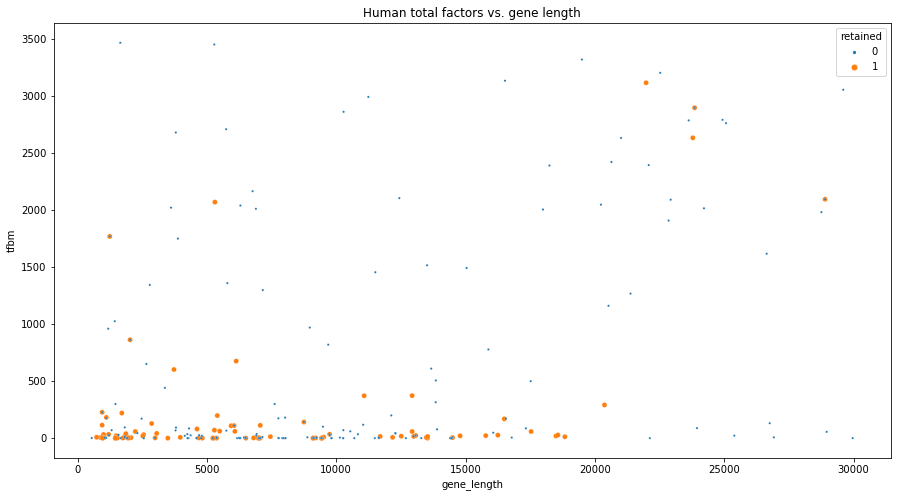

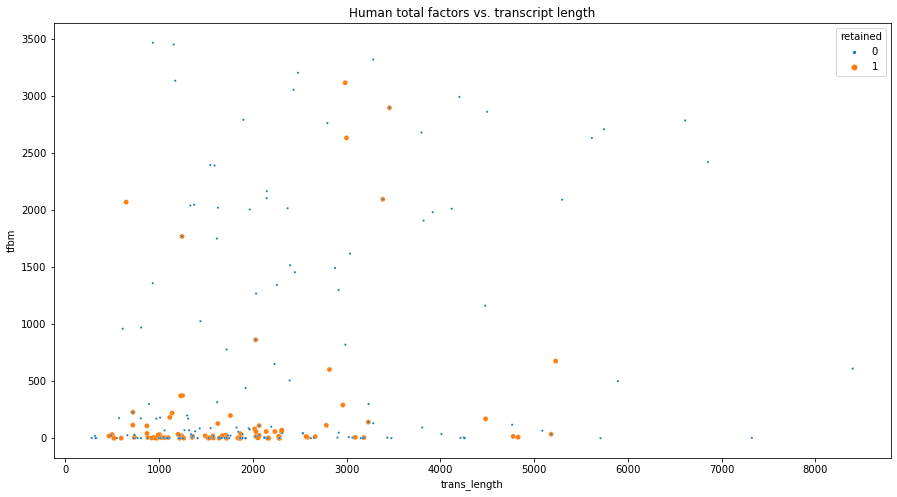

In [311]:
from seaborn import scatterplot
fig, ax = pyplot.subplots(figsize=(15,8))
scatterplot(ax=ax, data=retframe[retframe['gene_length']<30000], x='gene_length', y='tfbm', hue='retained', size='retained', sizes=(25,5))
pyplot.title('Human total factors vs. gene length')
pyplot.savefig('tfbm-human-tfbm-vs-gene-length-30k.pdf', dpi=600)
fig, ax = pyplot.subplots(figsize=(15,8))
scatterplot(ax=ax, data=retframe[retframe['gene_length']<30000], x='trans_length', y='tfbm', hue='retained', size='retained', sizes=(25,5))
pyplot.title('Human total factors vs. transcript length')
pyplot.savefig('tfbm-human-tfbm-vs-transcript-length-30k.pdf', dpi=600)

In [301]:
from seaborn import scatterplot, displot
#fig, ax = pyplot.subplots(figsize=(15,8))
#displot(ax=ax, data=retframe[['gene_length', 'tfbm', 'gene']].set_index('gene'), x='gene_length', y='tfbm')
#len(set(retframe['gene']))
len(lost.union(retained)), len(lost), len(retained)
#lost.intersection(retained)
#[s for s in segsols if 'ENSG00000104972' in s[0][0] or 'ENSG00000104972' in s[0][1] or 'ENSG00000104972' in s[0][2]]
#segsols[0]
len(retframe[retframe['tfbm'] == 0])/len(retframe)
len([(k,v) for k,v in tfbm_per_gene.items() if v==0])/len(tfbm_per_gene)

0.024414126248449637

In [65]:
paras_mm = read_csv('/home/gencpg/gen_cpg/mouse-paralogs-exocon.csv')
tfbm_per_gene_mm={ x:y for (x, y) in paras_mm[['g1', 'factors-g1']].iloc }
tfbm_per_gene_mm.update({ x:y for (x, y) in paras_mm[['g2', 'factors-g2']].iloc })

In [68]:
import overlap_calc
from overlap_calc import canons_by_gene
import gffutils
canons_mm = canons_by_gene(gffutils.FeatureDB('mouse.db'), r'/mnt/hddata/2/evgeny/TAU/Mus_musculus.GRCm38.dna_sm.primary_assembly.fa', nc=False)

In [71]:

ret_hs_mm=DataFrame.from_records(((x[0], x[2] if x[1] is None else x[1], x[2] if x[1] is not None else None, tfbm_per_gene_mm.get(x[0]), tfbm_per_gene.get(x[2] if x[1] is None else x[1]), tfbm_per_gene.get(x[2]) if x[1] is not None else None)
                                 for x in chain(*[[(x[0], x[1], x[2]) for x in s[1] if x[0] != None and (x[1] != None or x[2] != None)] for s in segsols])),
                                columns=['mouse-gene', 'human-g1', 'human-g2', 'mouse-tfbm', 'tfbm-g1', 'tfbm-g2'])
#retframe=concat([DataFrame.from_records([(x, tfbm_per_gene[x], 1) for x in retained if x in tfbm_per_gene], columns=['gene', 'tfbm', 'retained']),
#           DataFrame.from_records([(x, tfbm_per_gene[x], 0) for x in lost if x in tfbm_per_gene], columns=['gene', 'tfbm', 'retained'])])
#retframe=retframe.join(
#pickle.load(open('/data/db/import/save/paralogs-genexpr.pkl', 'rb')).drop(columns=['cpgness', 'cpgfull']).max(axis=1).rename('maxexpr')
#, on='gene').assign(exprlog=lambda x: np.log(x['maxexpr']))
hs_len = DataFrame.from_records([(k.split(':')[1], abs(c[0].end-c[0].start), len(c[1])) for (k,c) in canons.items()],
                       columns = ['gene', 'gene_length', 'trans_length']).set_index('gene')
mm_len = DataFrame.from_records([(k.split(':')[1], abs(c[0].end-c[0].start), len(c[1])) for (k,c) in canons_mm.items()],
                       columns = ['gene', 'gene_length-mm', 'trans_length-mm']).set_index('gene')

ret_hs_mm = ret_hs_mm.join(hs_len, on='human-g1').join(hs_len, on='human-g2', lsuffix='-g1', rsuffix='-g2').join(mm_len, on='mouse-gene').join(
    pickle.load(open('/data/db/import/save/paralogs-genexpr.pkl', 'rb')).drop(columns=['cpgness', 'cpgfull']).max(axis=1).rename('maxexpr-g1'), on='human-g1').join(
    pickle.load(open('/data/db/import/save/paralogs-genexpr.pkl', 'rb')).drop(columns=['cpgness', 'cpgfull']).max(axis=1).rename('maxexpr-g2'), on='human-g2').join(
    pickle.load(open('/data/db/import/save/mouse-genexpr.pkl', 'rb')).drop(columns=['cpgness', 'cpgfull']).max(axis=1).rename('maxexpr-mouse'), on='mouse-gene')
ret_hs_mm.to_csv('/data/db/import/save/ret_hs_mm.csv')

Mann-Whitney on mouse TFBM: MannwhitneyuResult(statistic=95471.5, pvalue=7.579018597107268e-13)


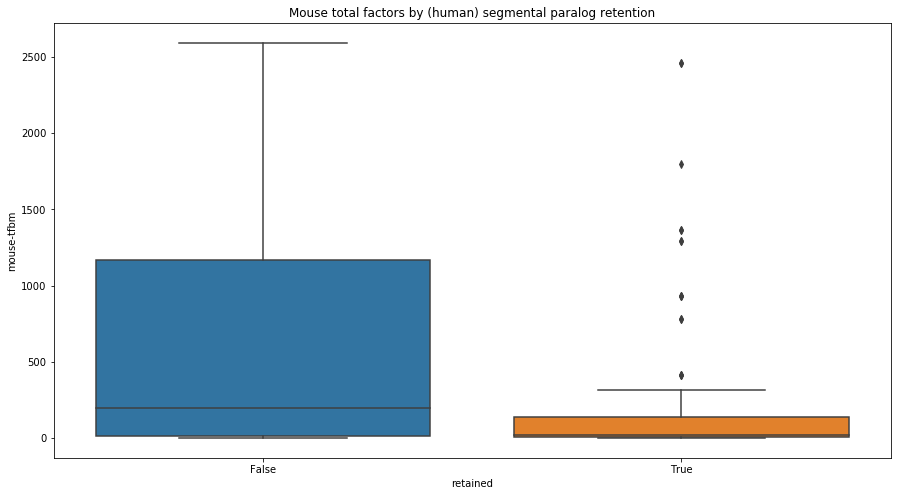

In [72]:
#[x[1] for x in segsols if x[1][1] != None and x[1][2] != None]
from pandas import DataFrame, concat
from scipy.stats import mannwhitneyu
fig, ax = pyplot.subplots(figsize=(15,8))
g=boxplot(ax=ax, x="retained", y="mouse-tfbm", data=ret_hs_mm.assign(retained=~ret_hs_mm['human-g2'].isna()))
pyplot.title('Mouse total factors by (human) segmental paralog retention')
pyplot.savefig('tfbm-mouse-by-hs-seg-paralog-retention.pdf', dpi=600)

print('Mann-Whitney on mouse TFBM: %s'%str(mannwhitneyu(ret_hs_mm[ret_hs_mm['human-g2'].isna()]['mouse-tfbm'].dropna().values, ret_hs_mm[~ret_hs_mm['human-g2'].isna()]['mouse-tfbm'].dropna().values, alternative='greater')))


Expression control leaves 55 pairs


/home/gencpg/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Mann-Whitney on mouse TFBM controlled for expression level: MannwhitneyuResult(statistic=2082.0, pvalue=8.707199602431082e-07)


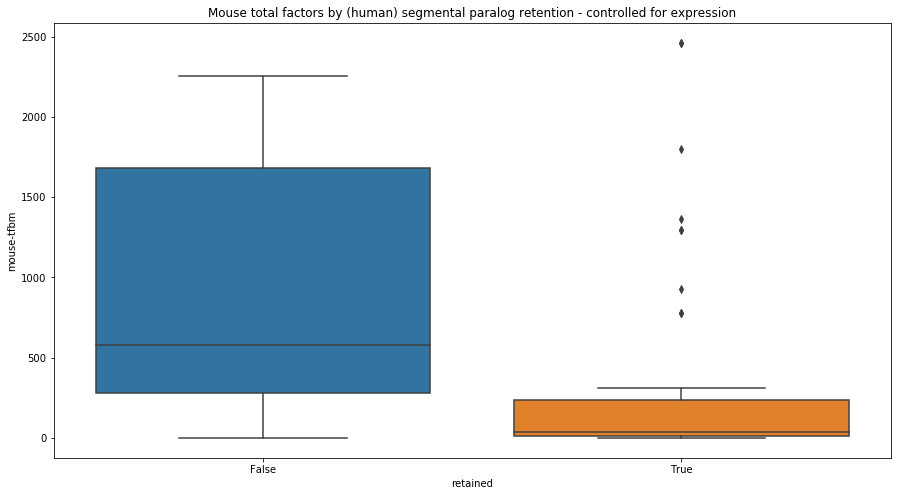

In [73]:
from row_matchers import one_to_one_matches

mm_by_hs = ret_hs_mm.assign(retained=~ret_hs_mm['human-g2'].isna()).assign(exprlog=np.log(ret_hs_mm['maxexpr-g1']))

retainedf, lostf = one_to_one_matches(mm_by_hs[(abs(mm_by_hs['exprlog']) != np.inf) & mm_by_hs['exprlog'].notna() & mm_by_hs['retained'] == 1], mm_by_hs[(abs(mm_by_hs['exprlog']) != np.inf) & mm_by_hs['exprlog'].notna() & mm_by_hs['retained'] == 0], 'exprlog', 0.1)
print('Expression control leaves %d pairs'%len(lostf))

fig, ax = pyplot.subplots(figsize=(15,8))
g=boxplot(ax=ax, x="retained", y="mouse-tfbm", data=concat([lostf.set_index('mouse-gene'), retainedf.set_index('mouse-gene')]))
pyplot.title('Mouse total factors by (human) segmental paralog retention - controlled for expression')
pyplot.savefig('tfbm-mouse-by-hs-seg-paralog-retention-expr-ctl.pdf', dpi=600)
print('Mann-Whitney on mouse TFBM controlled for expression level: %s'%str(mannwhitneyu(lostf['mouse-tfbm'].dropna().values, retainedf['mouse-tfbm'].dropna().values, alternative='greater')))

Gene length control leaves 98 pairs
Mann-Whitney on mouse TFBM controlled for gene length (genes shorter than 30kbp): MannwhitneyuResult(statistic=5023.0, pvalue=0.000984951205938844)
Transcript length control leaves 115 pairs
Mann-Whitney on mouse TFBM controlled for transcript length (genes shorter than 30kbp): MannwhitneyuResult(statistic=6408.5, pvalue=0.002729412090626131)


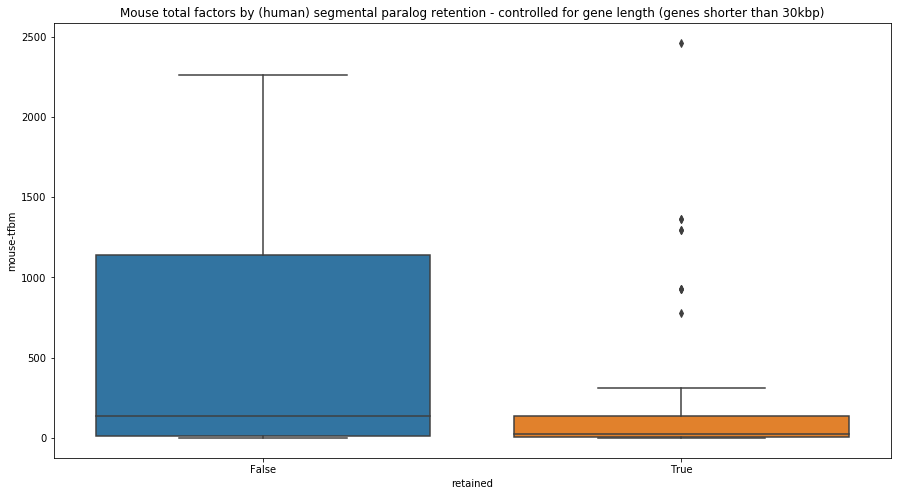

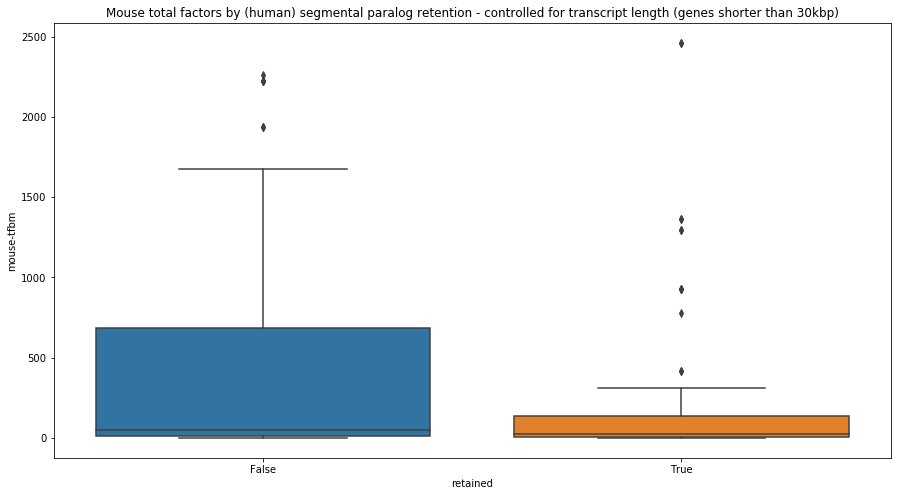

In [74]:
fig, ax = pyplot.subplots(figsize=(15,8))
#ax.set_ylim([0, 1800])
lostf, retainedf = one_to_one_matches(mm_by_hs[(~mm_by_hs['gene_length-g1'].isna()) & (mm_by_hs['gene_length-g1']<30000) & (mm_by_hs['retained'] == 0)], mm_by_hs[(~mm_by_hs['gene_length-g1'].isna()) & (mm_by_hs['gene_length-g1']<30000) & (mm_by_hs['retained'] == 1)], 'gene_length-g1', 100)
g=boxplot(ax=ax, x="retained", y="mouse-tfbm", data=concat([lostf.set_index('mouse-gene'), retainedf.set_index('mouse-gene')]))
pyplot.title('Mouse total factors by (human) segmental paralog retention - controlled for gene length (genes shorter than 30kbp)')
pyplot.savefig('tfbm-mouse-by-hs-seg-paralog-retention-genelength-ctl-30k.pdf', dpi=600)
print('Gene length control leaves %d pairs'%len(lostf))
print('Mann-Whitney on mouse TFBM controlled for gene length (genes shorter than 30kbp): %s'%str(mannwhitneyu(lostf['mouse-tfbm'].dropna().values, retainedf['mouse-tfbm'].dropna().values, alternative='greater')))

fig, ax = pyplot.subplots(figsize=(15,8))
lostf, retainedf = one_to_one_matches(mm_by_hs[(~mm_by_hs['gene_length-g1'].isna()) & (mm_by_hs['gene_length-g1']<30000) & (mm_by_hs['retained'] == 0)], mm_by_hs[(~mm_by_hs['gene_length-g1'].isna()) & (mm_by_hs['gene_length-g1']<30000) & (mm_by_hs['retained'] == 1)], 'trans_length-g1', 20)
g=boxplot(ax=ax, x="retained", y="mouse-tfbm", data=concat([lostf.set_index('mouse-gene'), retainedf.set_index('mouse-gene')]))
pyplot.title('Mouse total factors by (human) segmental paralog retention - controlled for transcript length (genes shorter than 30kbp)')
pyplot.savefig('tfbm-mouse-by-hs-seg-paralog-retention-translength-ctl-30k.pdf', dpi=600)
print('Transcript length control leaves %d pairs'%len(lostf))
print('Mann-Whitney on mouse TFBM controlled for transcript length (genes shorter than 30kbp): %s'%str(mannwhitneyu(lostf['mouse-tfbm'].dropna().values, retainedf['mouse-tfbm'].dropna().values, alternative='greater')))

Gene length control leaves 102 pairs
Mann-Whitney on mouse TFBM controlled for gene length: MannwhitneyuResult(statistic=5453.5, pvalue=0.0010404989456929044)
Transcript length control leaves 124 pairs
Mann-Whitney on mouse TFBM controlled for transcript length: MannwhitneyuResult(statistic=7904.5, pvalue=5.748225087469772e-05)


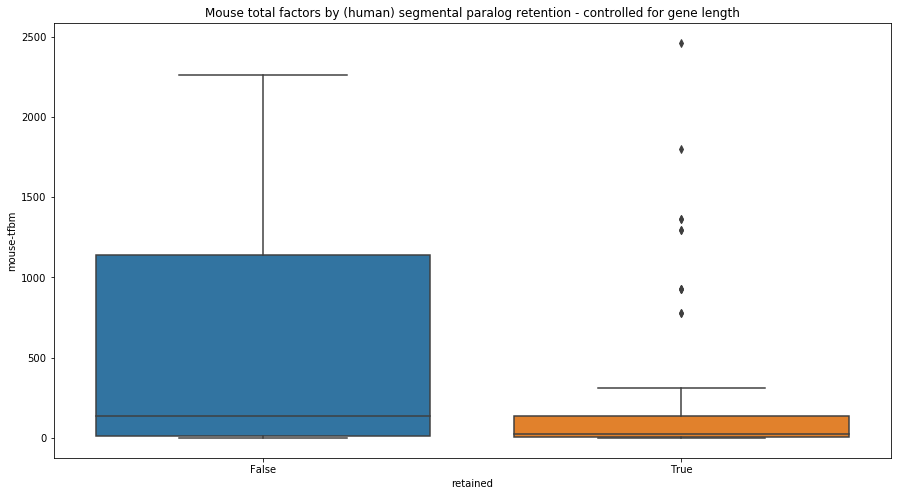

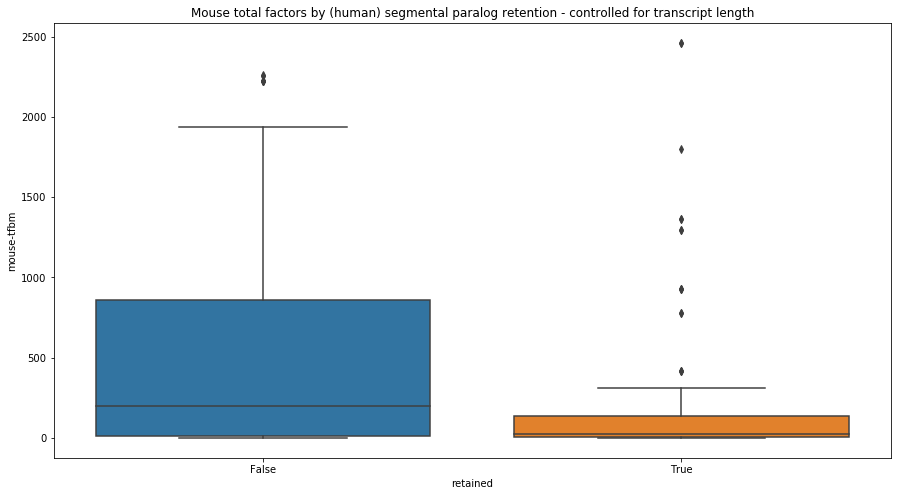

In [75]:
fig, ax = pyplot.subplots(figsize=(15,8))
#ax.set_ylim([0, 500])
lostf, retainedf = one_to_one_matches(mm_by_hs[(~mm_by_hs['gene_length-g1'].isna()) & (mm_by_hs['retained'] == 0)], mm_by_hs[(~mm_by_hs['gene_length-g1'].isna()) & (mm_by_hs['retained'] == 1)], 'gene_length-g1', 100)
g=boxplot(ax=ax, x="retained", y="mouse-tfbm", data=concat([lostf.set_index('mouse-gene'), retainedf.set_index('mouse-gene')]))
pyplot.title('Mouse total factors by (human) segmental paralog retention - controlled for gene length')
pyplot.savefig('tfbm-mouse-by-hs-seg-paralog-retention-genelength-ctl.pdf', dpi=600)
print('Gene length control leaves %d pairs'%len(lostf))
print('Mann-Whitney on mouse TFBM controlled for gene length: %s'%str(mannwhitneyu(lostf['mouse-tfbm'].dropna().values, retainedf['mouse-tfbm'].dropna().values, alternative='greater')))


fig, ax = pyplot.subplots(figsize=(15,8))
lostf, retainedf = one_to_one_matches(mm_by_hs[(~mm_by_hs['gene_length-g1'].isna()) & (mm_by_hs['retained'] == 0)], mm_by_hs[(~mm_by_hs['gene_length-g1'].isna()) & (mm_by_hs['retained'] == 1)], 'trans_length-g1', 20)
g=boxplot(ax=ax, x="retained", y="mouse-tfbm", data=concat([lostf.set_index('mouse-gene'), retainedf.set_index('mouse-gene')]))
pyplot.title('Mouse total factors by (human) segmental paralog retention - controlled for transcript length')
pyplot.savefig('tfbm-mouse-by-hs-seg-paralog-retention-translength-ctl.pdf', dpi=600)
print('Transcript length control leaves %d pairs'%len(lostf))
print('Mann-Whitney on mouse TFBM controlled for transcript length: %s'%str(mannwhitneyu(lostf['mouse-tfbm'].dropna().values, retainedf['mouse-tfbm'].dropna().values, alternative='greater')))


In [ ]:

from pybedtools import *
import importlib
import overlap_calc
from overlap_calc import canons_by_gene
import re
import gffutils
from csv import DictReader
factNum=sum((1 for prom in DictReader(open('/data/db/import/human_factor_full_QC.txt', 'r'), delimiter='\t') if not re.fullmatch("CTCF|RAD21|REST|EP300|.*POLR.*", prom['Factor'])))
pre_tss=300
canons = canons_by_gene(gffutils.FeatureDB('homo.db'), r'/mnt/hddata/2/evgeny/TAU/Homo_sapiens.GRCh38.dna_sm.primary_assembly.fa')
gene_prom_area=overlap_calc.canon_ints(canons.values(),pre_tss=pre_tss, post_tss=100)
factors = np.zeros((factNum, len(canons)), dtype='int8')
genemap = dict([(gene_prom_area[i].name, i) for i in range(0, len(gene_prom_area))])
fact=-1
print(len(canons))
DCids = []
for prom in DictReader(open('/data/db/import/human_factor_full_QC.txt', 'r'), delimiter='\t'):
    if re.fullmatch("CTCF|RAD21|REST|EP300|.*POLR.*", prom['Factor']):
        #print('Skipping %s'%prom['Factor'])
        continue
    fact += 1
    DCids.append(int(prom['DCid']))
    factors[fact,[genemap[x.name] for x in BedTool(gene_prom_area).intersect(BedTool('/data/db/import/human_factor/'+prom['DCid']+'_sort_peaks.narrowPeak.bed'))]] += 1


19736


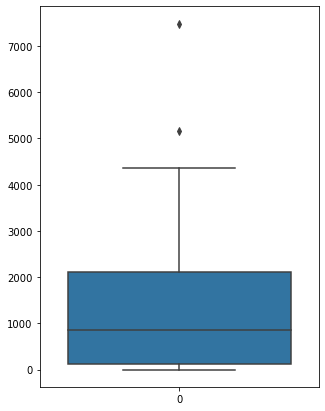

In [52]:
fig, ax = pyplot.subplots(figsize=(5,7))
boxplot(ax=ax, data=factors.sum(axis=0), orient='vertical')
pyplot.savefig('tfbm-human-overall.pdf', dpi=600)

In [53]:
from pybedtools import *
import importlib
import overlap_calc
from overlap_calc import canons_by_gene
import re
import gffutils
from csv import DictReader
factNum=sum((1 for prom in DictReader(open('/data/db/import/mouse_factor_full_QC.txt', 'r'), delimiter='\t') if not re.fullmatch("CTCF|RAD21|REST|EP300|.*POLR.*", prom['Factor'])))
canons = canons_by_gene(gffutils.FeatureDB('mouse.db'), r'/mnt/hddata/2/evgeny/TAU/Mus_musculus.GRCm38.dna_sm.primary_assembly.fa', nc=False)
pre_tss=300
gene_prom_area=overlap_calc.canon_ints(canons.values(),pre_tss=pre_tss, post_tss=100)
factors = np.zeros((factNum, len(canons)), dtype='int8')
genemap = dict([(gene_prom_area[i].name, i) for i in range(0, len(gene_prom_area))])
fact=-1
print(len(canons))
DCids = []
for prom in DictReader(open('/data/db/import/mouse_factor_full_QC.txt', 'r'), delimiter='\t'):
    if re.fullmatch("CTCF|RAD21|REST|EP300|.*POLR.*", prom['Factor']):
        #print('Skipping %s'%prom['Factor'])
        continue
    fact += 1
    DCids.append(int(prom['DCid']))
    factors[fact,[genemap[x.name] for x in BedTool(gene_prom_area).intersect(BedTool('/data/db/import/mouse_factor/'+prom['DCid']+'_sort_peaks.narrowPeak.bed'))]] += 1
    


21874


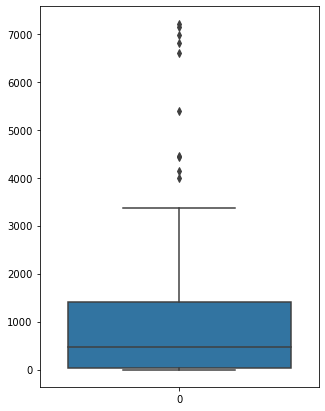

In [54]:
fig, ax = pyplot.subplots(figsize=(5,7))
boxplot(ax=ax, data=factors.sum(axis=0), orient='vertical')
pyplot.savefig('tfbm-mouse-overall.pdf', dpi=600)

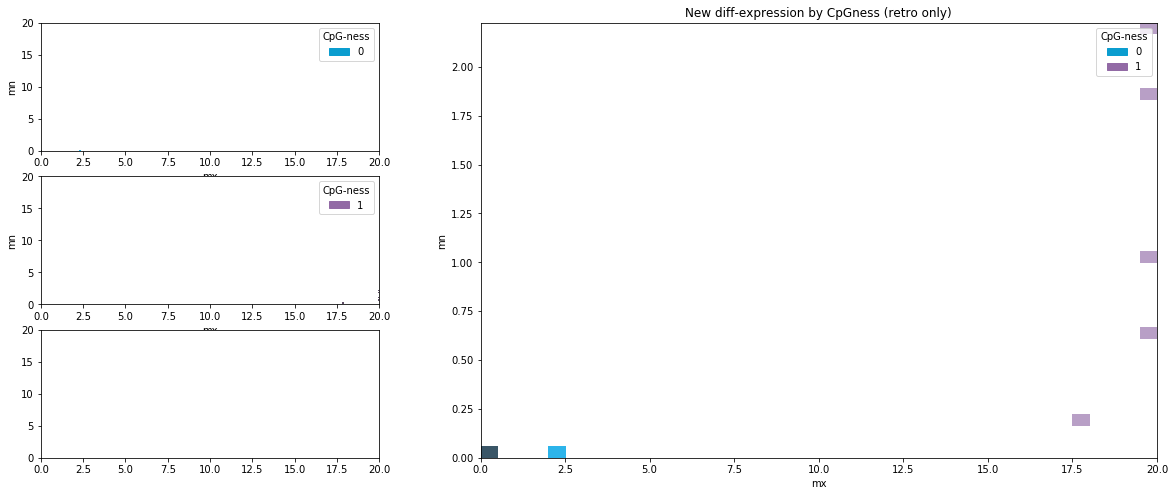

In [422]:
from seaborn import histplot
from matplotlib.pyplot import title
import matplotlib.pyplot as plt
diffcols = [c for c in paras.columns if c.endswith('-mean-log-diff')]
neo_para_recent = paras[(paras['retro'] < 0)&(paras['Branch point'].isin(["Primates", "Haplorrhini", "Simiiformes", "Catarrhini","Hominoidea", "Hominidae", "Homininae", "Homo sapiens"]))]
neo_para_recent = neo_para_recent.set_index(['g1','g2'])
neo_para_recent = neo_para_recent.assign(mx=neo_para_recent[diffcols].max(axis=1), mn=-neo_para_recent[diffcols].min(axis=1))

fig, ax = pyplot.subplots(figsize=(20,8), nrows=3, ncols=2, gridspec_kw={'width_ratios':[1,2]})
histplot(ax=ax[0,0], data=neo_para_recent[(neo_para_recent['mx']>=0) & (neo_para_recent['mn']>=0) & (neo_para_recent['CpG-ness']==0)], x='mx', y='mn',hue='CpG-ness', bins=(40,40), palette=['#0B9DCF'])
ax[0,0].set_xlim([0,20])
ax[0,0].set_ylim([0,20])
#ax[0,0].text(12.5, 15, '%d (%0.3f%%)'%(((neo_para_recent['mx']>=10) & (neo_para_recent['mn']>=10) & (neo_para_recent['CpG-ness']==0)).sum(),100*((neo_para_recent['mx']>=10) & (neo_para_recent['mn']>=10) & (neo_para_recent['CpG-ness']==0)).sum()/((neo_para_recent['mx']>=0) & (neo_para_recent['mn']>=0) & (neo_para_recent['CpG-ness']==0)).sum()))
#ax[0,0].text(0.5, 0.5, '%d (%0.3f%%)'%(((neo_para_recent['mx']<=5) & (neo_para_recent['mn']<=5) & (neo_para_recent['CpG-ness']==0)).sum(),100*((neo_para_recent['mx']<=5) & (neo_para_recent['mn']<=5) & (neo_para_recent['CpG-ness']==0)).sum()/((neo_para_recent['mx']>=0) & (neo_para_recent['mn']>=0) & (neo_para_recent['CpG-ness']==0)).sum()))
histplot(ax=ax[1,0], data=neo_para_recent[(neo_para_recent['mx']>=0) & (neo_para_recent['mn']>=0) & (neo_para_recent['CpG-ness']==1)], x='mx', y='mn',hue='CpG-ness', bins=(40,40), palette=['#926AA5'])
ax[1,0].set_xlim([0,20])
ax[1,0].set_ylim([0,20])
#ax[1,0].text(12.5, 15, '%d (%0.3f%%)'%(((neo_para_recent['mx']>=10) & (neo_para_recent['mn']>=10) & (neo_para_recent['CpG-ness']==1)).sum(),100*((neo_para_recent['mx']>=10) & (neo_para_recent['mn']>=10) & (neo_para_recent['CpG-ness']==1)).sum()/((neo_para_recent['mx']>=0) & (neo_para_recent['mn']>=0) & (neo_para_recent['CpG-ness']==1)).sum()))
#ax[1,0].text(0.5, 0.5, '%d (%0.3f%%)'%(((neo_para_recent['mx']<=5) & (neo_para_recent['mn']<=5) & (neo_para_recent['CpG-ness']==1)).sum(),100*((neo_para_recent['mx']<=5) & (neo_para_recent['mn']<=5) & (neo_para_recent['CpG-ness']==1)).sum()/((neo_para_recent['mx']>=0) & (neo_para_recent['mn']>=0) & (neo_para_recent['CpG-ness']==1)).sum()))
histplot(ax=ax[2,0], data=neo_para_recent[(neo_para_recent['mx']>=0) & (neo_para_recent['mn']>=0) & (neo_para_recent['CpG-ness']==2)], x='mx', y='mn',hue='CpG-ness', bins=(40,40), palette=['#EF893D'])
ax[2,0].set_xlim([0,20])
ax[2,0].set_ylim([0,20])
#ax[2,0].text(12.5, 15, '%d (%0.3f%%)'%(((neo_para_recent['mx']>=10) & (neo_para_recent['mn']>=10) & (neo_para_recent['CpG-ness']==2)).sum(),100*((neo_para_recent['mx']>=10) & (neo_para_recent['mn']>=10) & (neo_para_recent['CpG-ness']==2)).sum()/((neo_para_recent['mx']>=0) & (neo_para_recent['mn']>=0) & (neo_para_recent['CpG-ness']==2)).sum()))
#ax[2,0].text(0.5, 0.5, '%d (%0.3f%%)'%(((neo_para_recent['mx']<=5) & (neo_para_recent['mn']<=5) & (neo_para_recent['CpG-ness']==2)).sum(),100*((neo_para_recent['mx']<=5) & (neo_para_recent['mn']<=5) & (neo_para_recent['CpG-ness']==2)).sum()/((neo_para_recent['mx']>=0) & (neo_para_recent['mn']>=0) & (neo_para_recent['CpG-ness']==2)).sum()))
gs = ax[0, 1].get_gridspec()
for a in ax[:, -1]:
  a.remove()
axbig = fig.add_subplot(gs[:, -1])

histplot(ax=axbig, data=neo_para_recent[(neo_para_recent['mx']>=0) & (neo_para_recent['mn']>=0)], x='mx', y='mn',hue='CpG-ness', bins=(40,40), palette={ 0: '#0B9DCF', 1: '#926AA5',2: '#EF893D'})
title('New diff-expression by CpGness (retro only)')
plt.savefig('human-diff-expression-new-retro.pdf')

In [423]:
neo_para_recent.to_csv('human-recent-neo-retros.csv')